In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

[autoreload of training_info failed: Traceback (most recent call last):
  File "/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/soheuny/HH4bsim/playground/training_info.py", line 13, in <module>
    from dataset import DatasetInfo, SCDatasetInfo, split_scdinfo
ImportError: cannot import name 'split_scdinfo' f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
features = [
    "sym_Jet0_pt", "sym_Jet1_pt", "sym_Jet2_pt", "sym_Jet3_pt",
    "sym_Jet0_eta", "sym_Jet1_eta", "sym_Jet2_eta", "sym_Jet3_eta",
    "sym_Jet0_phi", "sym_Jet1_phi", "sym_Jet2_phi", "sym_Jet3_phi",  
    "sym_Jet0_m", "sym_Jet1_m", "sym_Jet2_m", "sym_Jet3_m",
]

In [21]:
import torch
from dataset import generate_tt_dataset
from training_info import TrainingInfo
import pytorch_lightning as pl
import yaml
from fvt_classifier import FvTClassifier
from code_fragments import fvt_score_hist
from events_data import EventsData
import tqdm
import numpy as np
import matplotlib.pyplot as plt

config_filename = "configs/fvt_training_higher_sr.yml"


config = yaml.safe_load(open(config_filename, "r"))
experiment_name = config["experiment_name"]
n_3b = config["n_3b"]
n_all4b = config["n_all4b"]
signal_ratios = config["signal_ratio"]
test_ratio = config["test_ratio"]
n_sample_ratios = [1.0]
seeds = [42, 52, 62, 72, 82, 92]
w_cuts = np.arange(0.01, 1.01, 0.01)
device = torch.device("cuda:0")

In [22]:
def plot_sr_stats(events, sr_stats, ax, label, **plot_kwargs):
    assert len(events) == len(sr_stats)

    sr_stats_argsort = np.argsort(sr_stats)[::-1]
    weights = events.weights[sr_stats_argsort]
    is_signal = events.is_signal[sr_stats_argsort]
    is_4b = events.is_4b[sr_stats_argsort]

    ax.plot(
        np.cumsum(weights * is_4b) / np.sum(weights * is_4b),
        np.cumsum(weights * is_signal) / np.sum(weights * is_signal),           
        label=label,
        **plot_kwargs,
    )

In [23]:
def hist_events_by_labels(events: EventsData, bins, ax, **hist_kwargs):
    ax.hist(events.fvt_score[events.is_3b], 
                        bins=bins, histtype="step", label="3b", 
                        weights=events.weights[events.is_3b], 
                        **hist_kwargs)
    ax.hist(events.fvt_score[events.is_bg4b], 
                bins=bins, histtype="step", label="bg4b", 
                weights=events.weights[events.is_bg4b], 
                **hist_kwargs)
    ax.hist(events.fvt_score[events.is_signal], 
                bins=bins, histtype="step", label="signal", 
                weights=events.weights[events.is_signal], 
                **hist_kwargs)

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


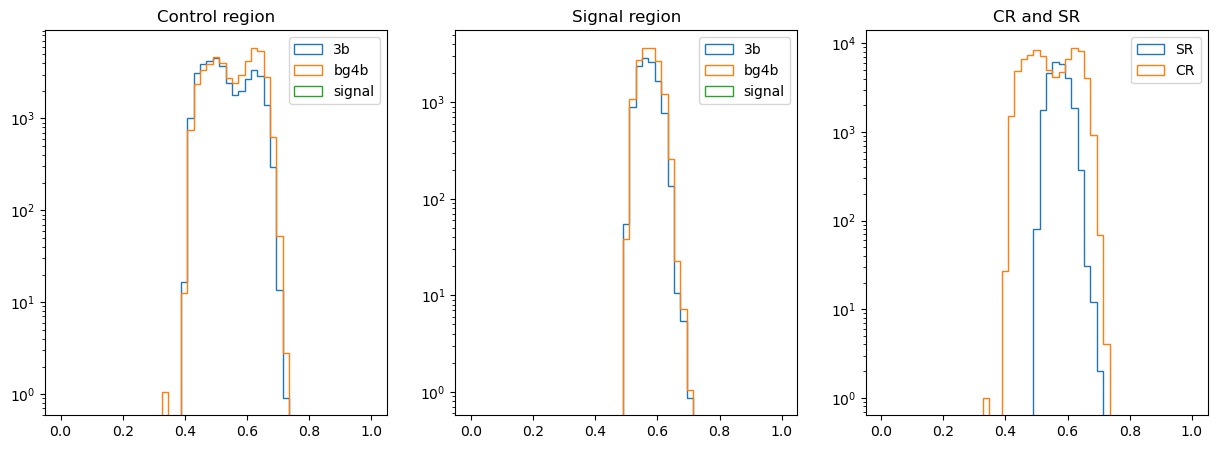

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.92it/s, v_num=3, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.63it/s, v_num=3, val_loss=0.676, train_loss=0.677]


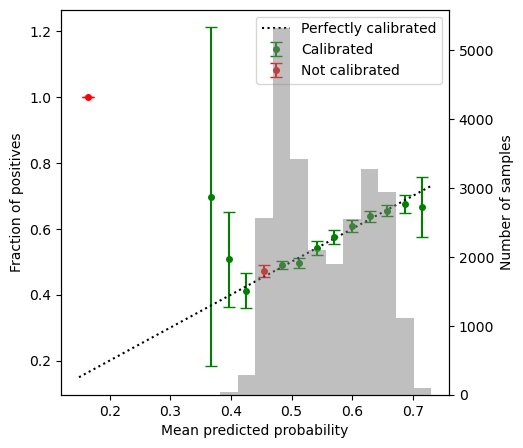

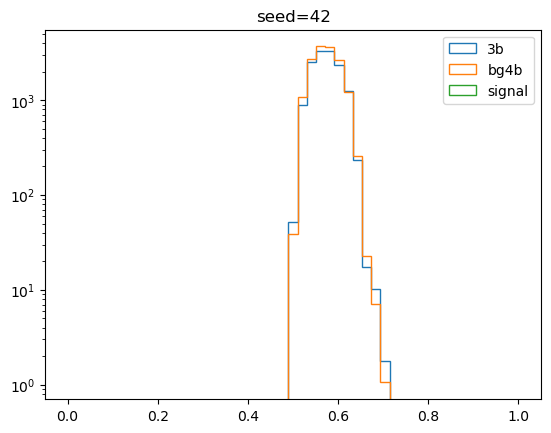

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


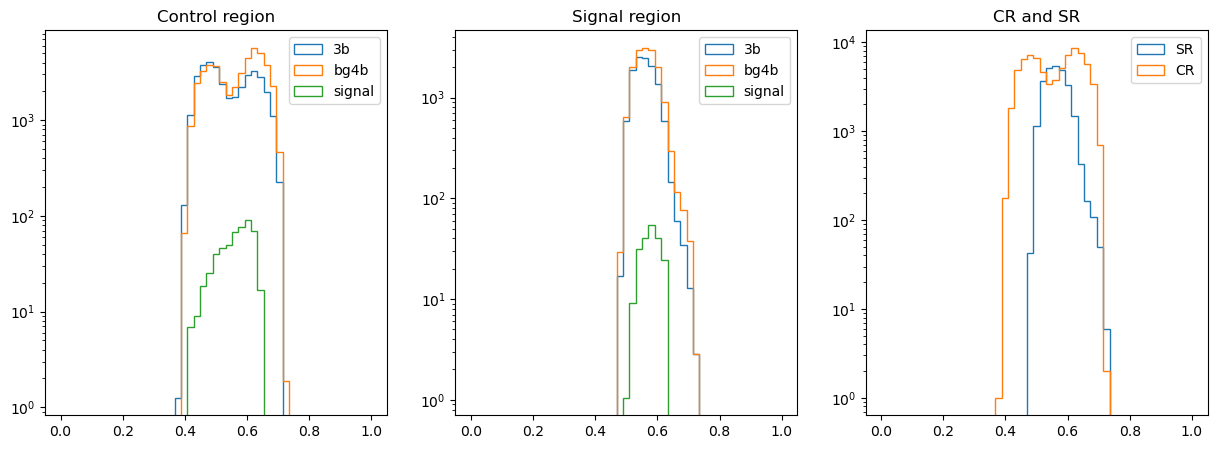

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.98it/s, v_num=4, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.33it/s, v_num=4, val_loss=0.675, train_loss=0.675]


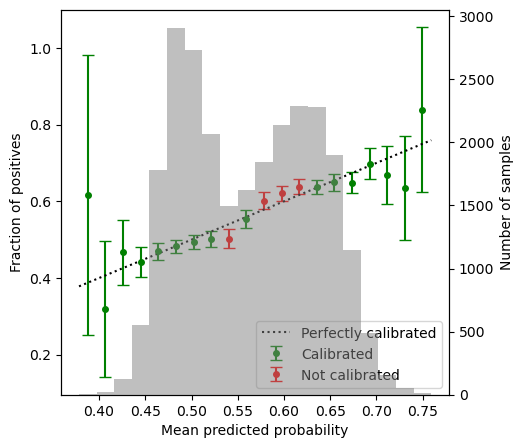

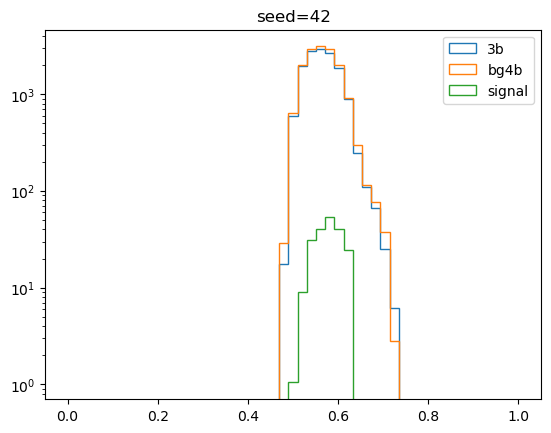

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


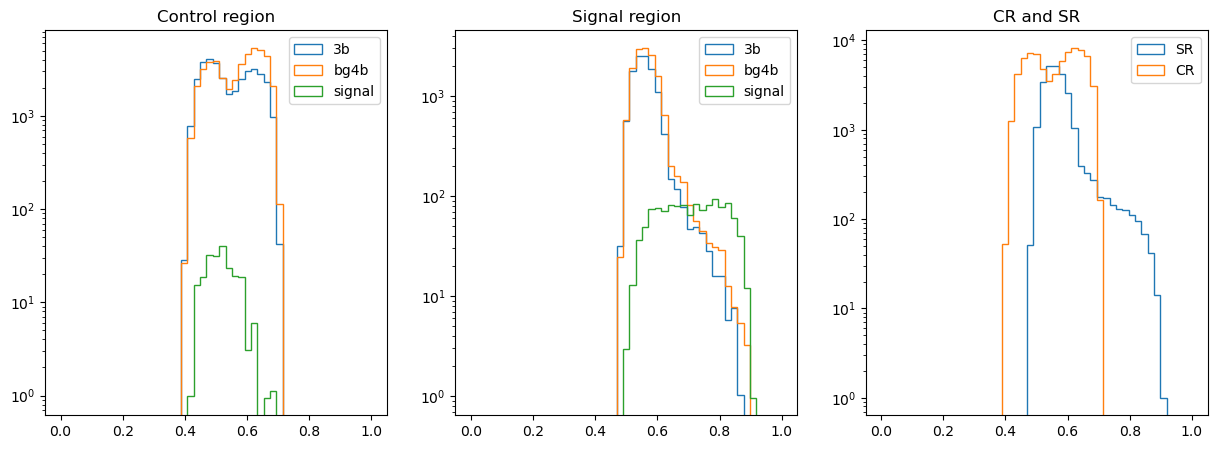

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.14it/s, v_num=5, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.02it/s, v_num=5, val_loss=0.675, train_loss=0.675]


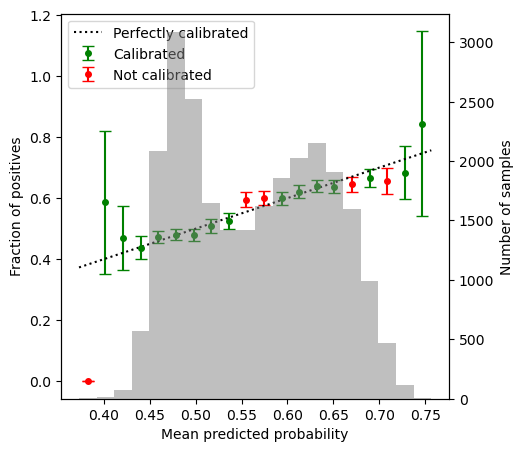

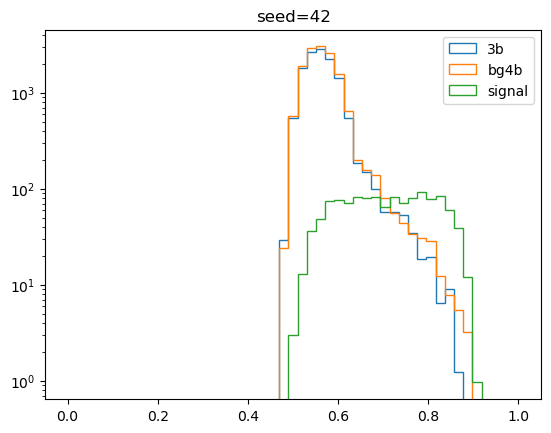

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


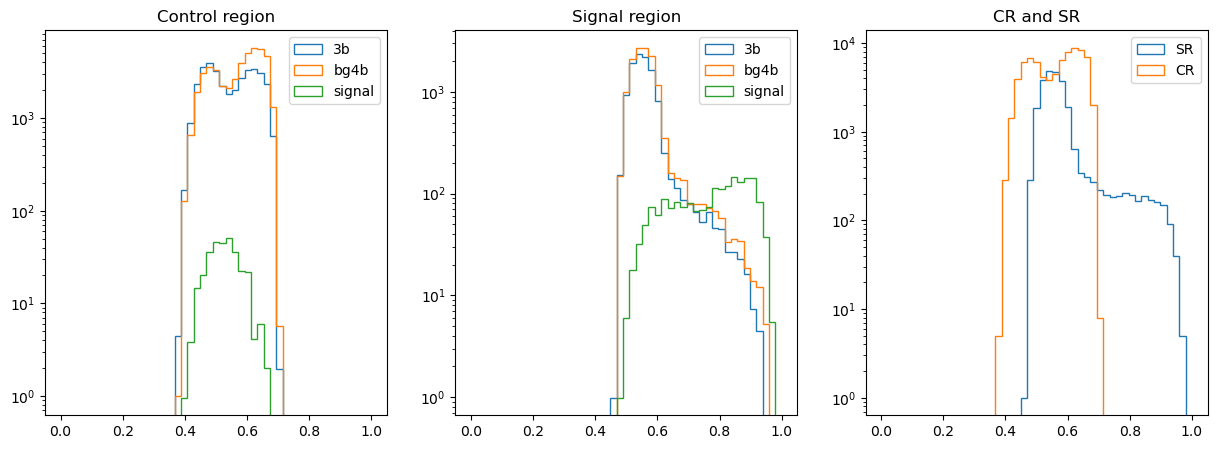

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.32it/s, v_num=6, val_loss=0.674, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.06it/s, v_num=6, val_loss=0.674, train_loss=0.674]


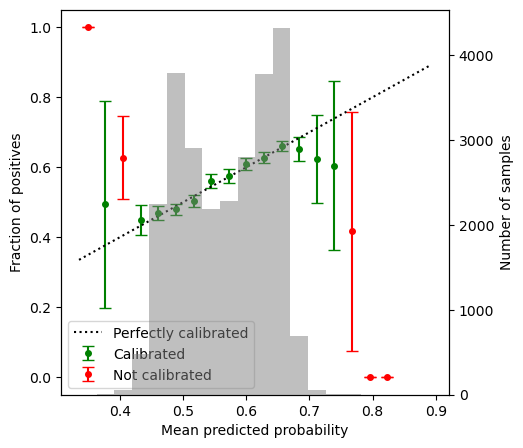

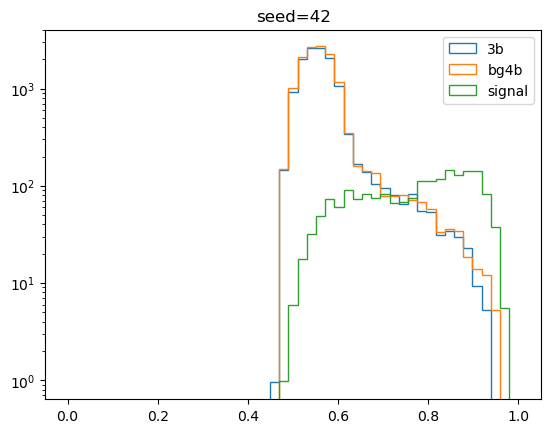

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


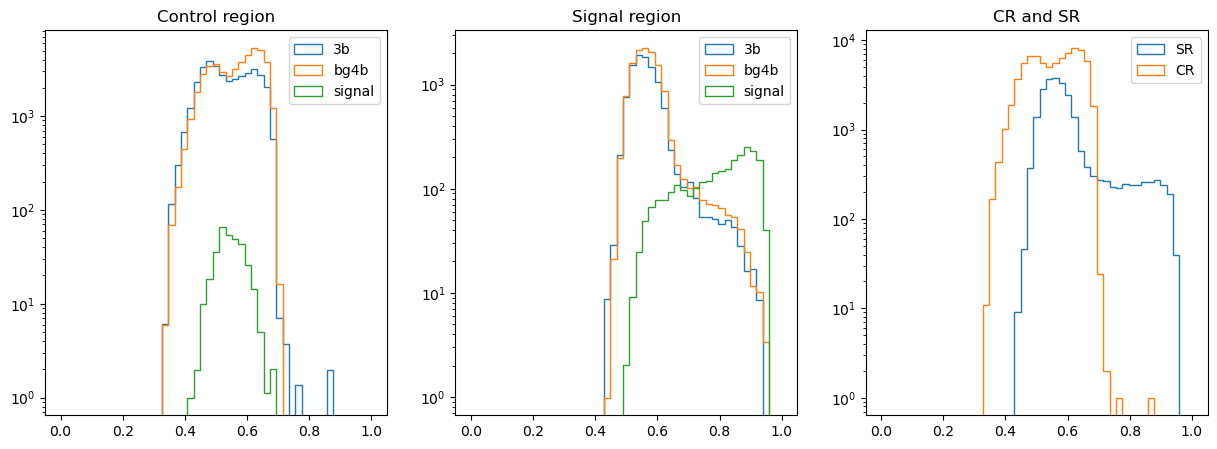

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 18.27it/s, v_num=7, val_loss=0.678, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 17.51it/s, v_num=7, val_loss=0.678, train_loss=0.675]


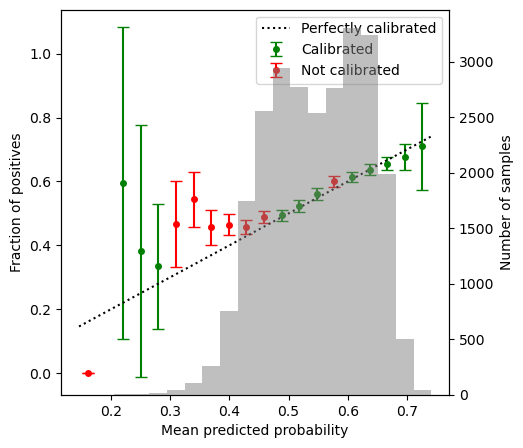

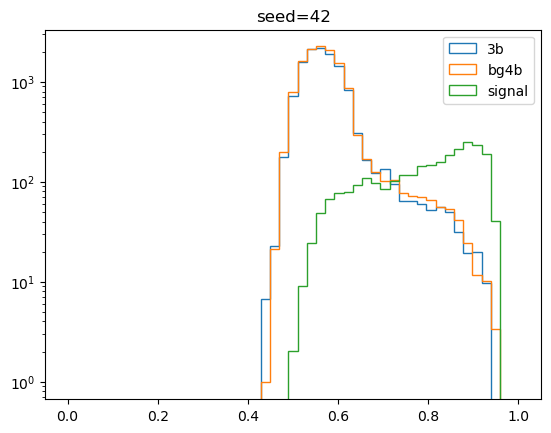

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


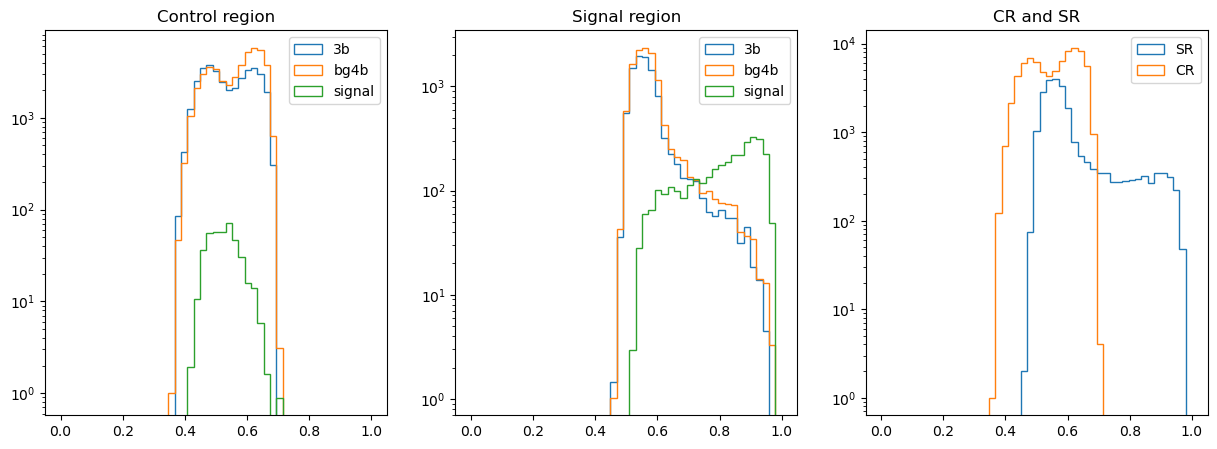

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.27it/s, v_num=8, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.12it/s, v_num=8, val_loss=0.676, train_loss=0.676]


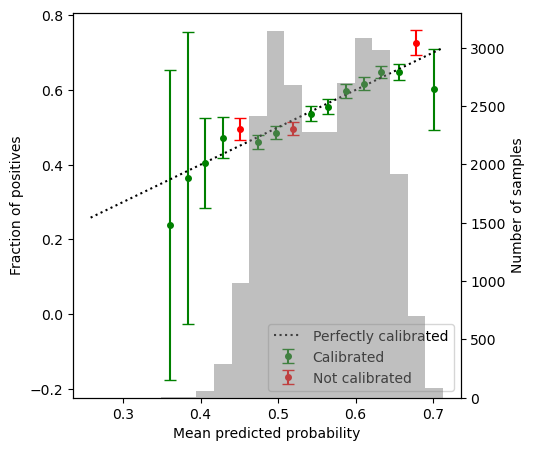

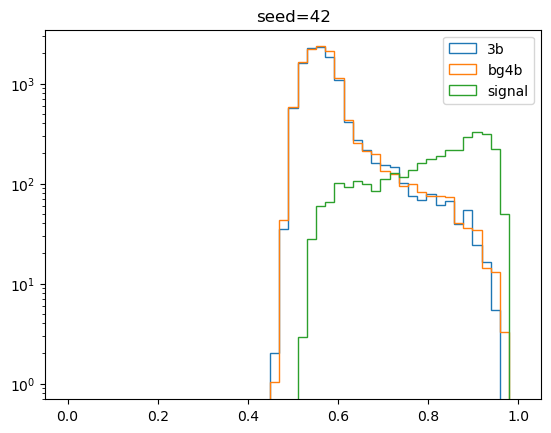

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


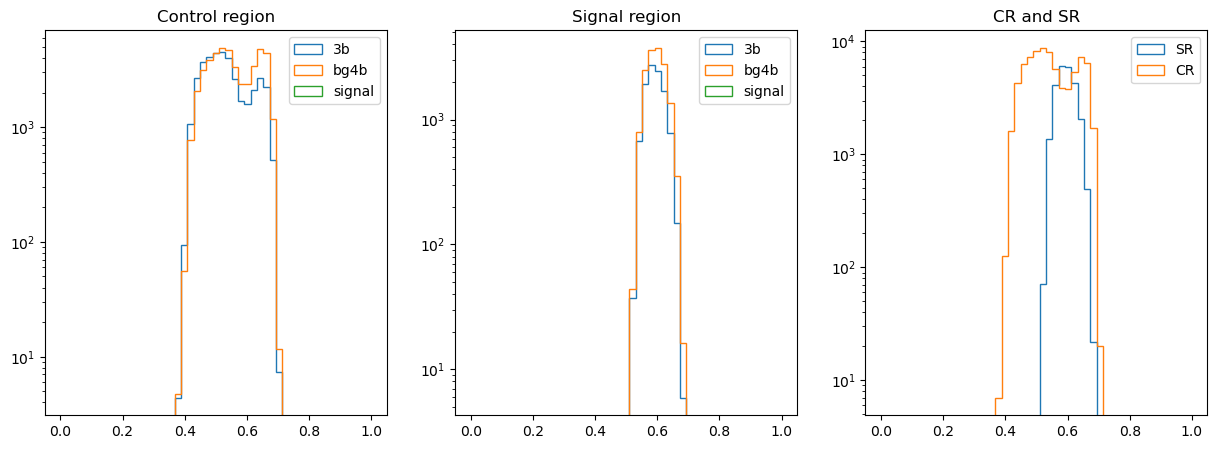

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 20.20it/s, v_num=1, val_loss=0.677, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 20.07it/s, v_num=1, val_loss=0.677, train_loss=0.680]


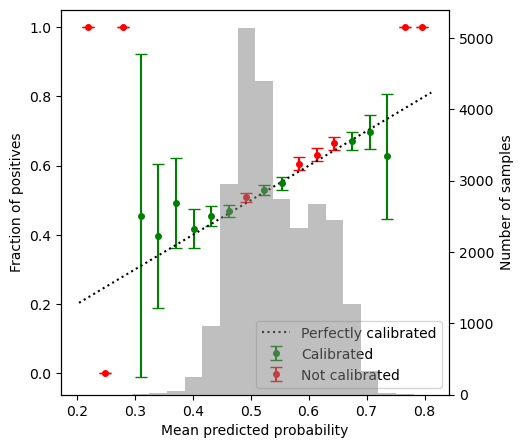

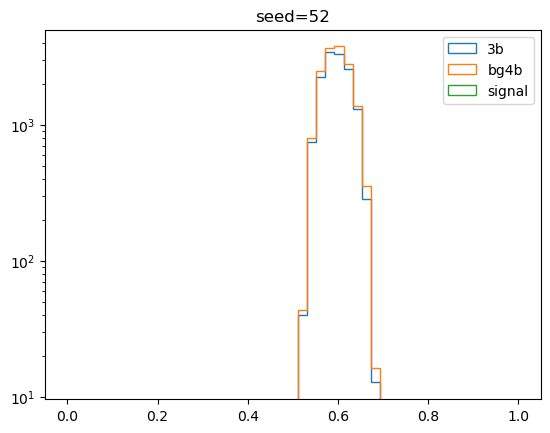

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


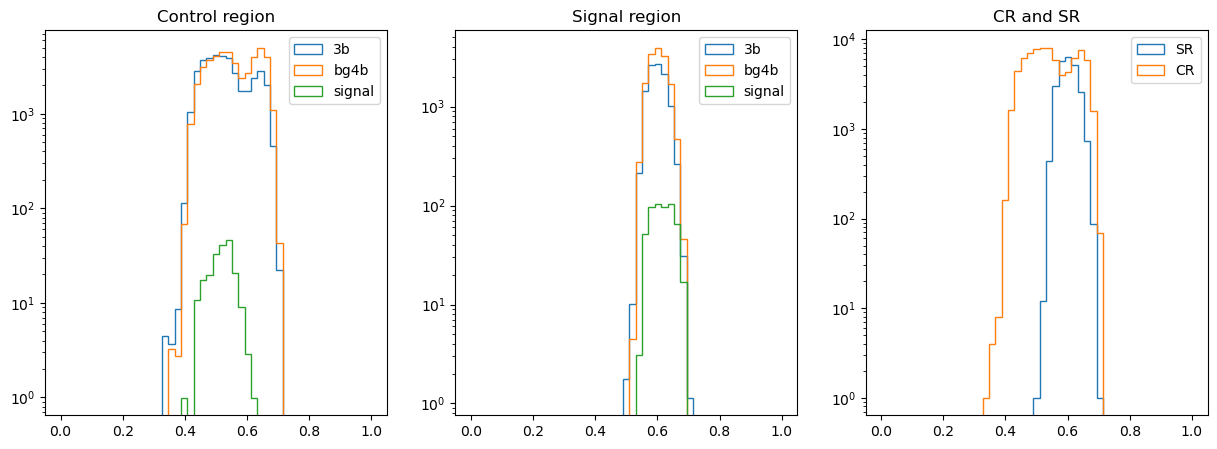

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:03<00:00, 16.74it/s, v_num=2, val_loss=0.680, train_loss=0.678]


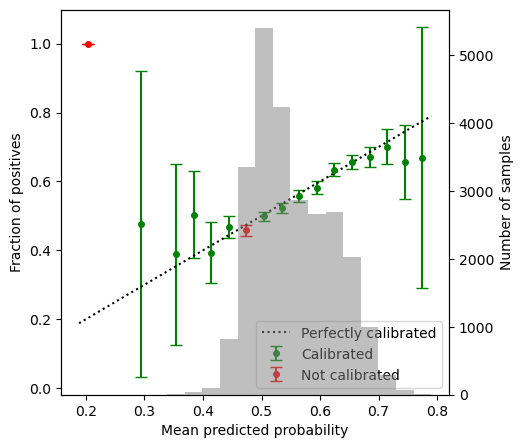

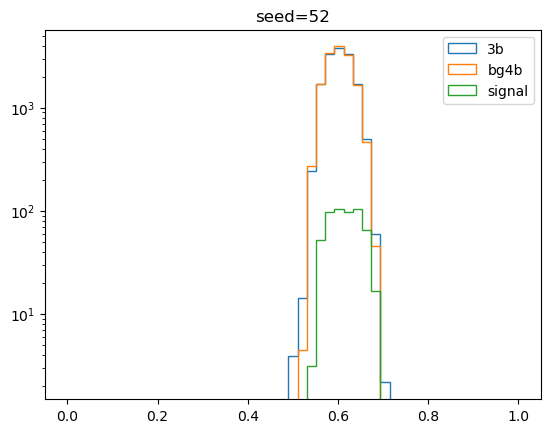

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


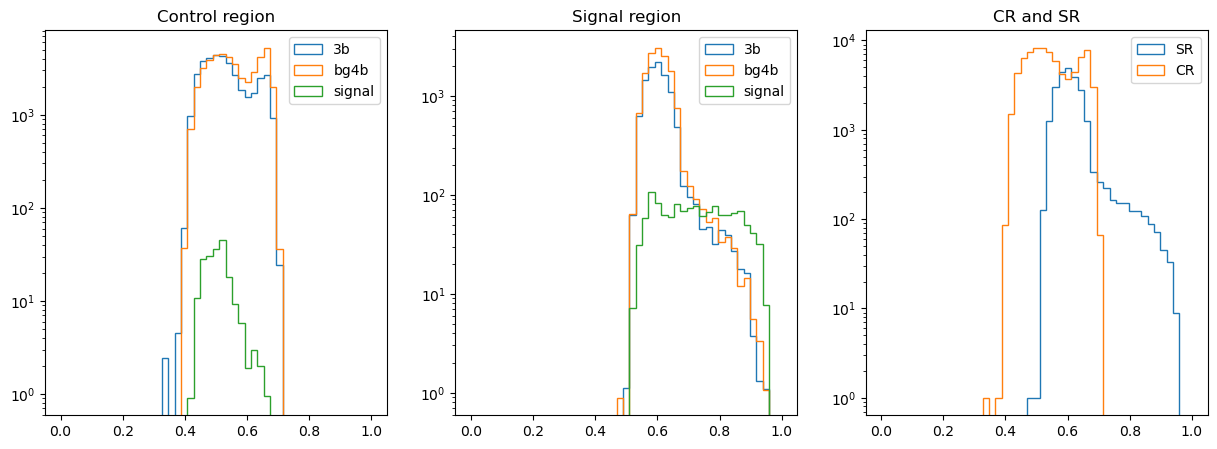

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 51/51 [00:01<00:00, 27.02it/s, v_num=3, val_loss=0.680, train_loss=0.679]


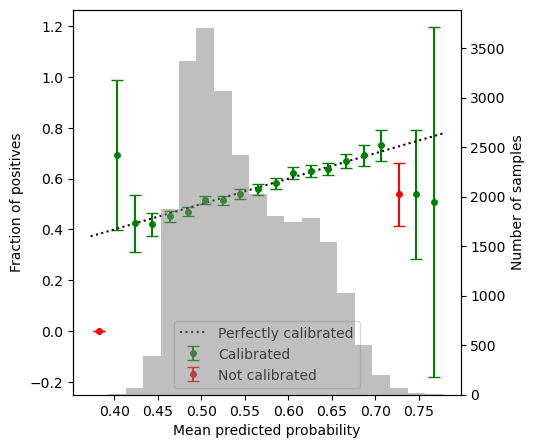

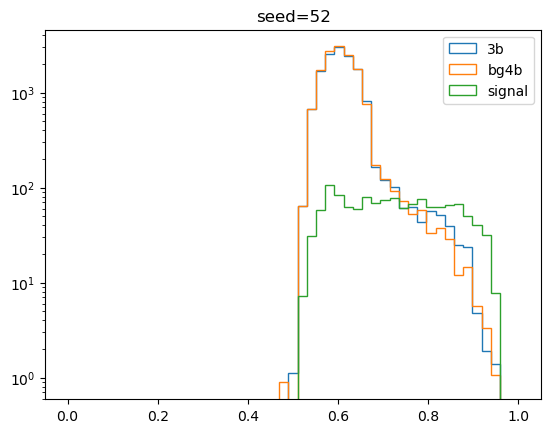

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


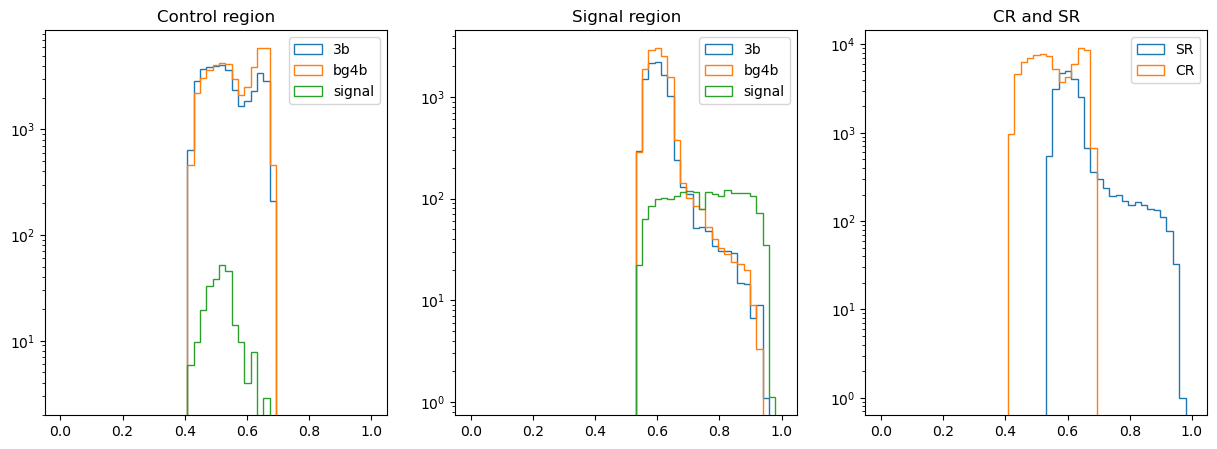

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 14: 100%|██████████| 51/51 [00:01<00:00, 26.13it/s, v_num=4, val_loss=0.680, train_loss=0.679]


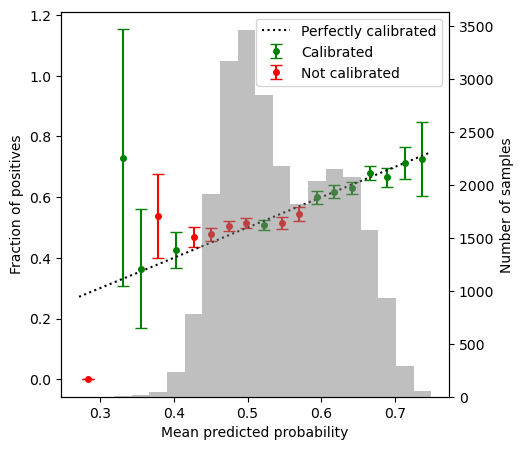

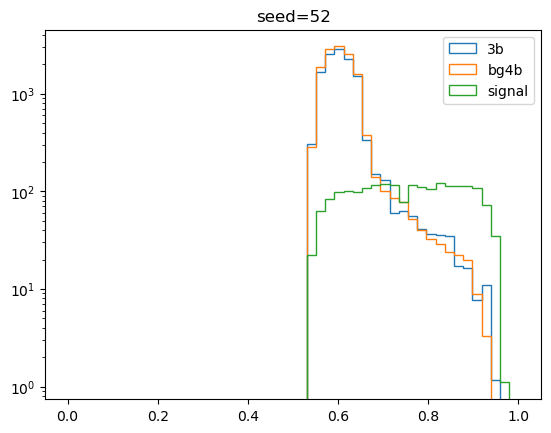

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


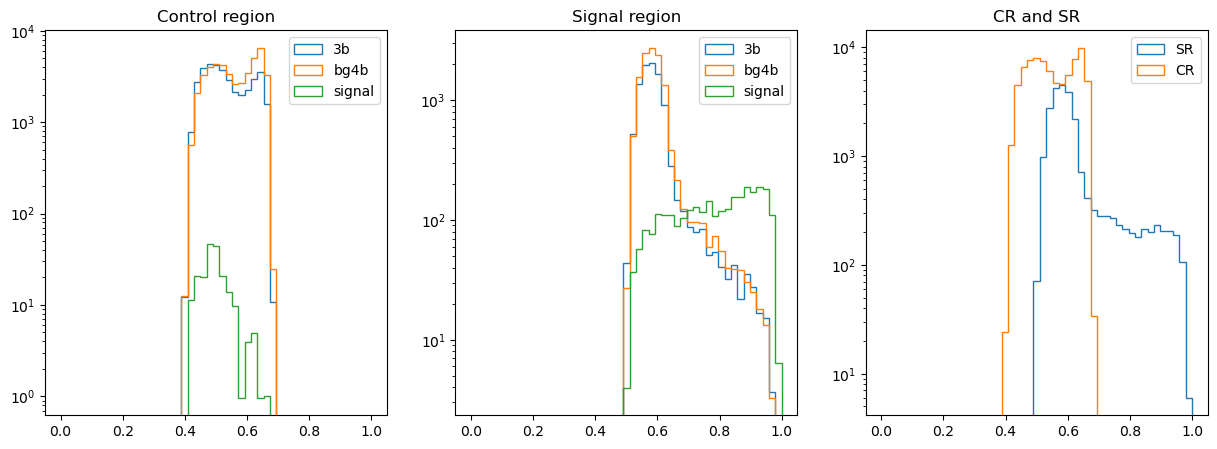

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.43it/s, v_num=5, val_loss=0.677, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.30it/s, v_num=5, val_loss=0.677, train_loss=0.678]


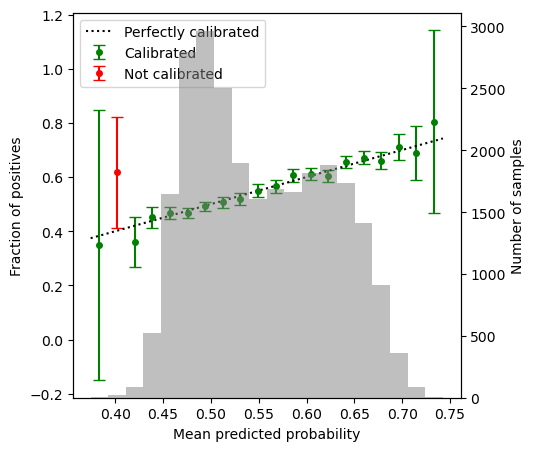

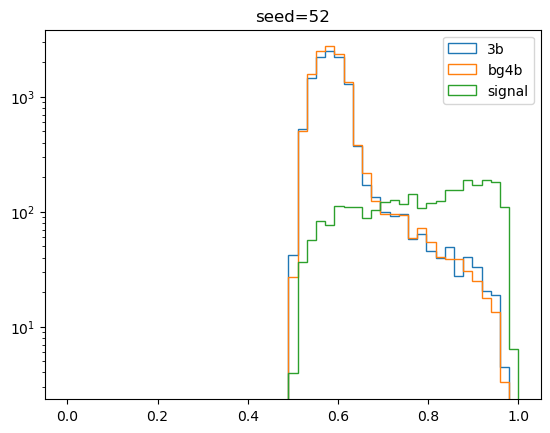

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


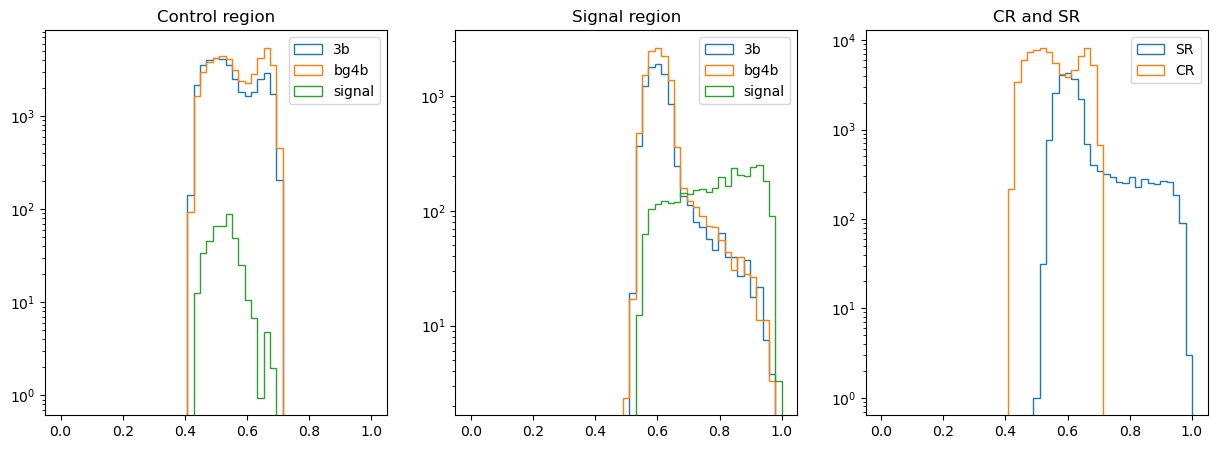

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.20it/s, v_num=6, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.44it/s, v_num=6, val_loss=0.678, train_loss=0.678]


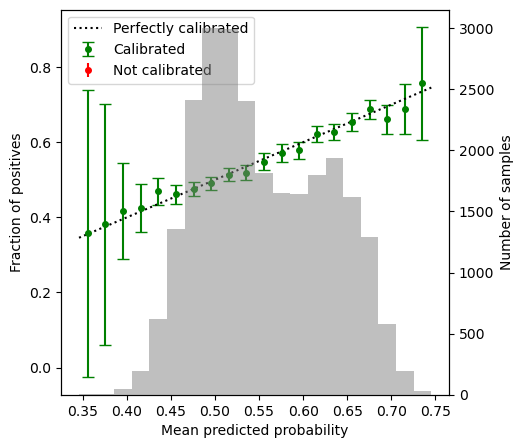

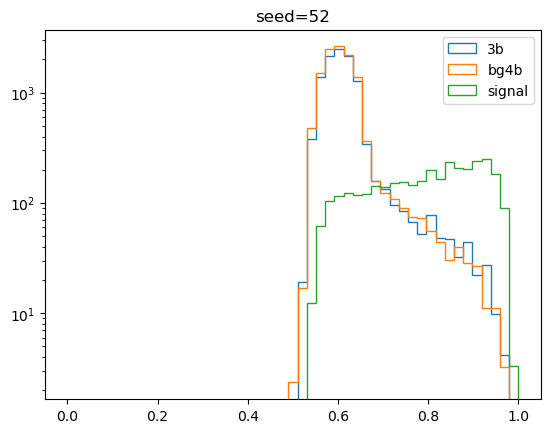

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


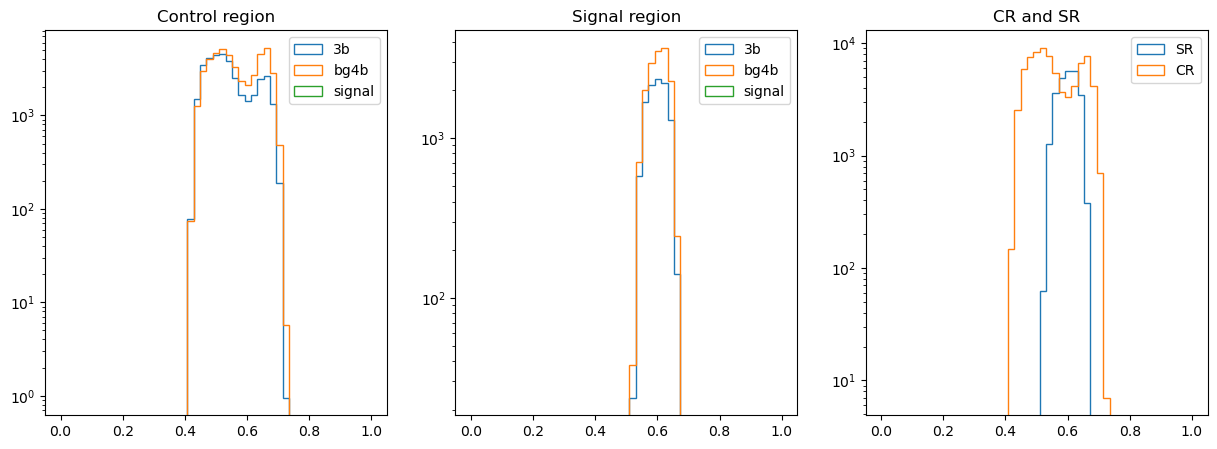

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 16.81it/s, v_num=1, val_loss=0.678, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 16.72it/s, v_num=1, val_loss=0.678, train_loss=0.675]


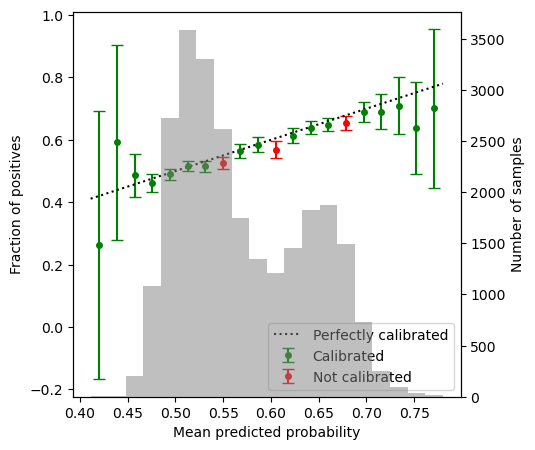

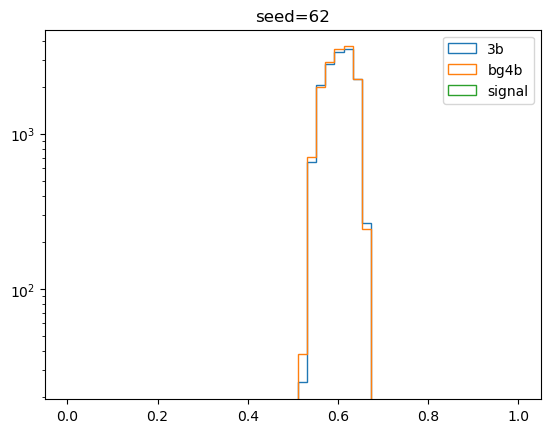

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


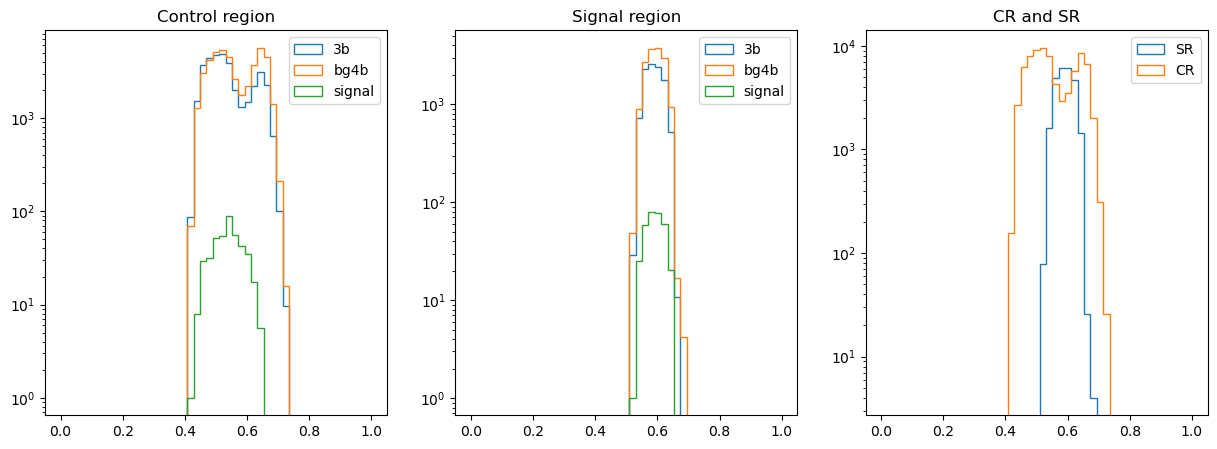

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 50/50 [00:01<00:00, 26.72it/s, v_num=2, val_loss=0.677, train_loss=0.678]


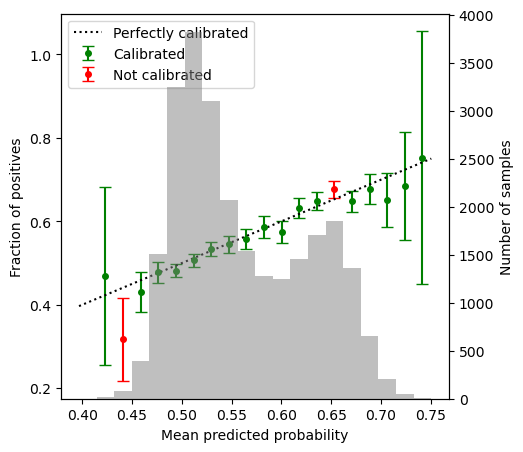

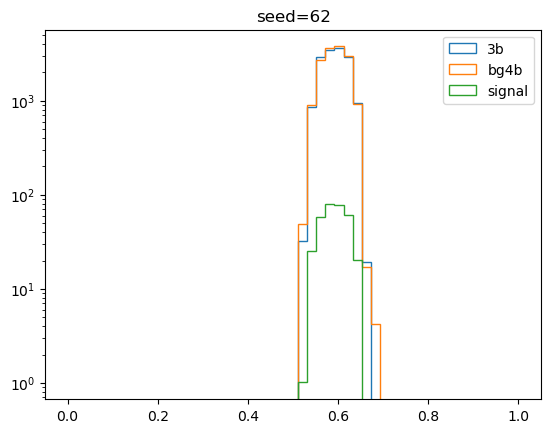

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


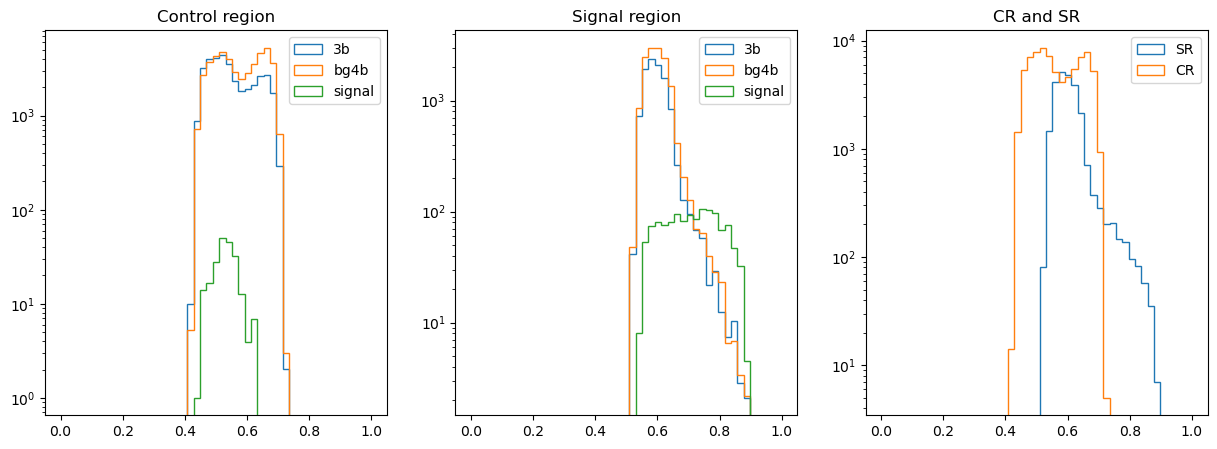

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.32it/s, v_num=3, val_loss=0.674, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.16it/s, v_num=3, val_loss=0.674, train_loss=0.676]


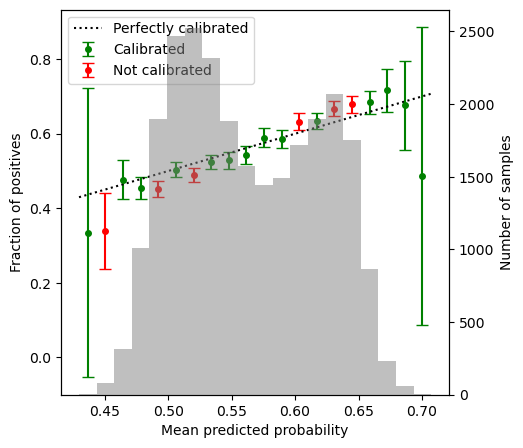

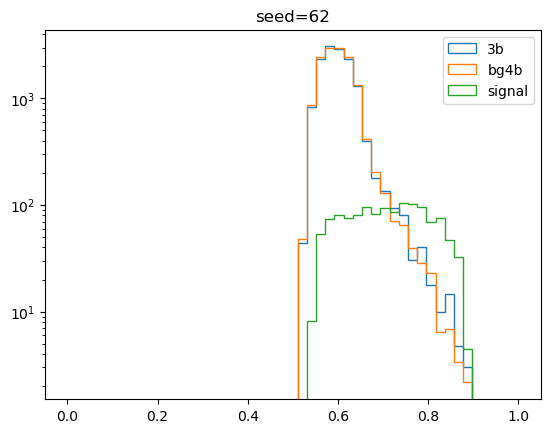

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


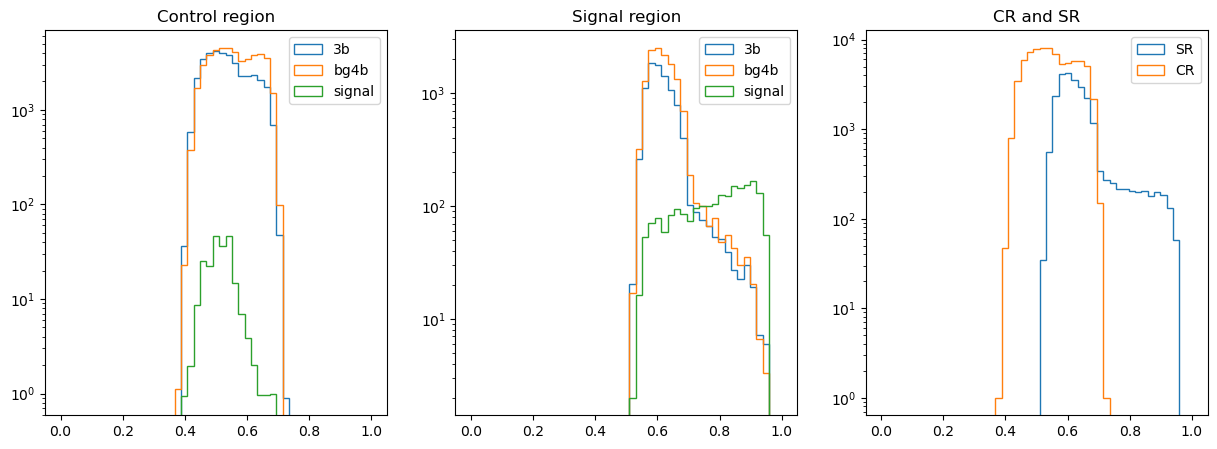

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.31it/s, v_num=4, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.06it/s, v_num=4, val_loss=0.678, train_loss=0.678]


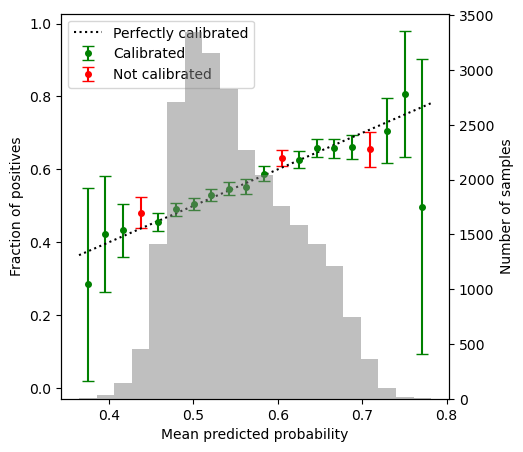

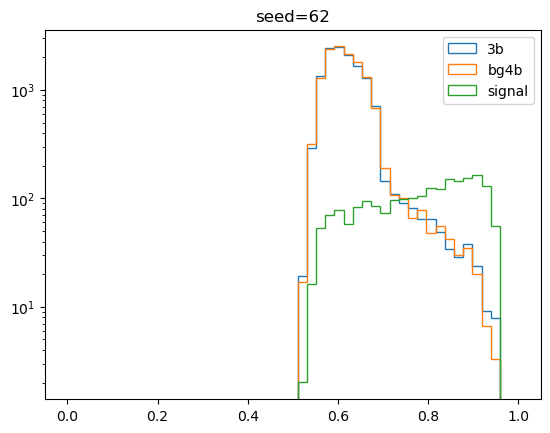

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


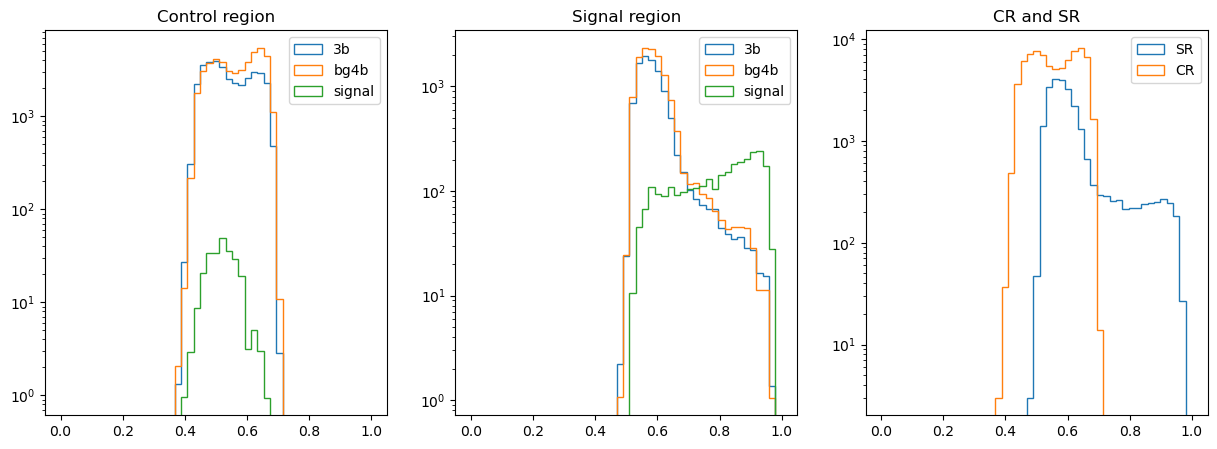

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.81it/s, v_num=5, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.06it/s, v_num=5, val_loss=0.676, train_loss=0.676]


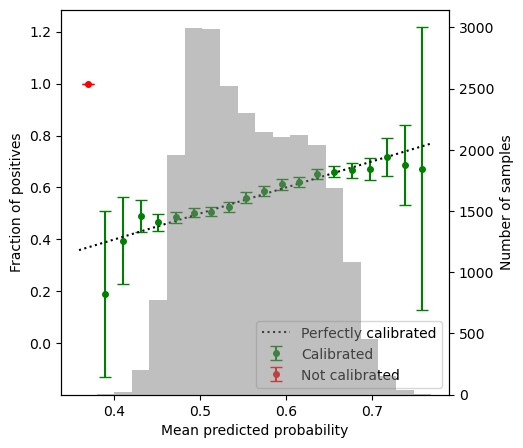

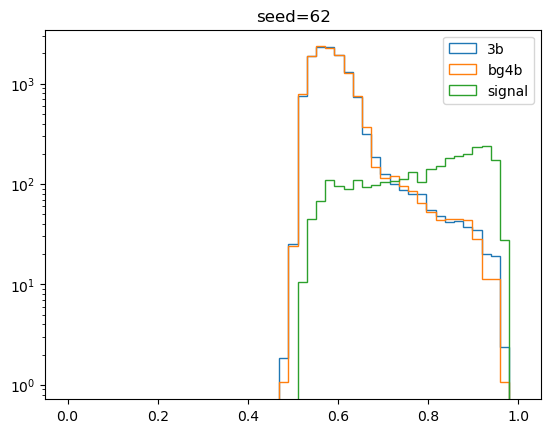

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


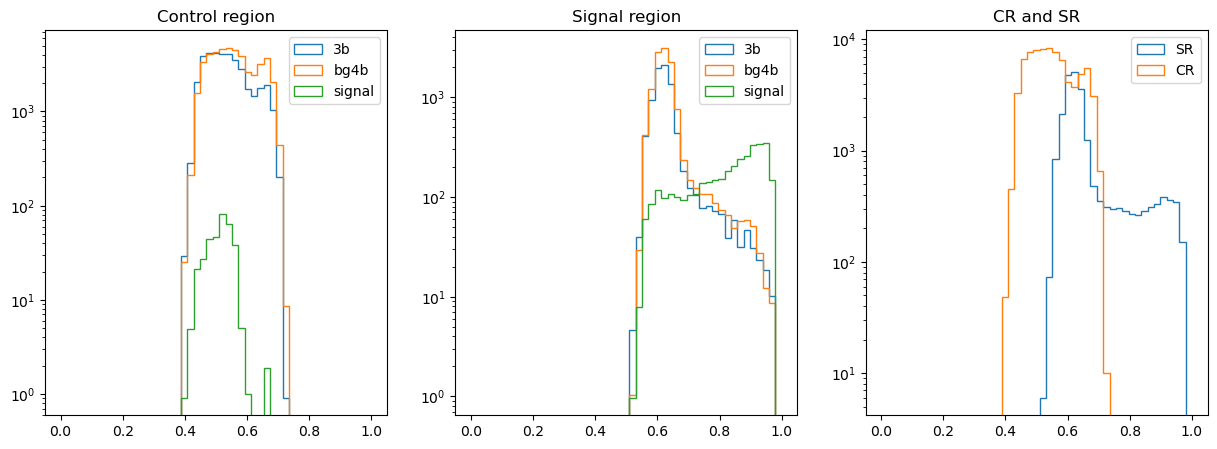

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 16: 100%|██████████| 51/51 [00:01<00:00, 28.39it/s, v_num=6, val_loss=0.679, train_loss=0.680]


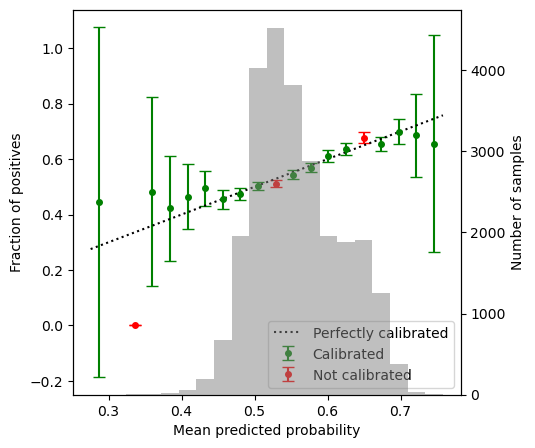

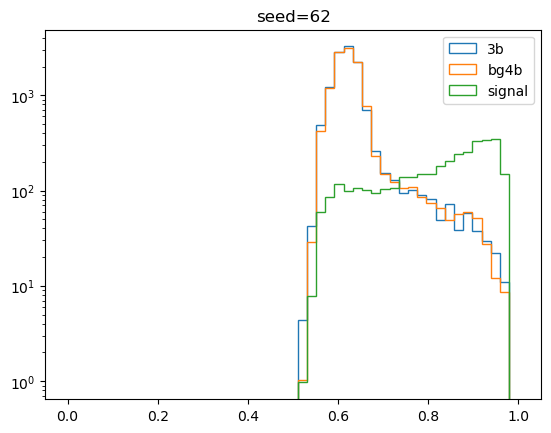

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


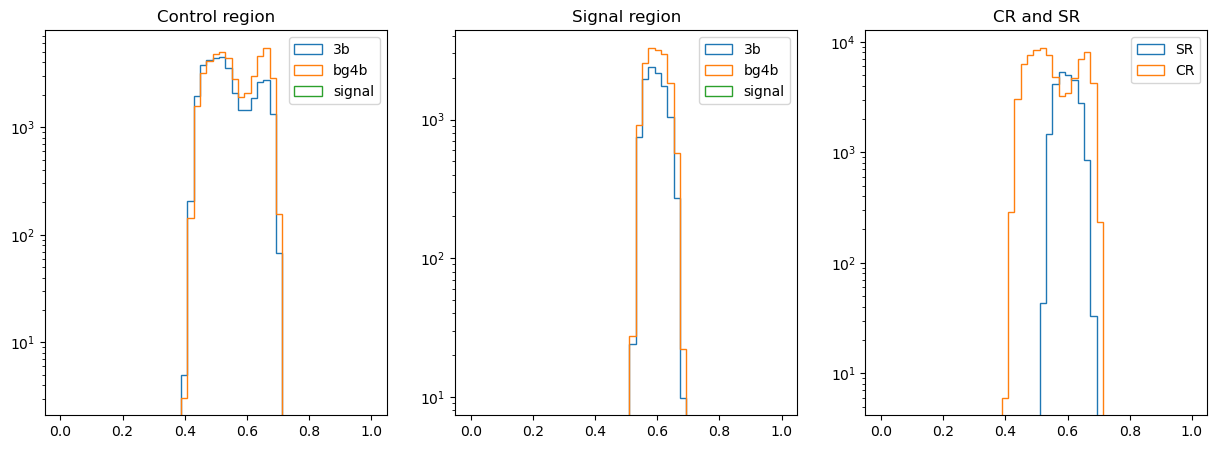

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.92it/s, v_num=4, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.15it/s, v_num=4, val_loss=0.676, train_loss=0.677]


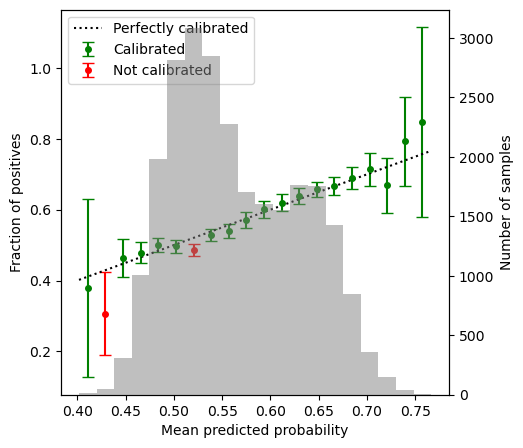

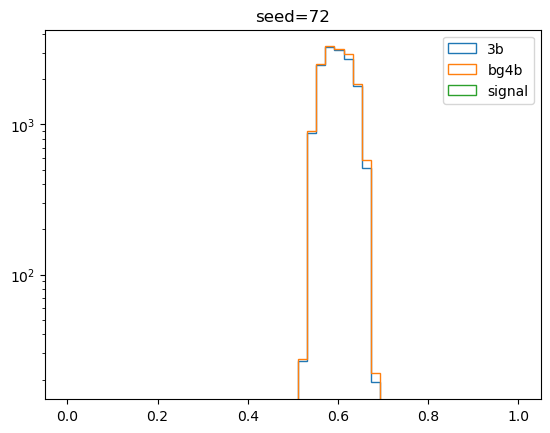

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


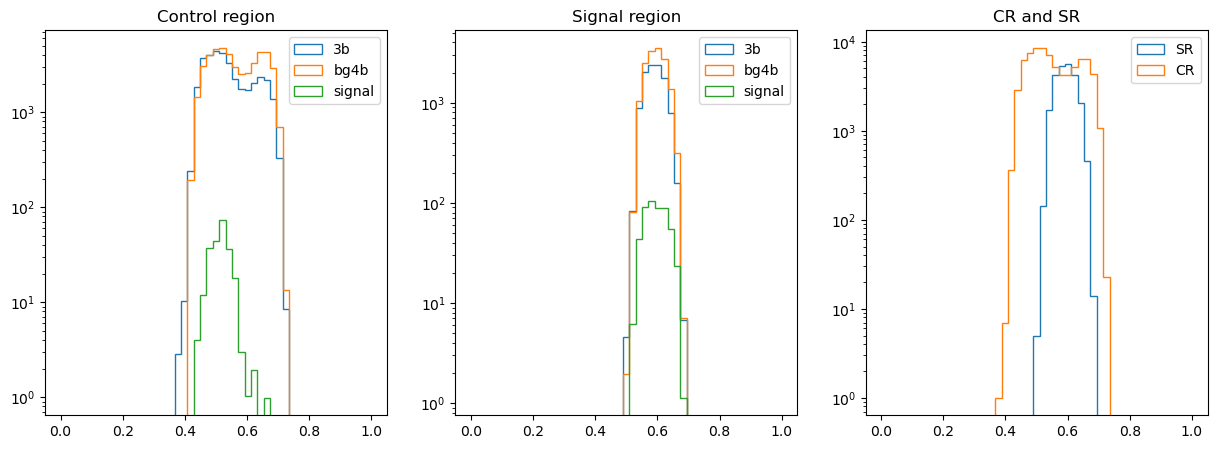

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.33it/s, v_num=5, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.22it/s, v_num=5, val_loss=0.676, train_loss=0.677]


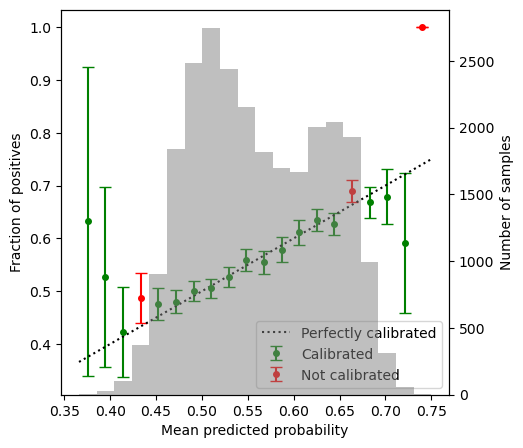

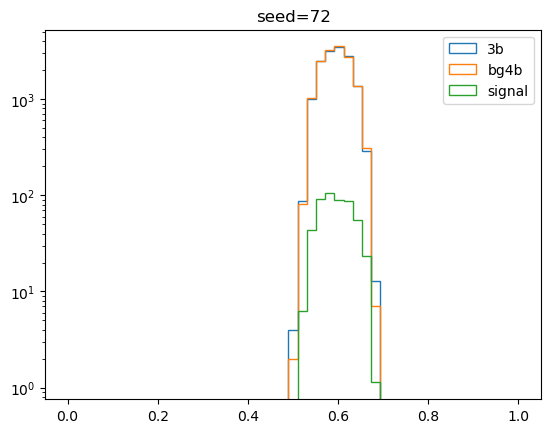

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


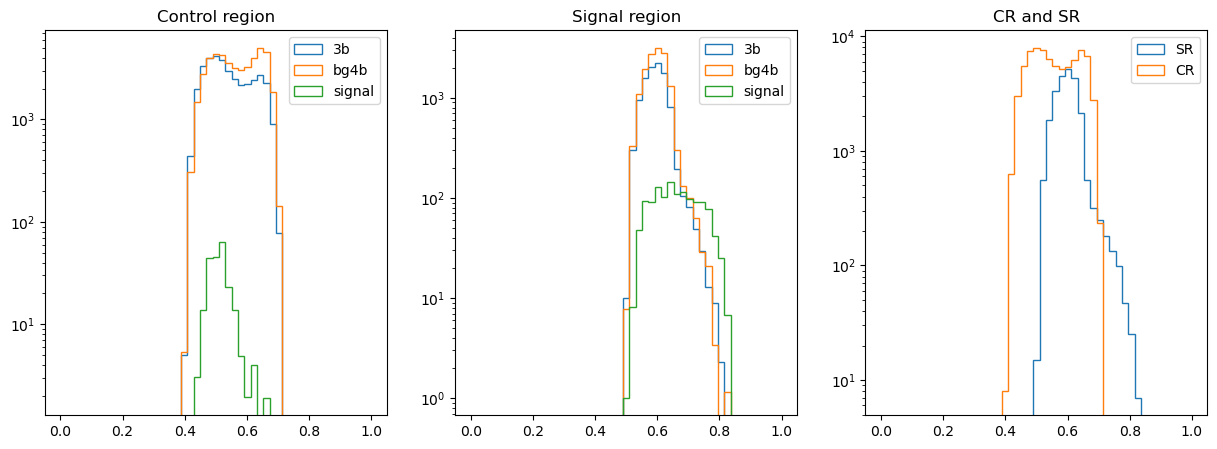

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 50/50 [00:03<00:00, 15.43it/s, v_num=6, val_loss=0.678, train_loss=0.676]


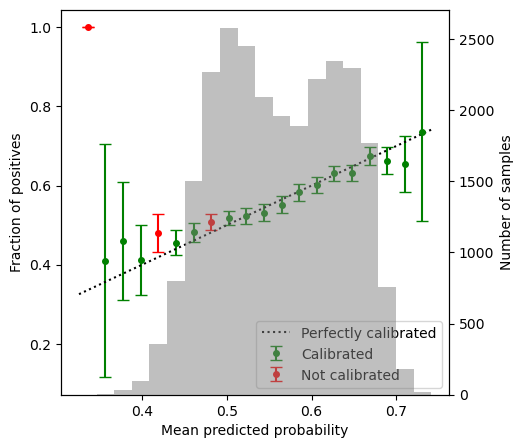

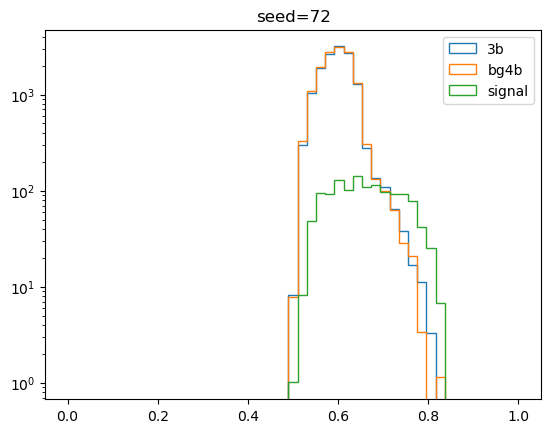

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


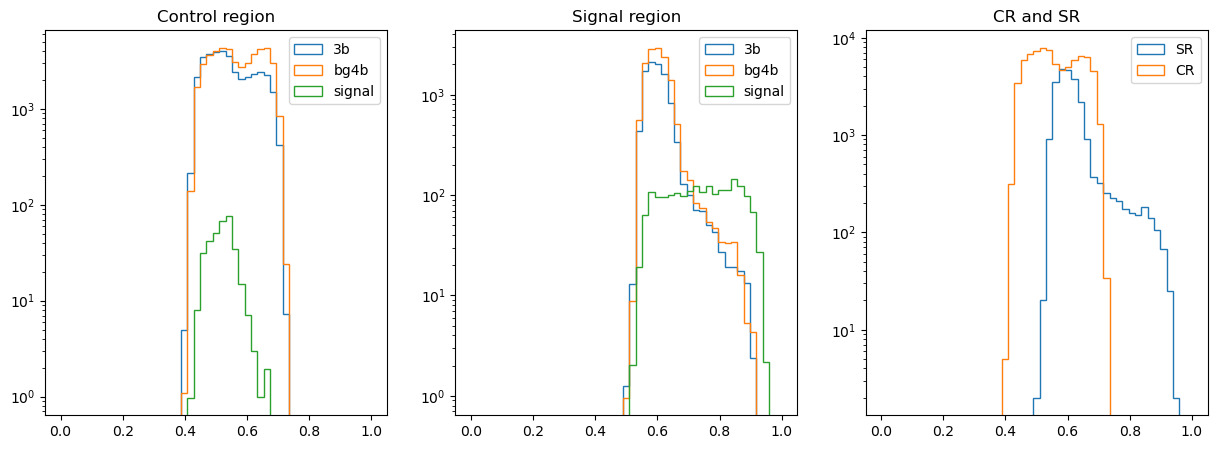

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.28it/s, v_num=7, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.59it/s, v_num=7, val_loss=0.679, train_loss=0.678]


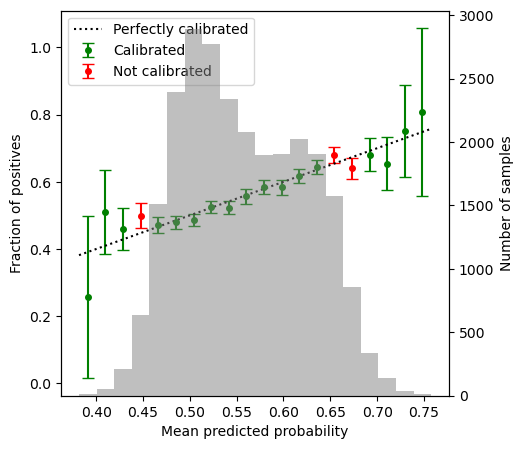

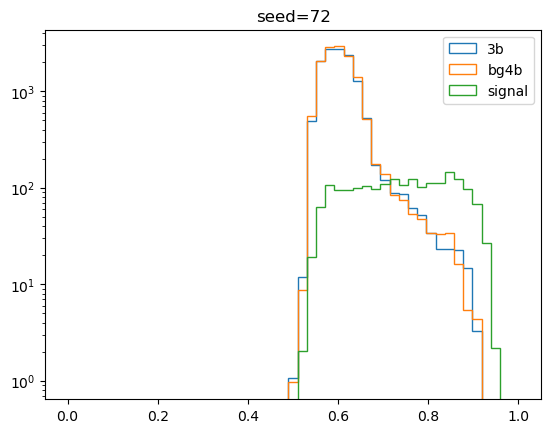

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


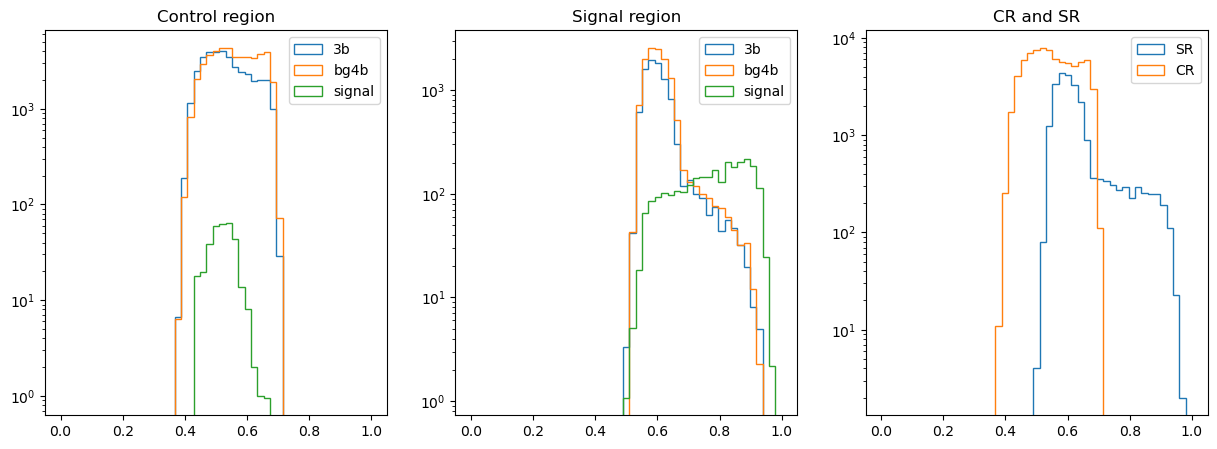

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.28it/s, v_num=8, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.09it/s, v_num=8, val_loss=0.678, train_loss=0.678]


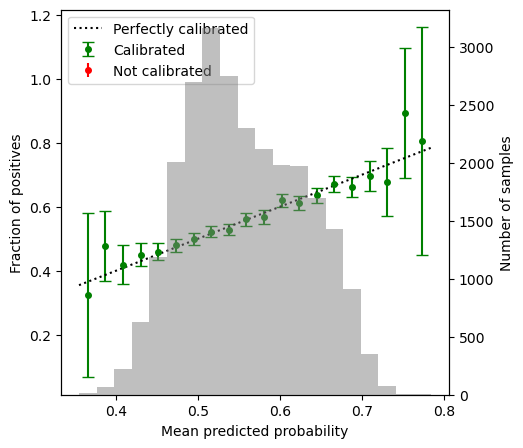

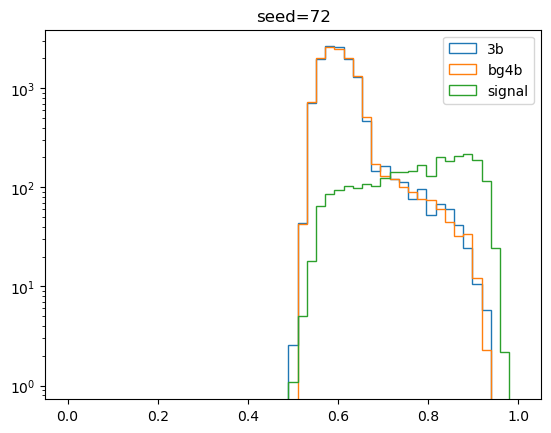

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


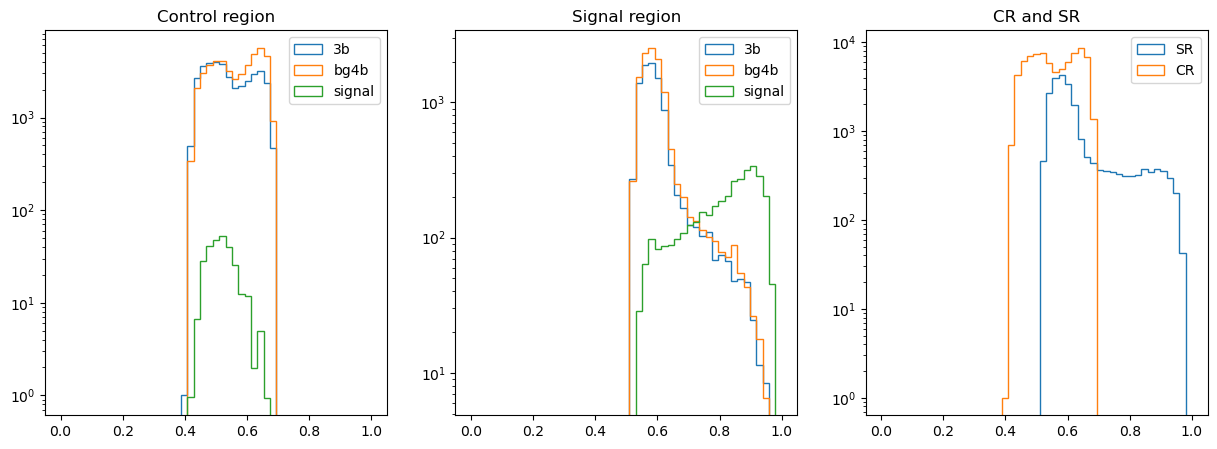

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 13: 100%|██████████| 51/51 [00:01<00:00, 27.28it/s, v_num=9, val_loss=0.677, train_loss=0.679]


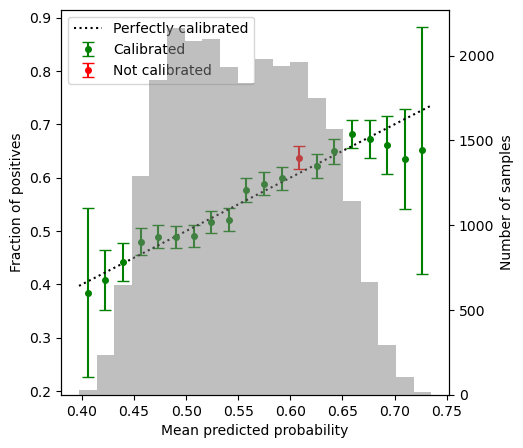

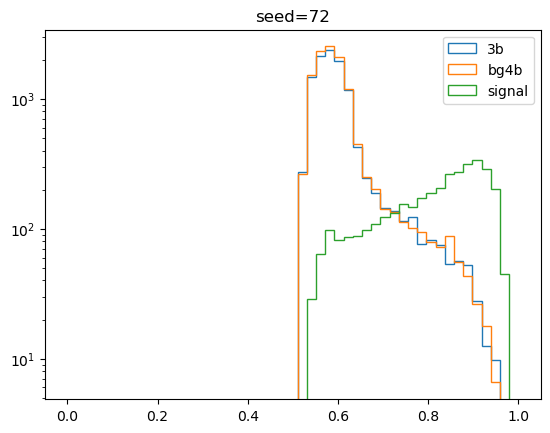

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


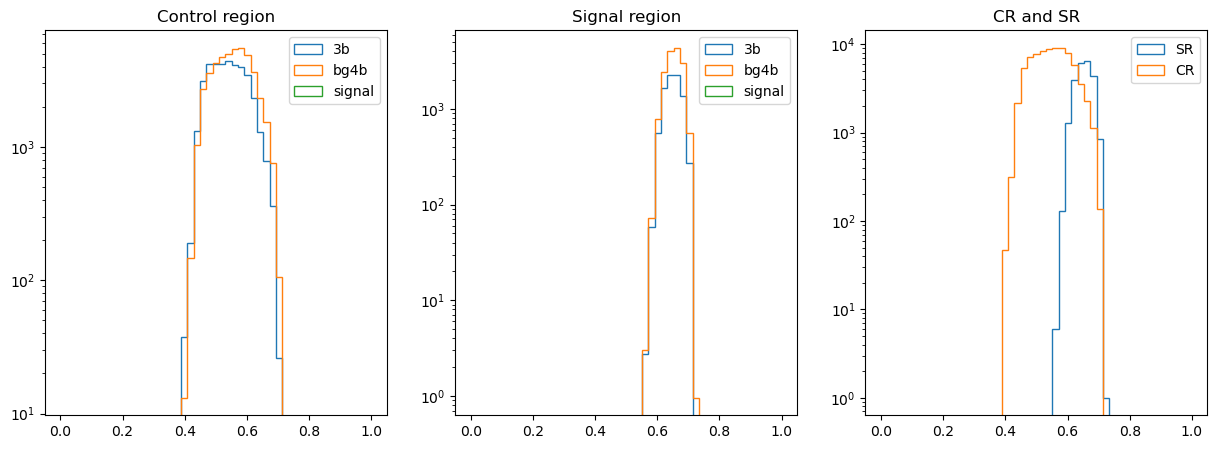

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.14it/s, v_num=3, val_loss=0.683, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.48it/s, v_num=3, val_loss=0.683, train_loss=0.683]


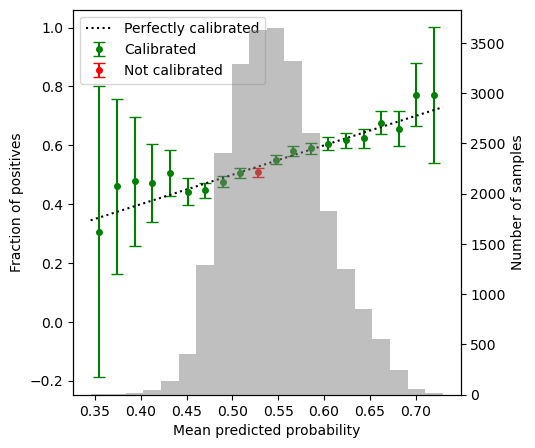

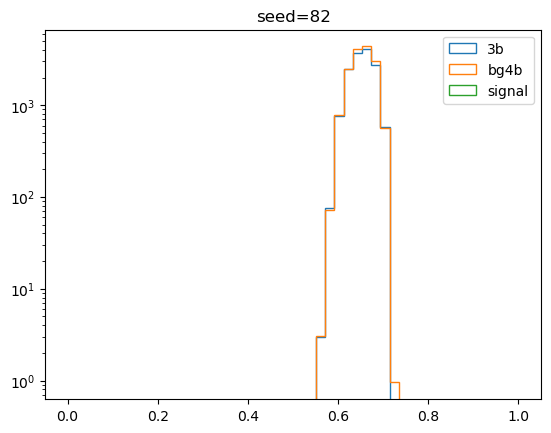

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


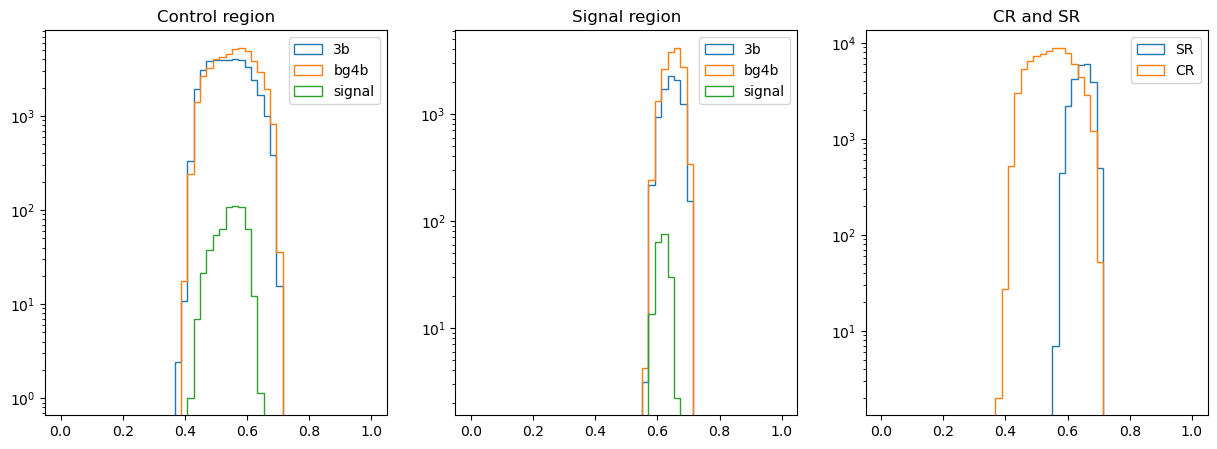

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.41it/s, v_num=4, val_loss=0.682, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.19it/s, v_num=4, val_loss=0.682, train_loss=0.683]


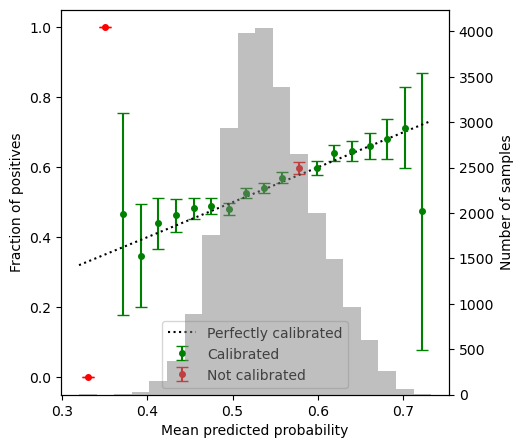

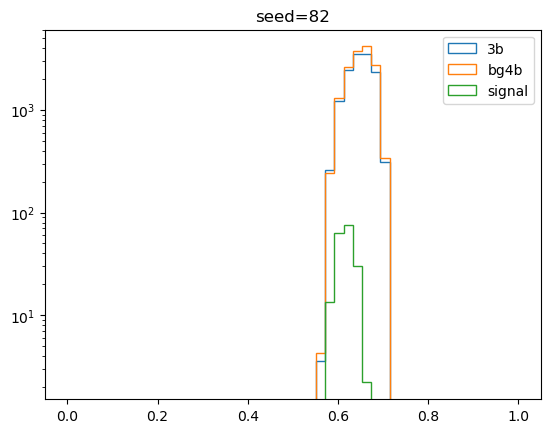

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


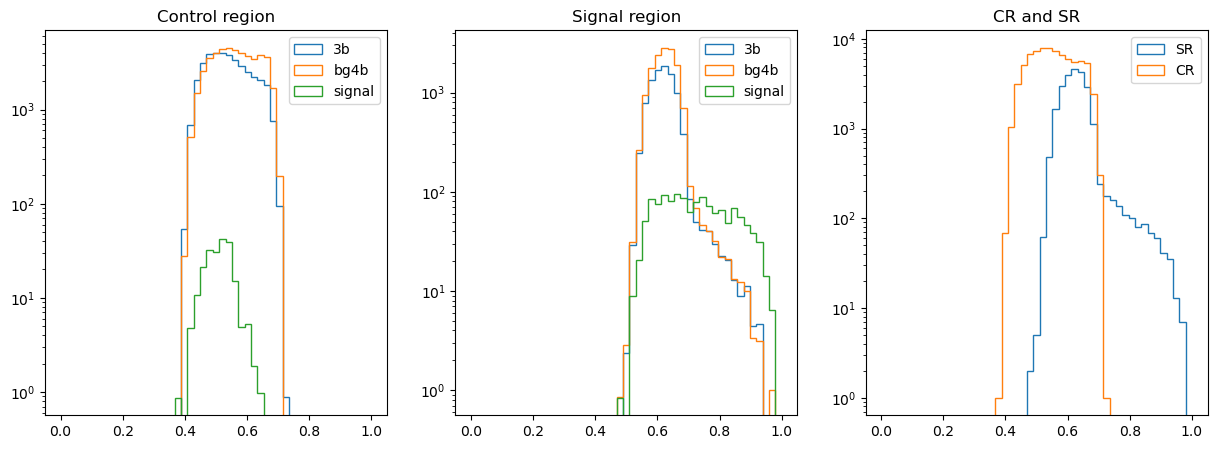

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.15it/s, v_num=5, val_loss=0.680, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 24.64it/s, v_num=5, val_loss=0.680, train_loss=0.680]


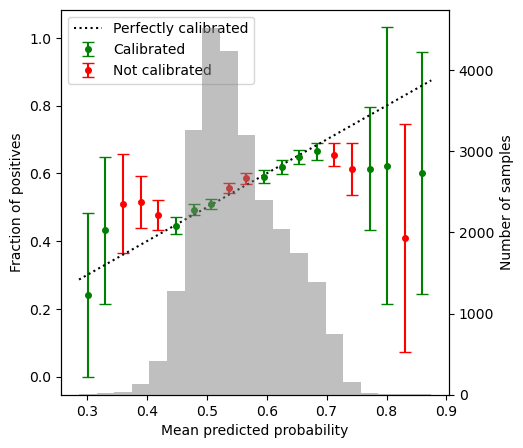

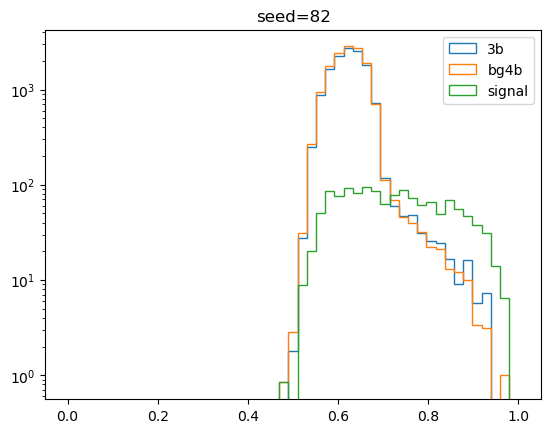

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


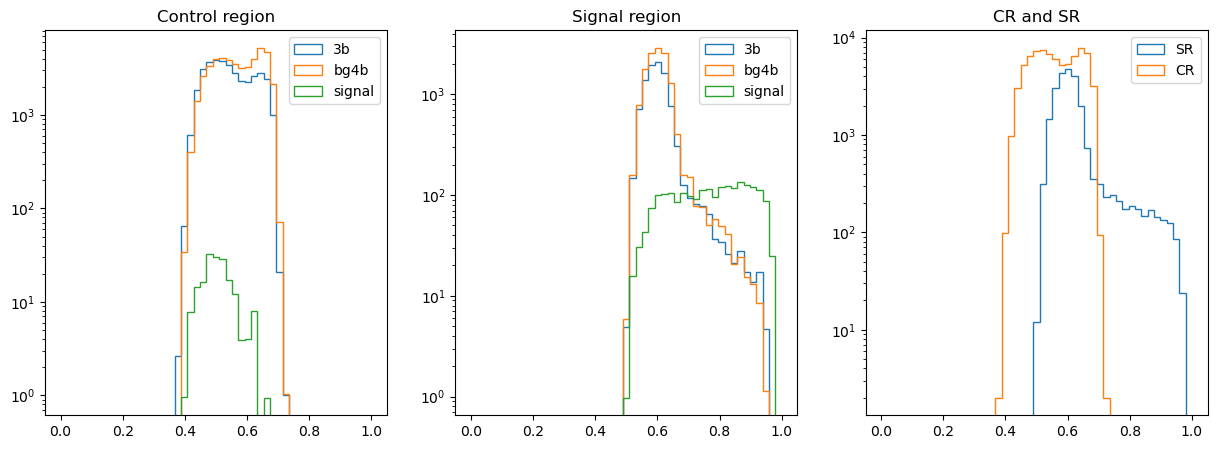

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:01<00:00, 25.66it/s, v_num=6, val_loss=0.676, train_loss=0.678]


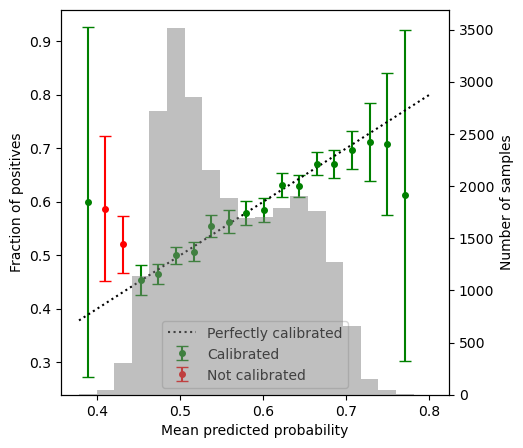

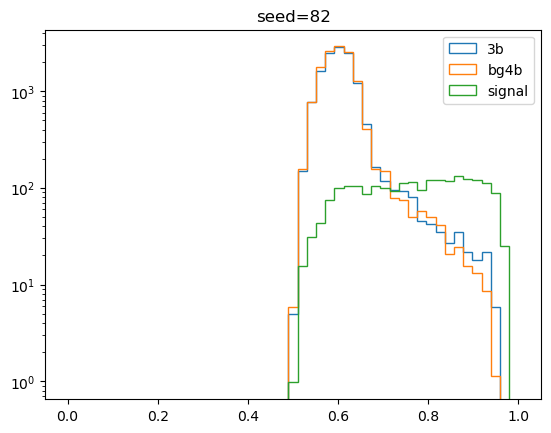

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


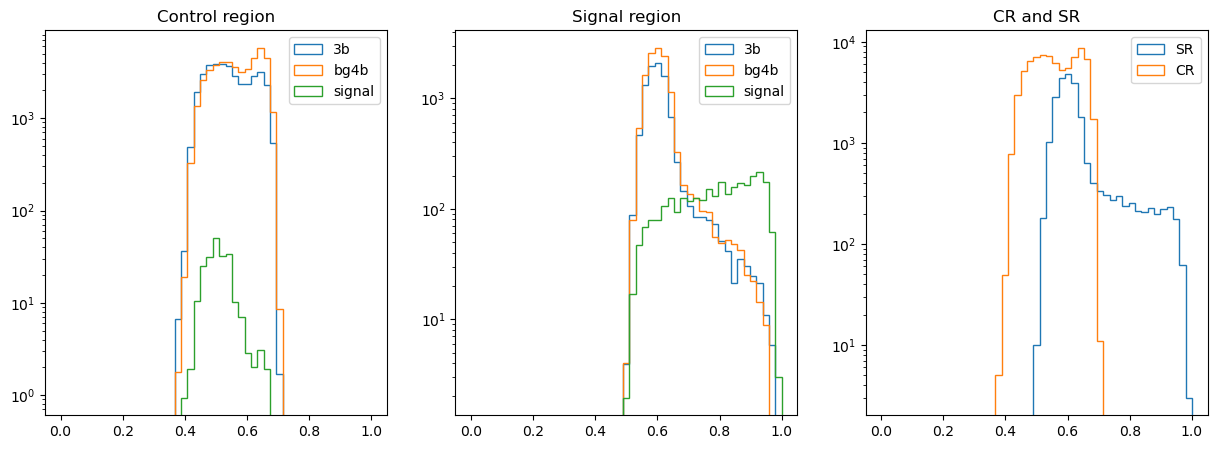

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:02<00:00, 23.45it/s, v_num=7, val_loss=0.678, train_loss=0.678]


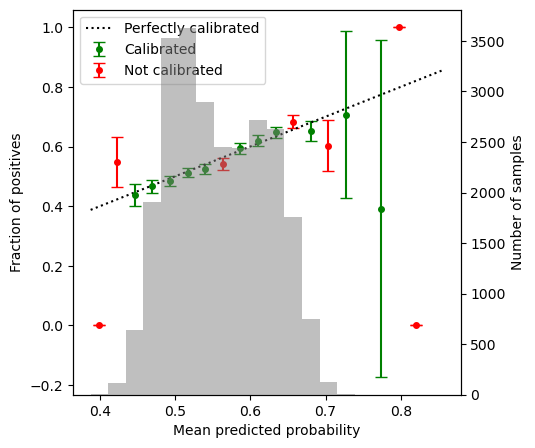

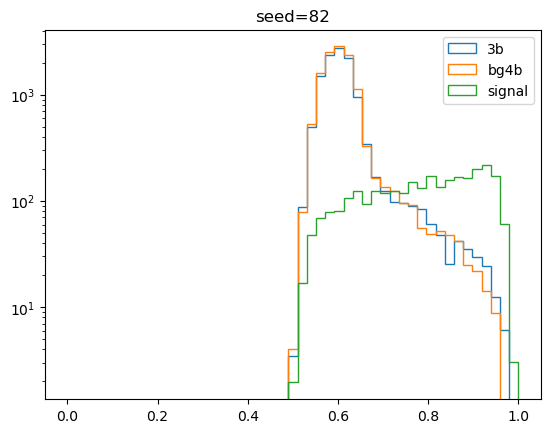

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


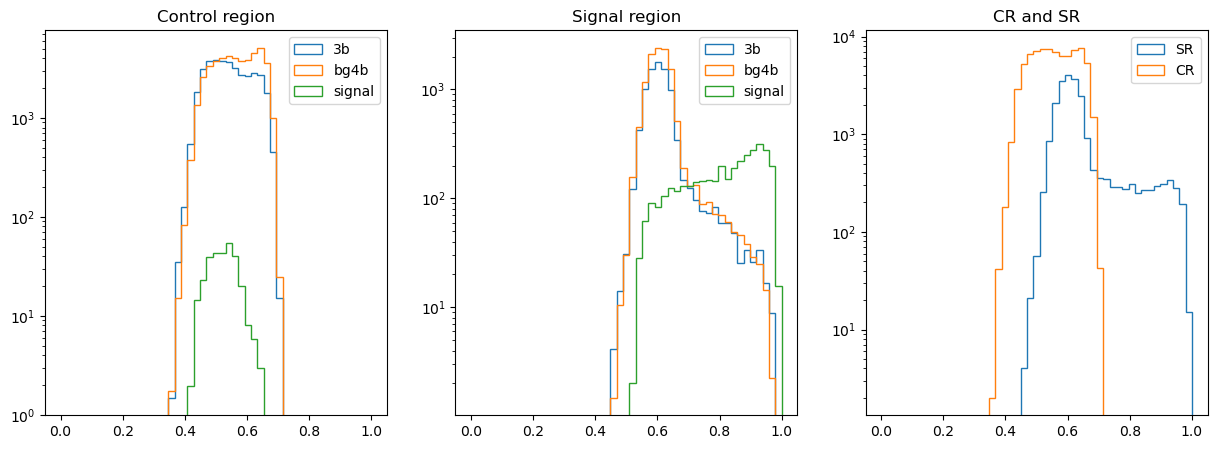

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.20it/s, v_num=8, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.10it/s, v_num=8, val_loss=0.679, train_loss=0.678]


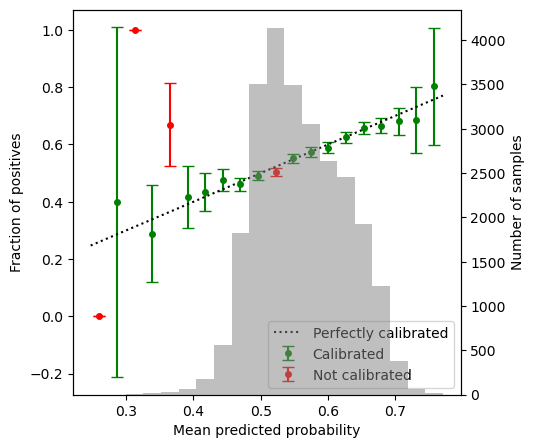

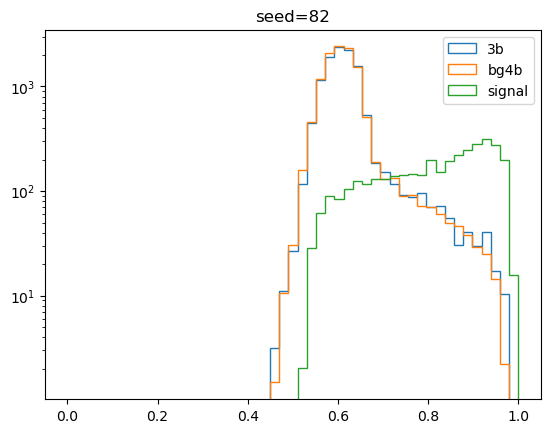

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


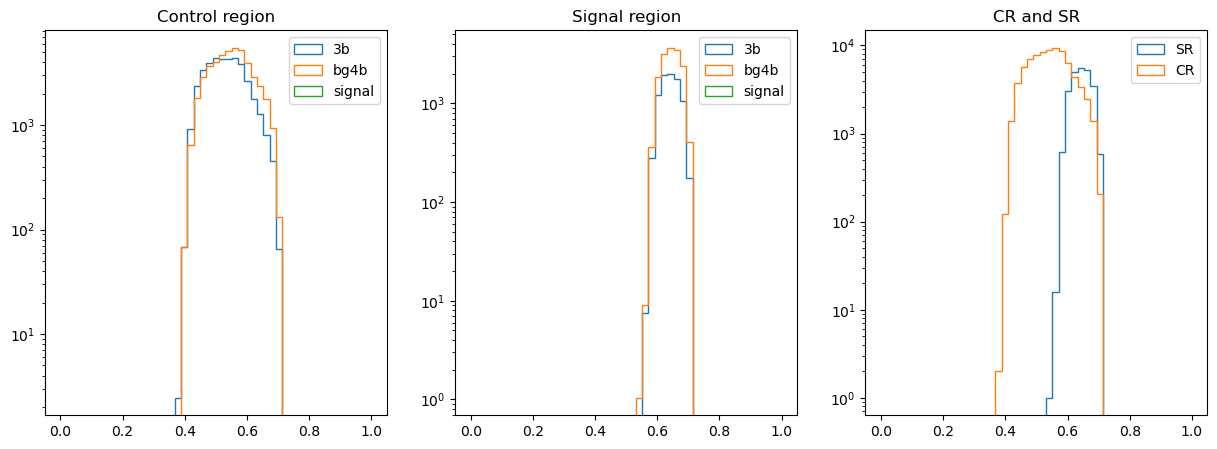

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.84it/s, v_num=3, val_loss=0.682, train_loss=0.682]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.71it/s, v_num=3, val_loss=0.682, train_loss=0.682]


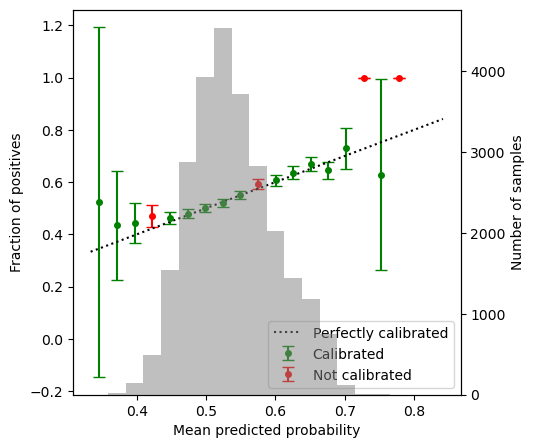

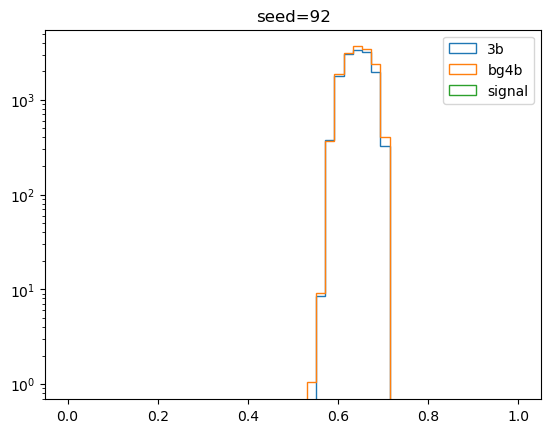

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


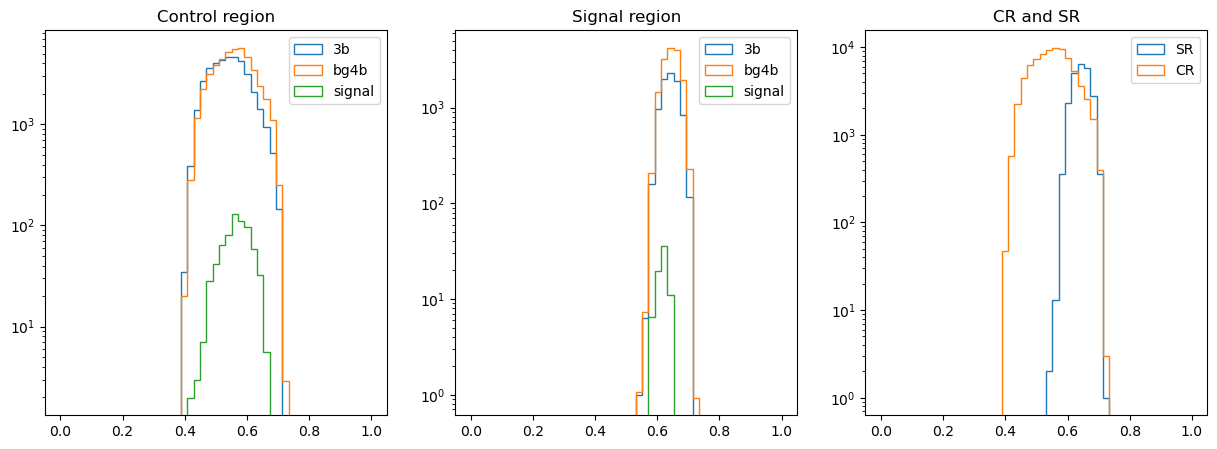

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.20it/s, v_num=4, val_loss=0.683, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.06it/s, v_num=4, val_loss=0.683, train_loss=0.683]


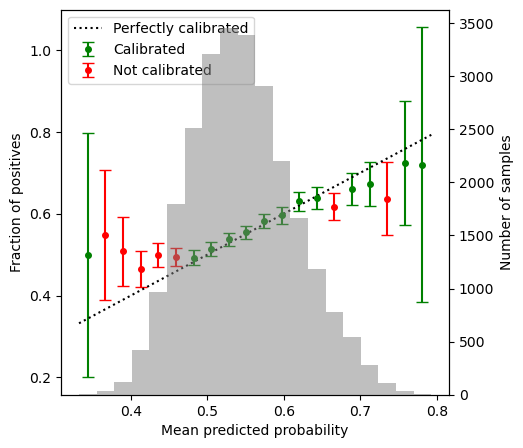

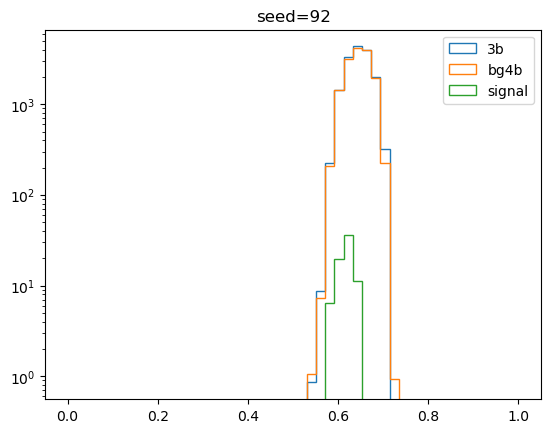

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


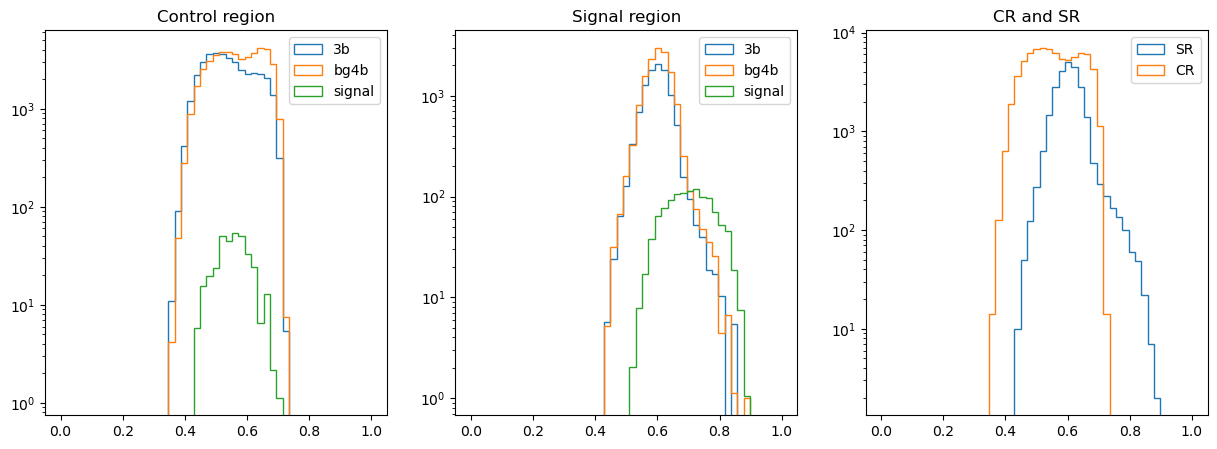

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.12it/s, v_num=5, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.46it/s, v_num=5, val_loss=0.676, train_loss=0.676]


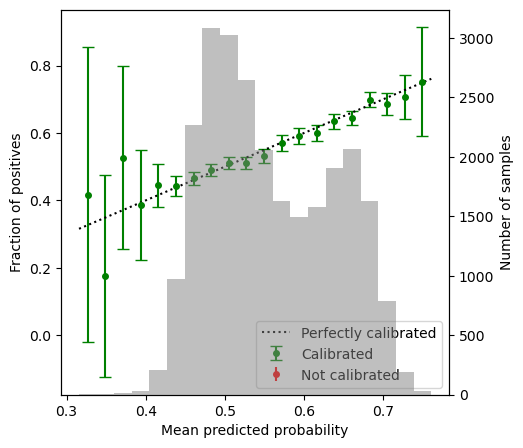

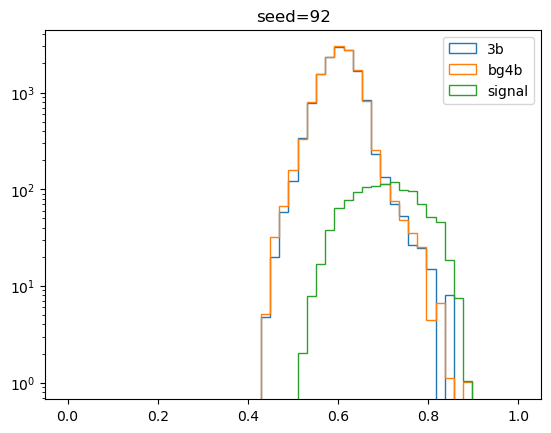

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


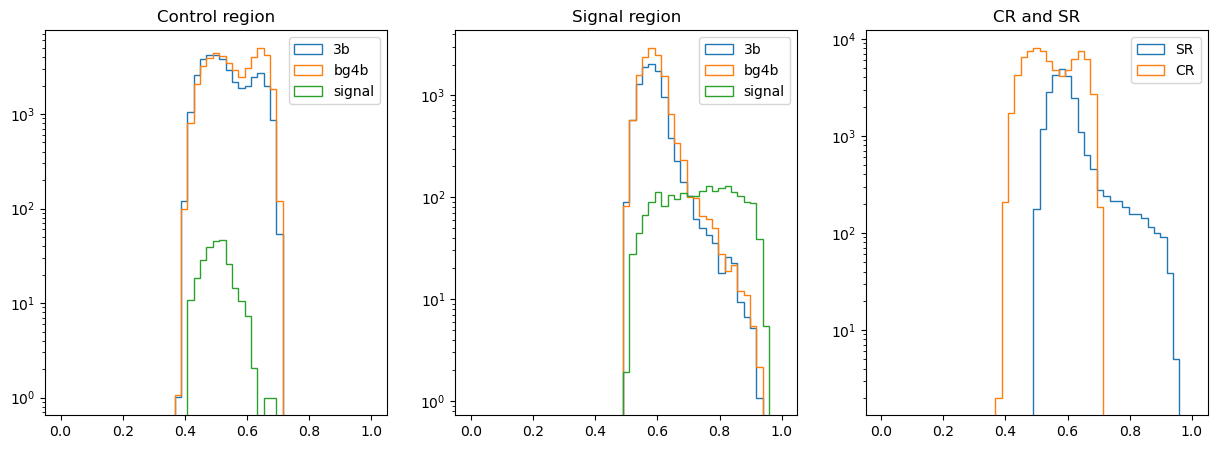

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 13: 100%|██████████| 51/51 [00:02<00:00, 25.39it/s, v_num=6, val_loss=0.676, train_loss=0.678]


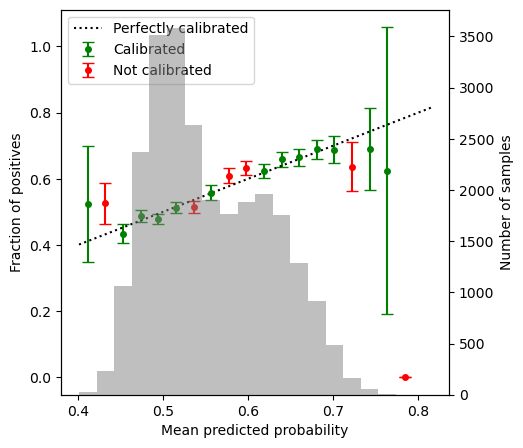

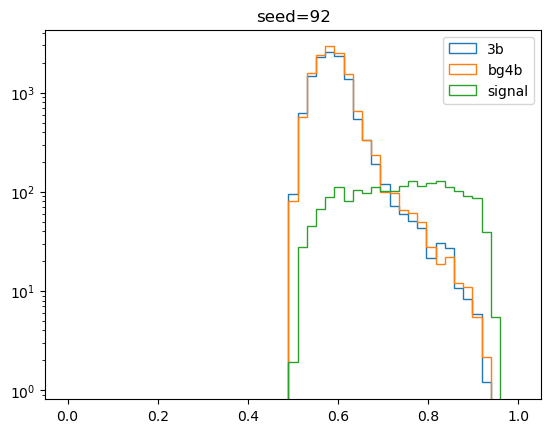

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


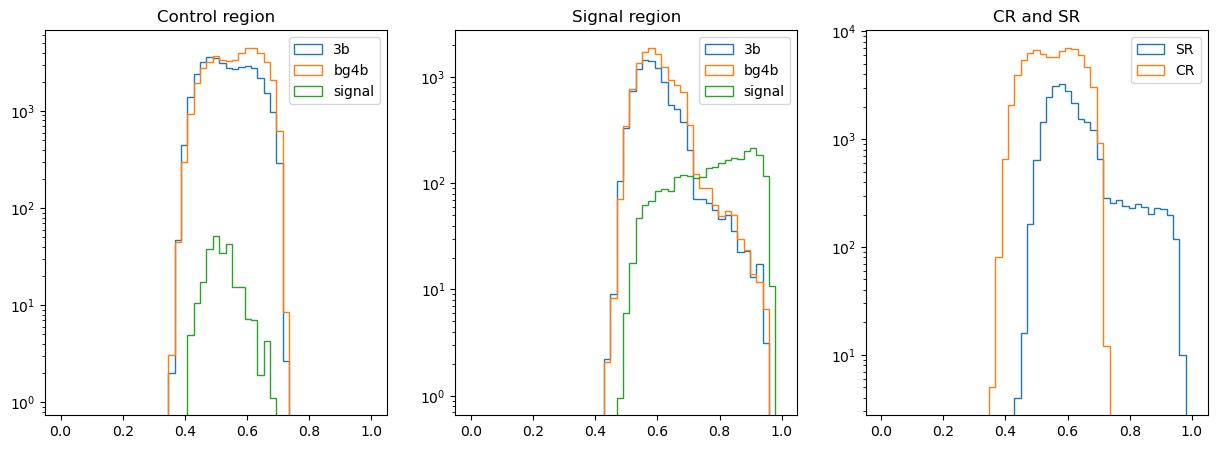

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.45it/s, v_num=7, val_loss=0.674, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.45it/s, v_num=7, val_loss=0.674, train_loss=0.678]


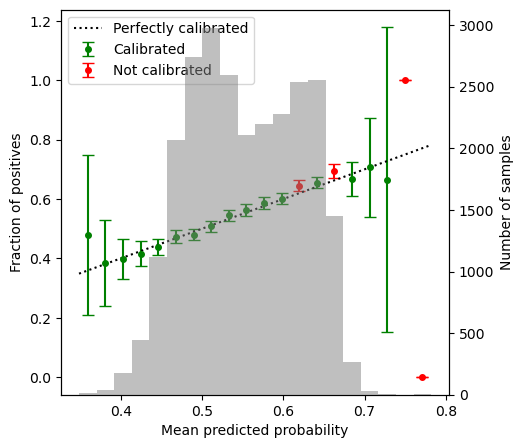

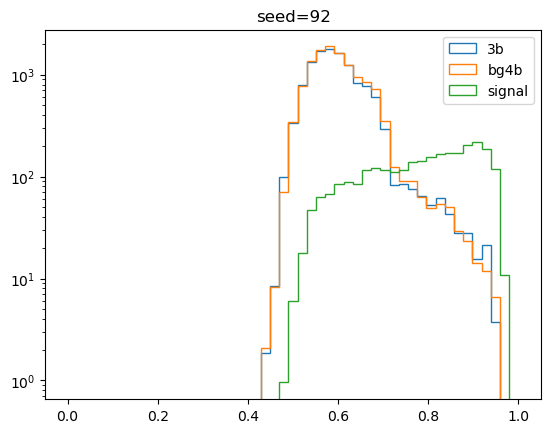

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


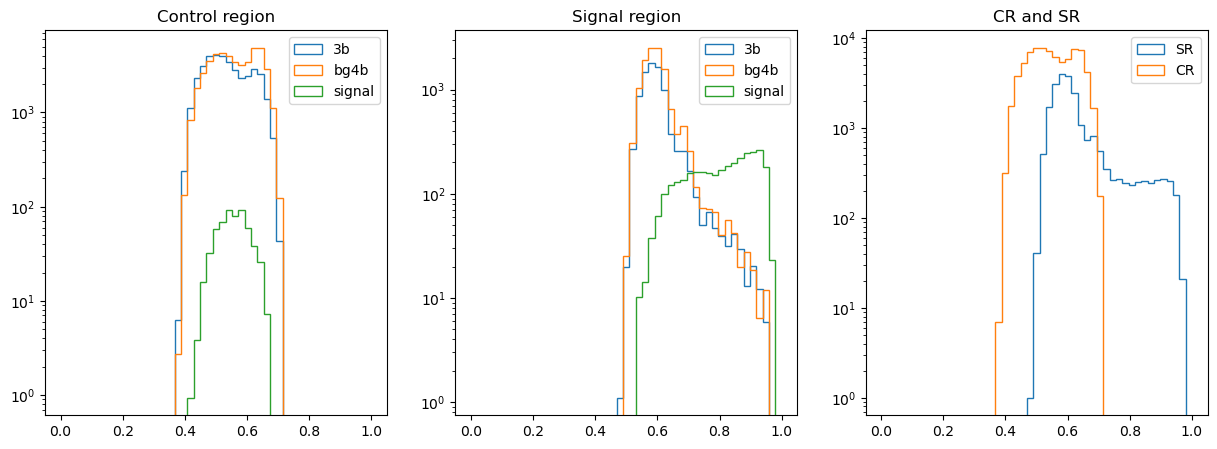

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.33it/s, v_num=8, val_loss=0.679, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.16it/s, v_num=8, val_loss=0.679, train_loss=0.677]


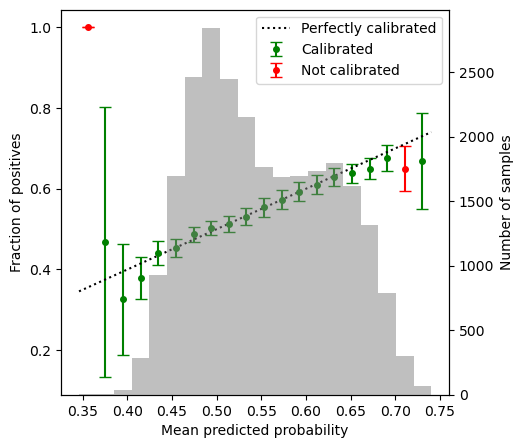

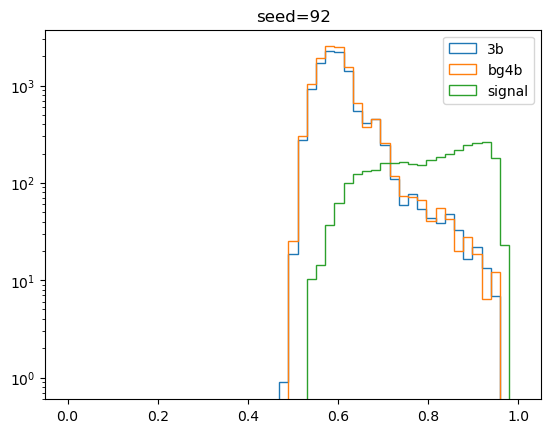

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


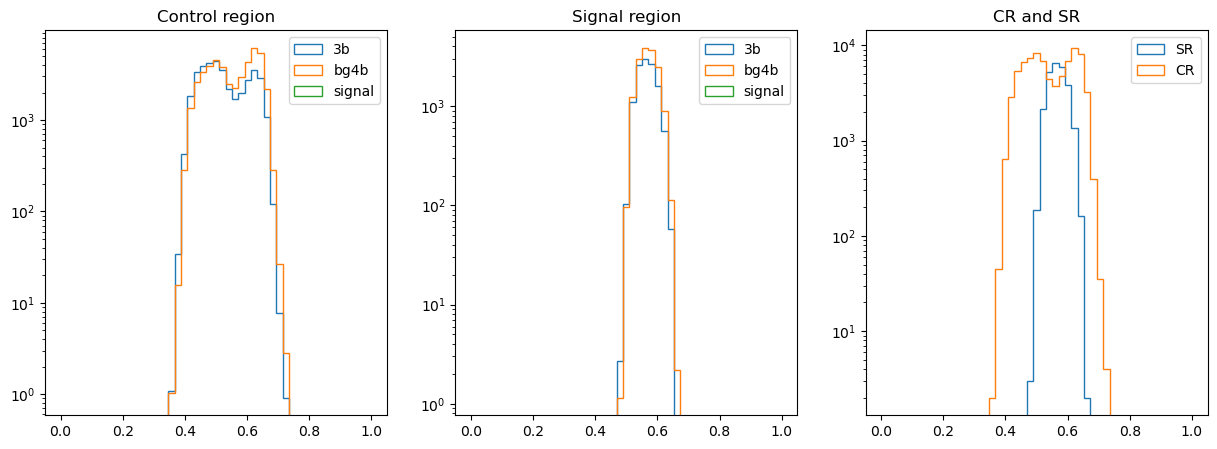

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.90it/s, v_num=9, val_loss=0.678, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.37it/s, v_num=9, val_loss=0.678, train_loss=0.676]


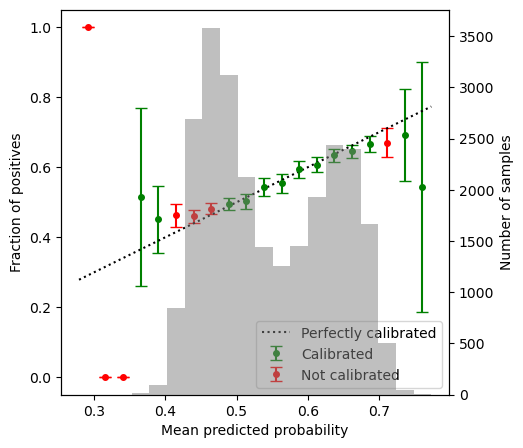

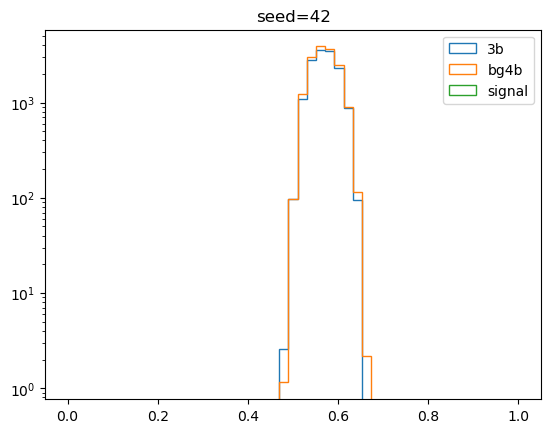

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


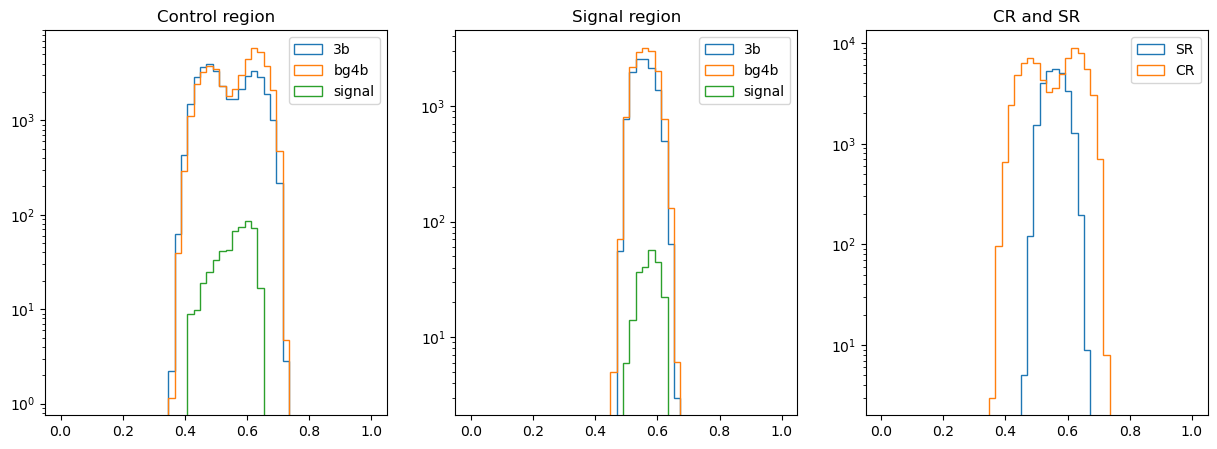

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.38it/s, v_num=10, val_loss=0.675, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.80it/s, v_num=10, val_loss=0.675, train_loss=0.674]


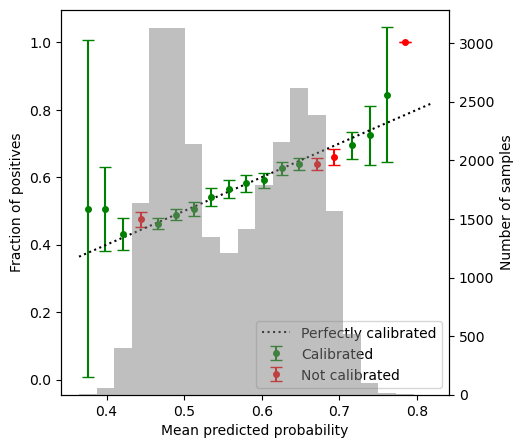

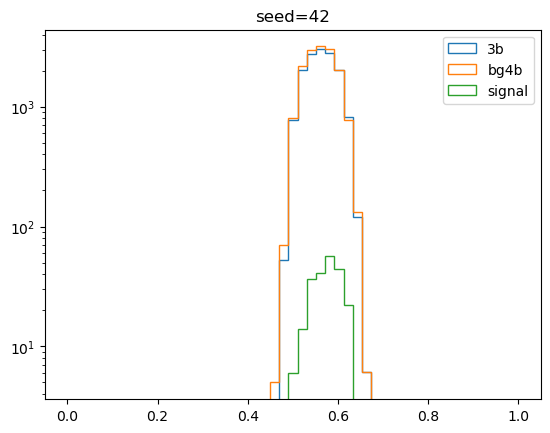

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


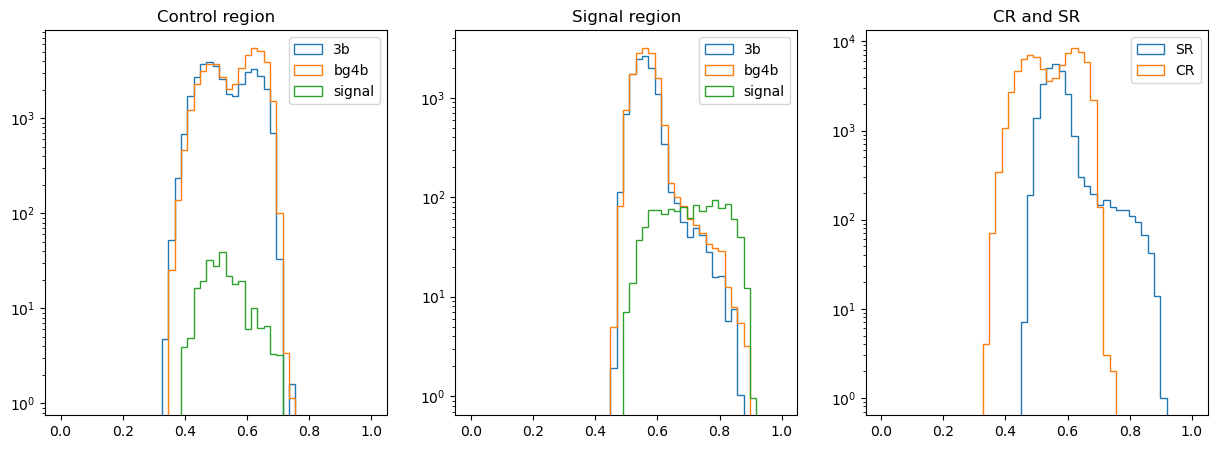

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.12it/s, v_num=11, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.98it/s, v_num=11, val_loss=0.676, train_loss=0.676]


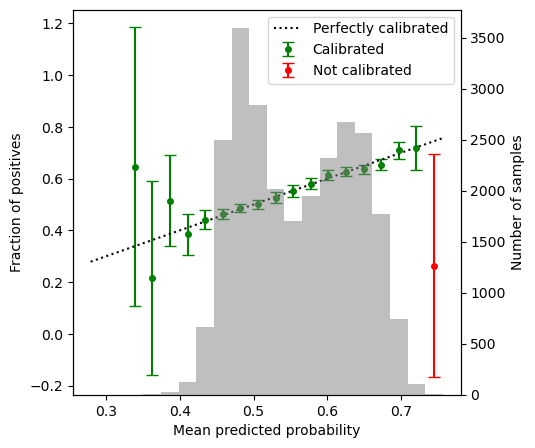

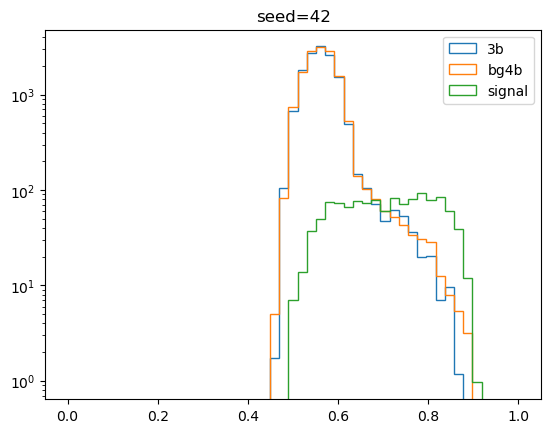

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


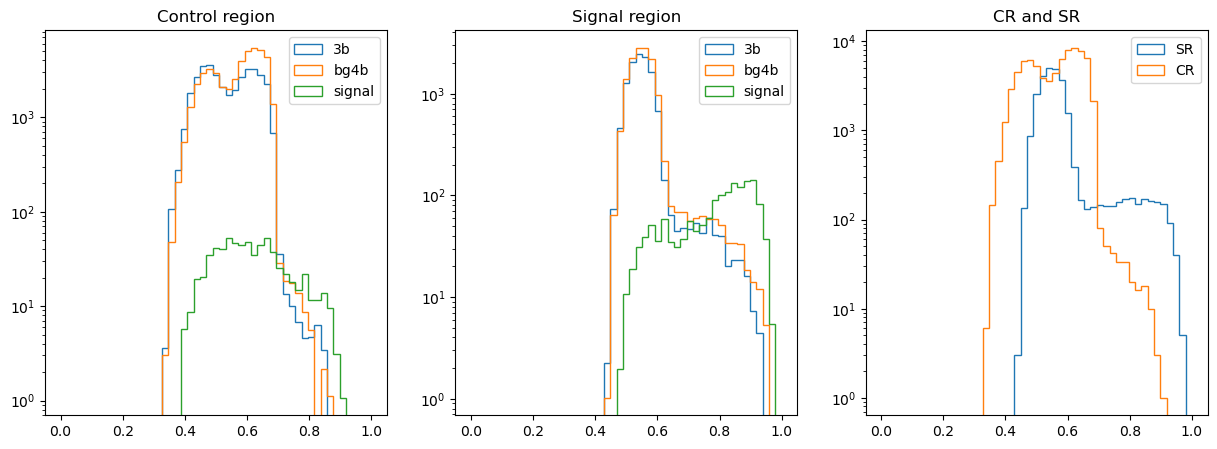

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.81it/s, v_num=12, val_loss=0.676, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.55it/s, v_num=12, val_loss=0.676, train_loss=0.674]


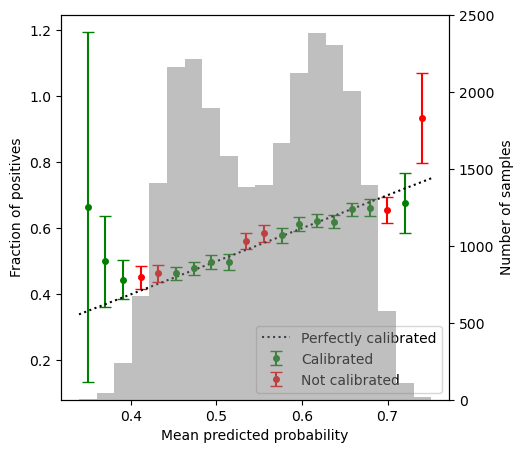

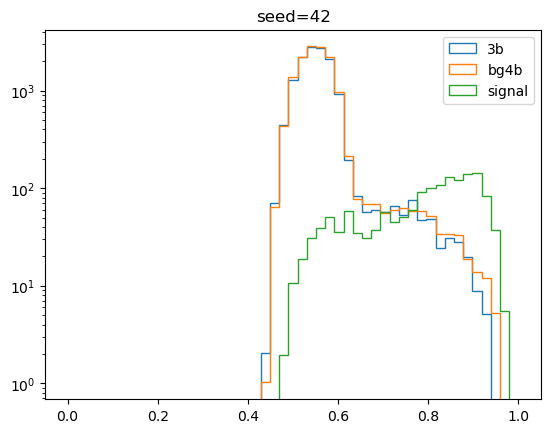

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


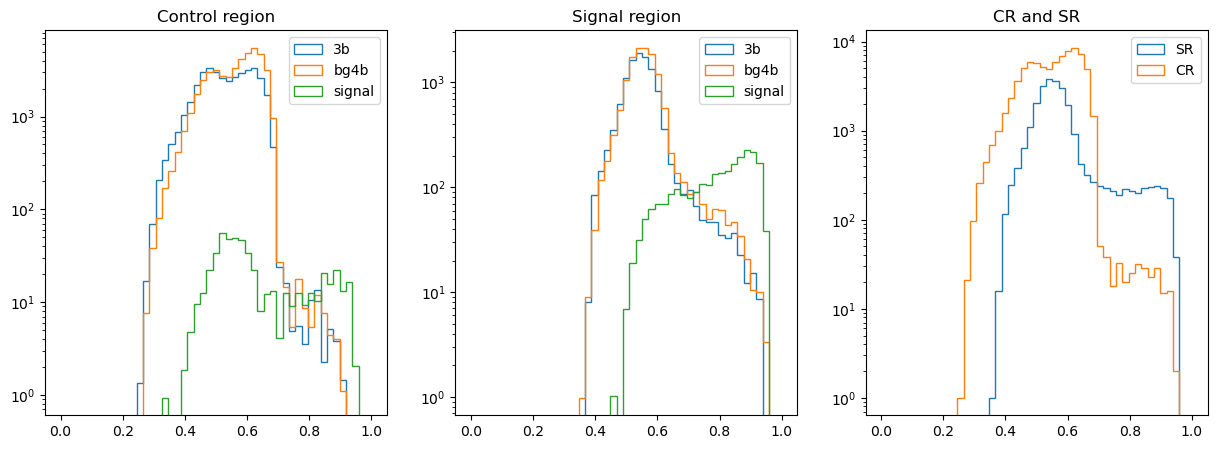

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.86it/s, v_num=13, val_loss=0.677, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.25it/s, v_num=13, val_loss=0.677, train_loss=0.676]


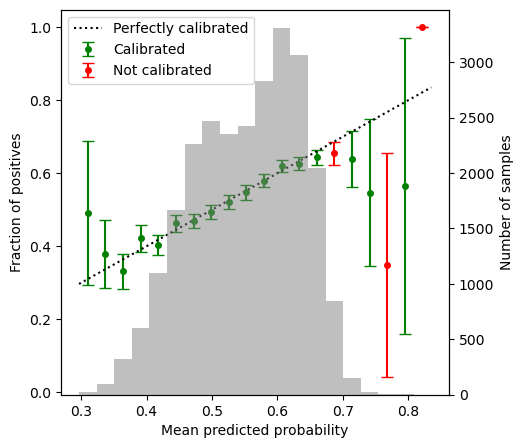

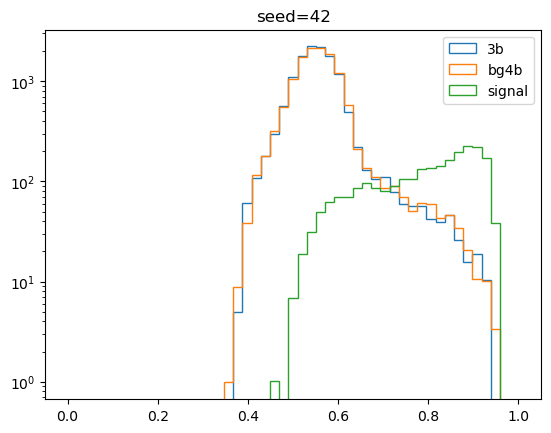

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


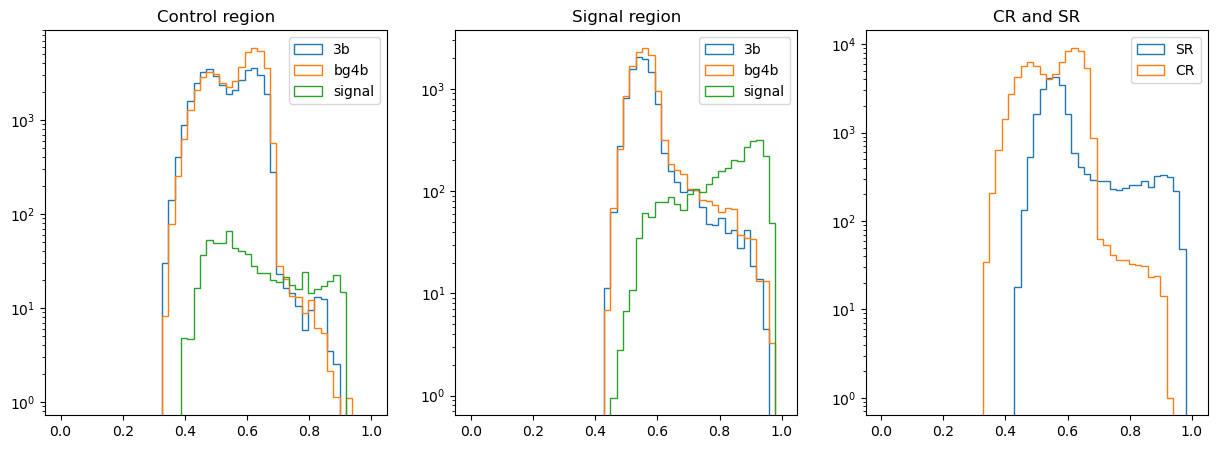

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.88it/s, v_num=14, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.91it/s, v_num=14, val_loss=0.676, train_loss=0.676]


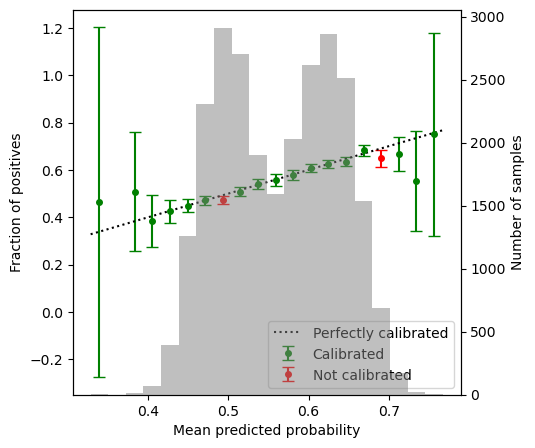

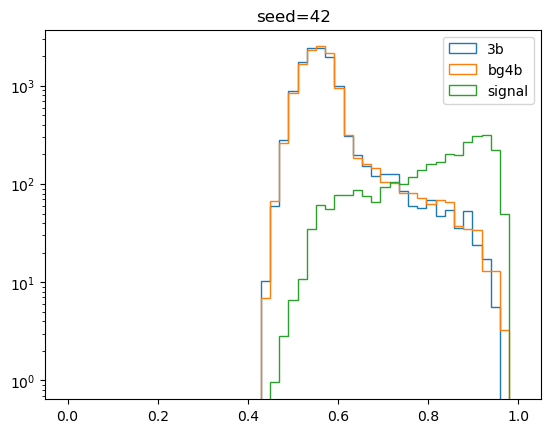

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


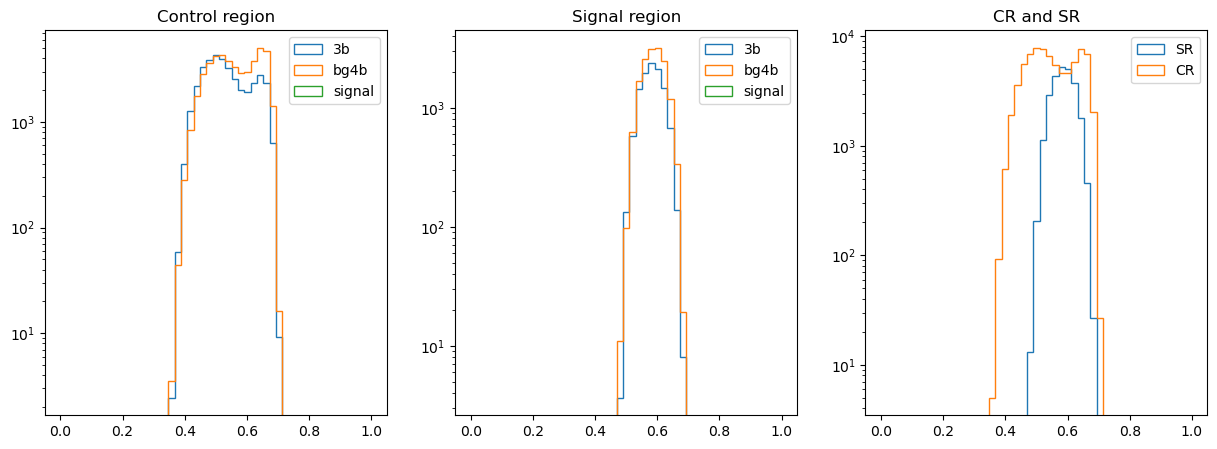

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.14it/s, v_num=7, val_loss=0.676, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.44it/s, v_num=7, val_loss=0.676, train_loss=0.678]


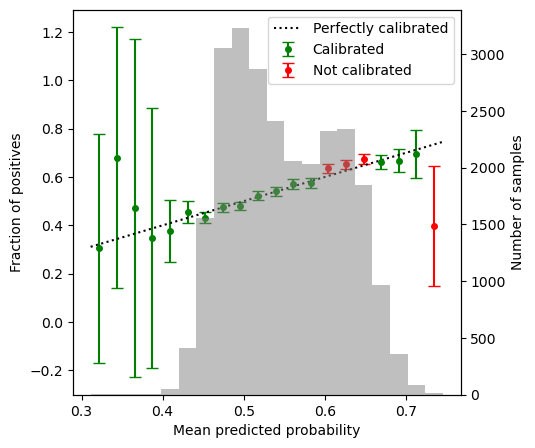

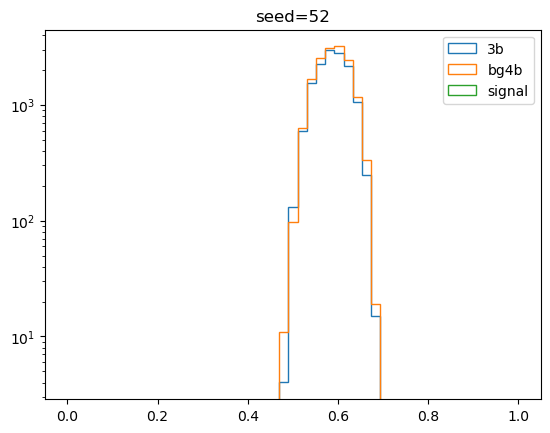

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


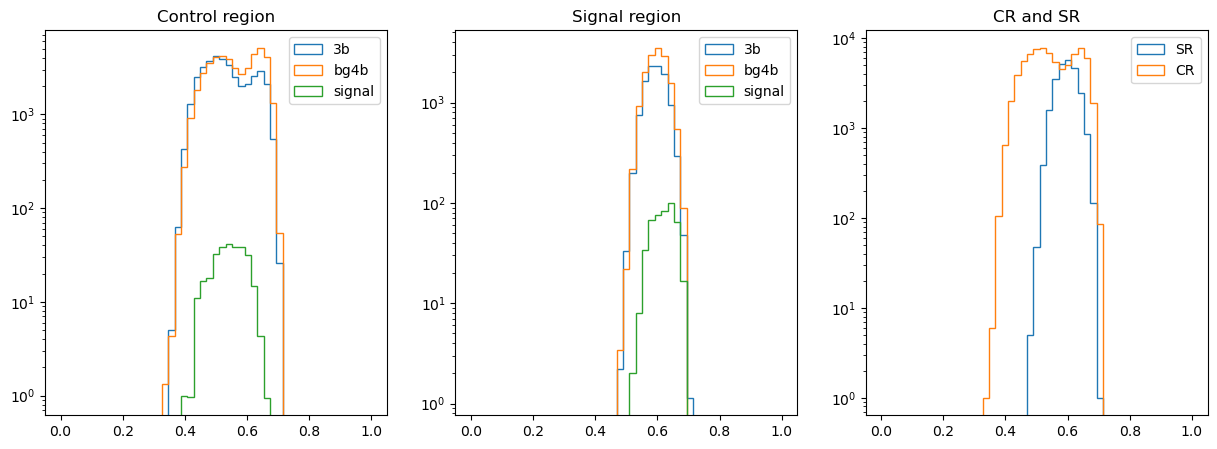

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.35it/s, v_num=8, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.63it/s, v_num=8, val_loss=0.678, train_loss=0.678]


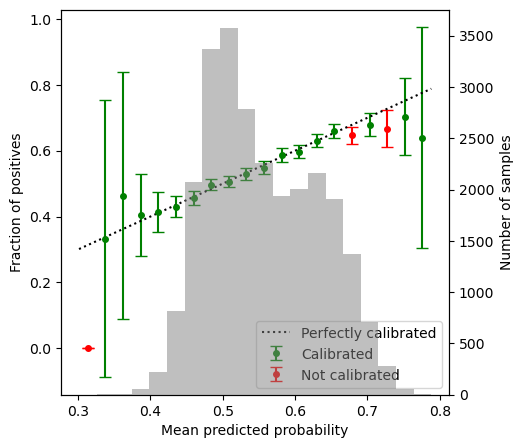

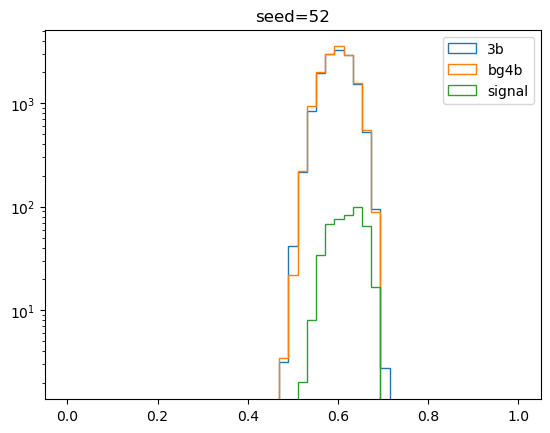

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


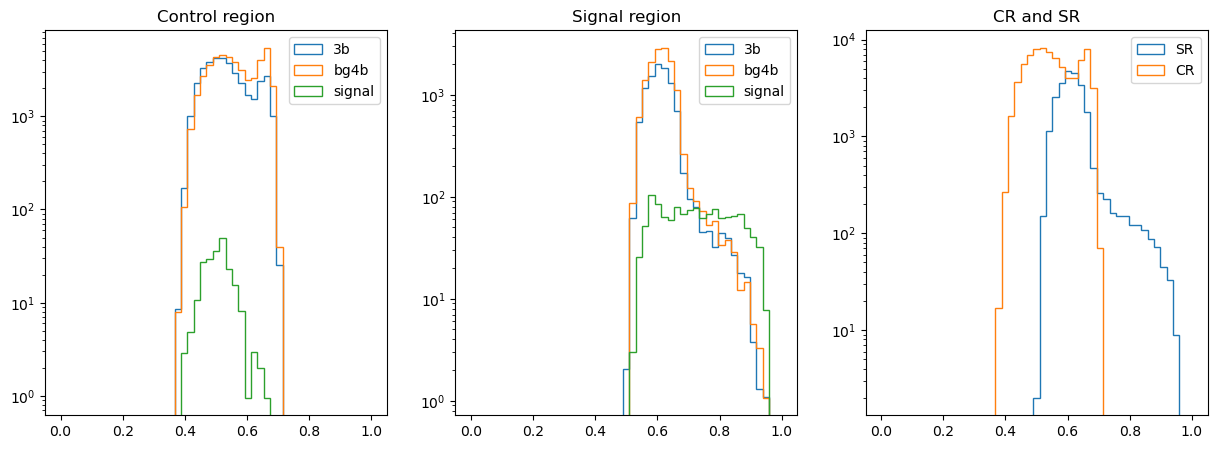

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 15: 100%|██████████| 51/51 [00:02<00:00, 23.80it/s, v_num=9, val_loss=0.679, train_loss=0.678]


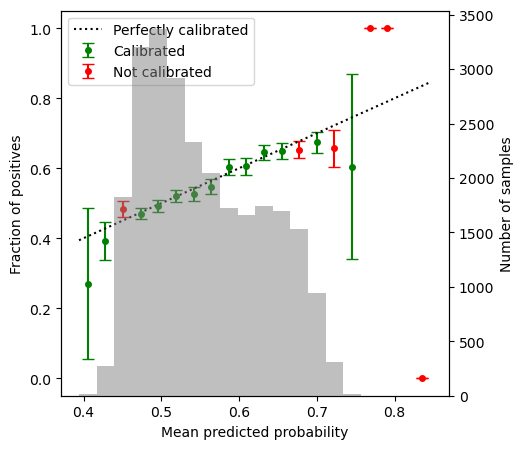

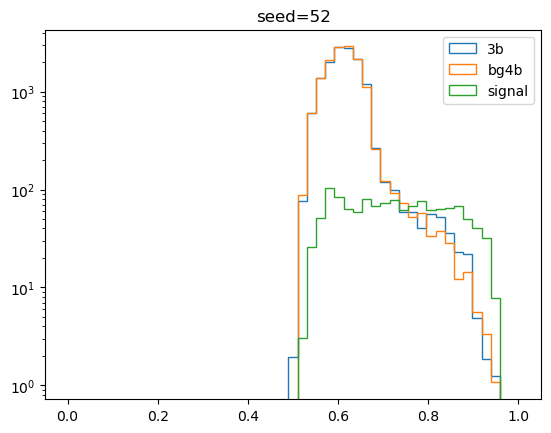

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


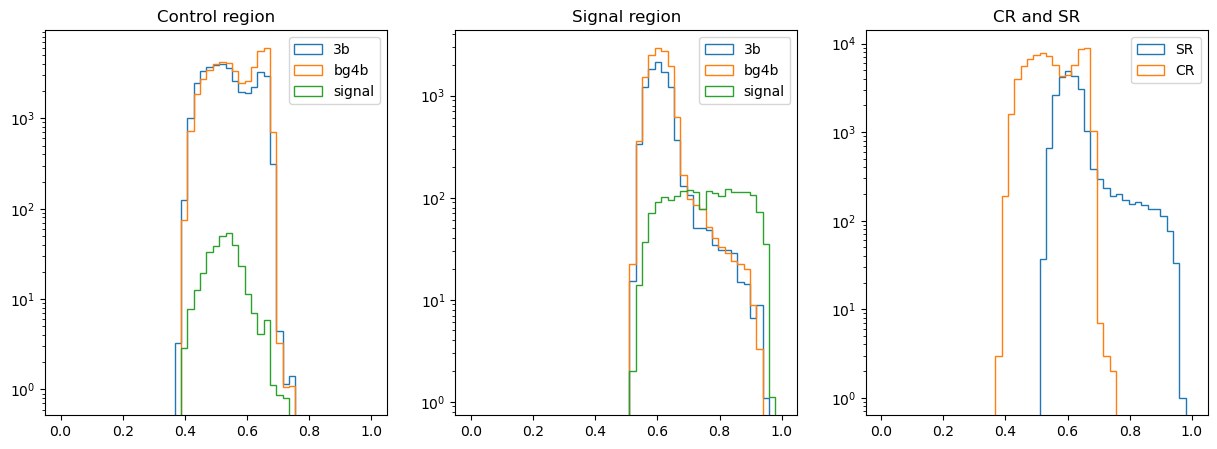

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.32it/s, v_num=10, val_loss=0.680, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.08it/s, v_num=10, val_loss=0.680, train_loss=0.678]


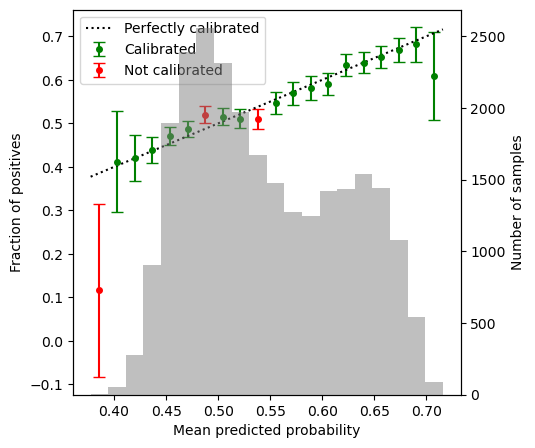

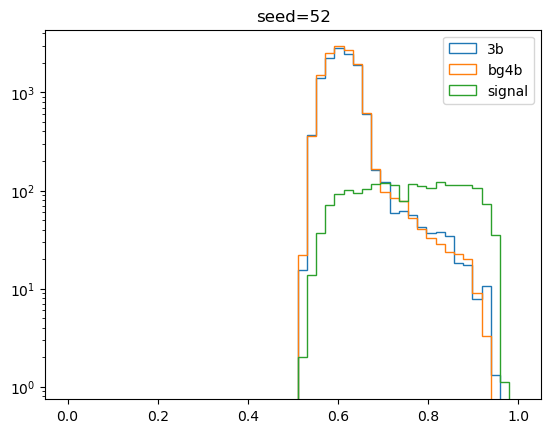

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


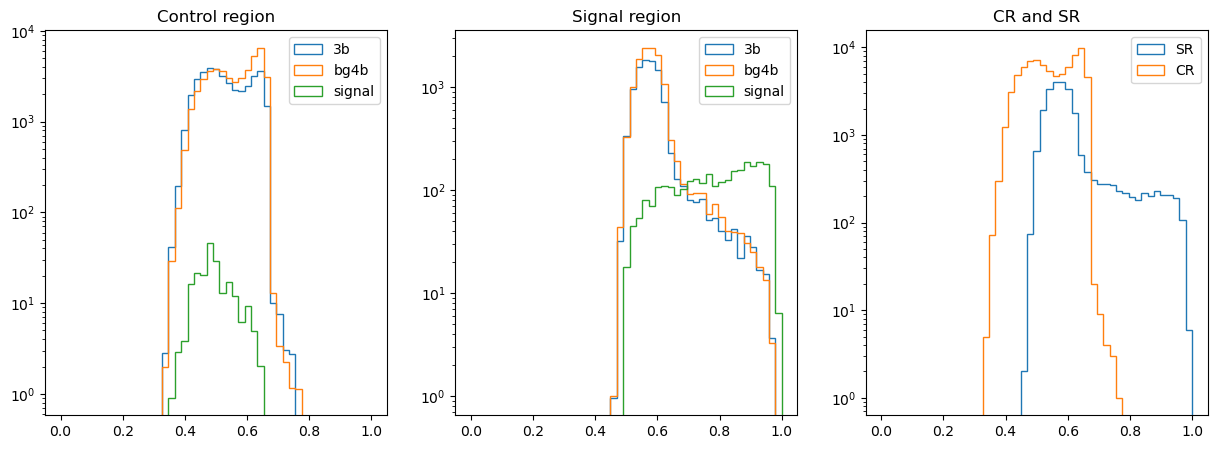

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.62it/s, v_num=11, val_loss=0.676, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.88it/s, v_num=11, val_loss=0.676, train_loss=0.679]


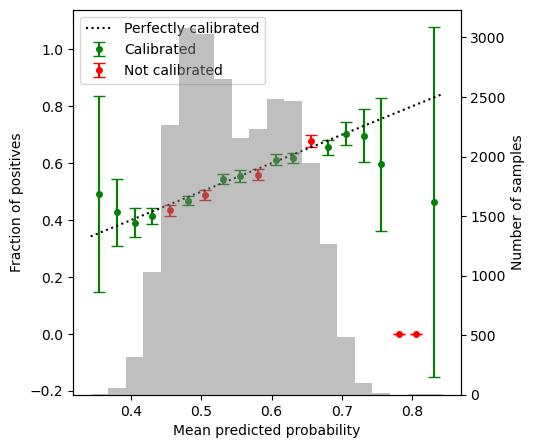

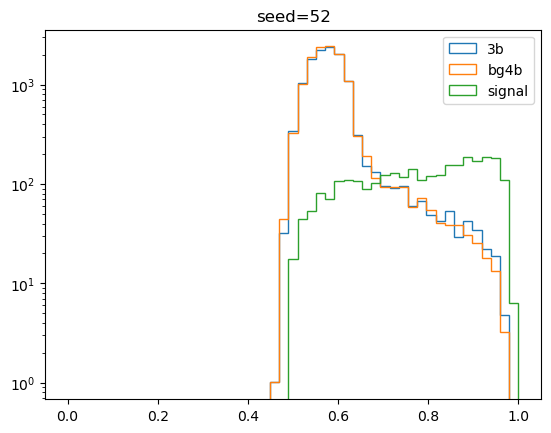

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


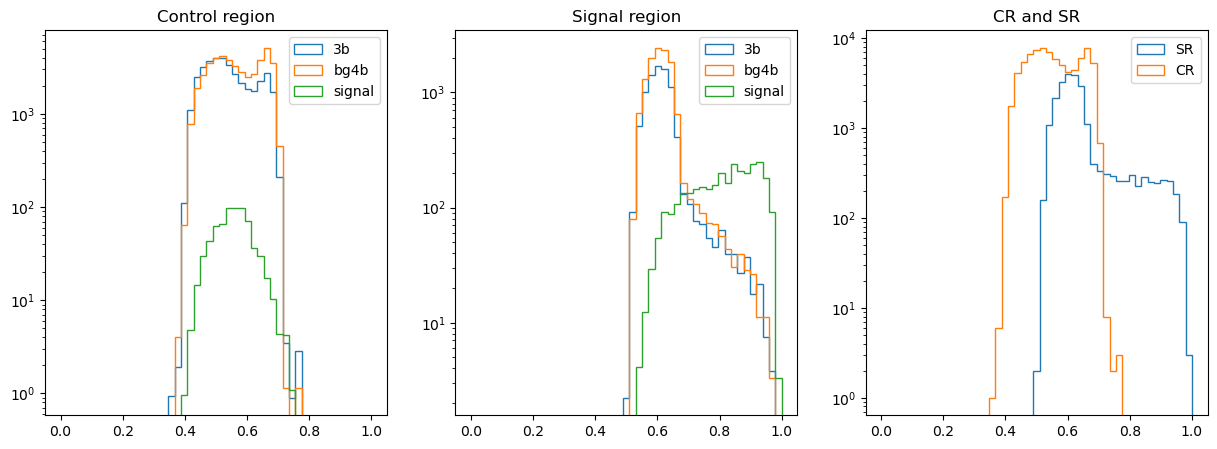

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.93it/s, v_num=12, val_loss=0.677, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.69it/s, v_num=12, val_loss=0.677, train_loss=0.679]


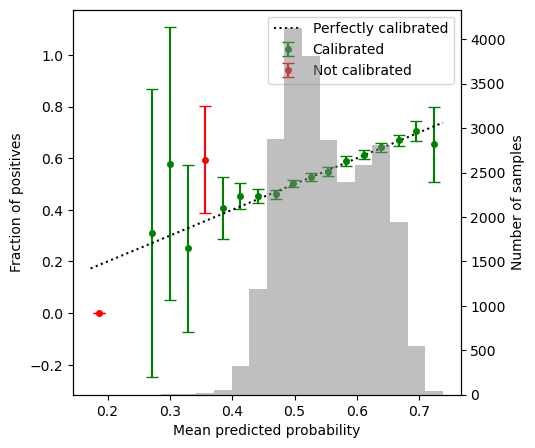

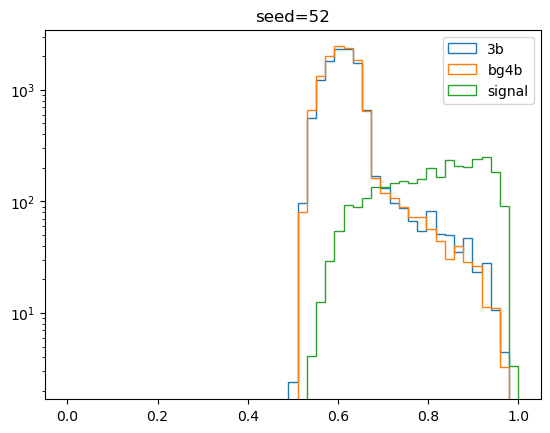

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


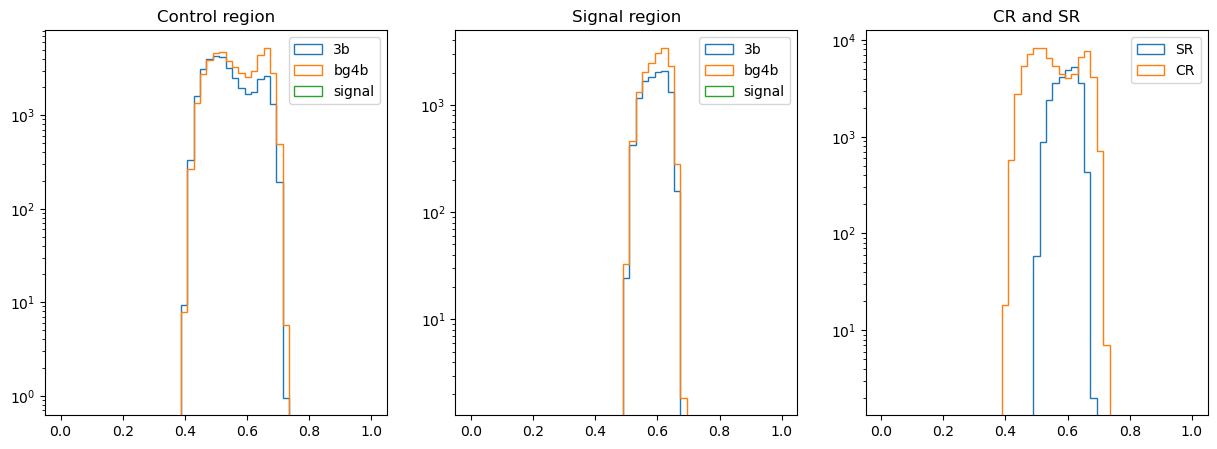

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 17: 100%|██████████| 49/49 [00:02<00:00, 23.80it/s, v_num=7, val_loss=0.676, train_loss=0.676]


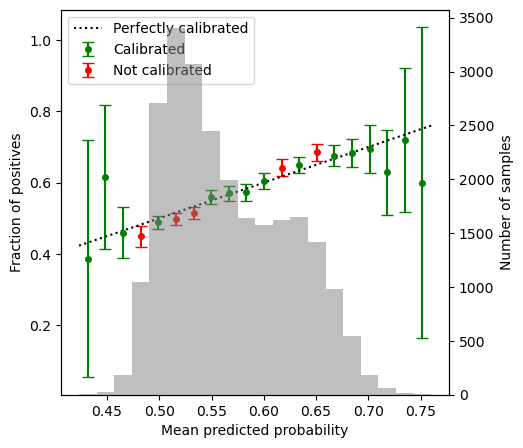

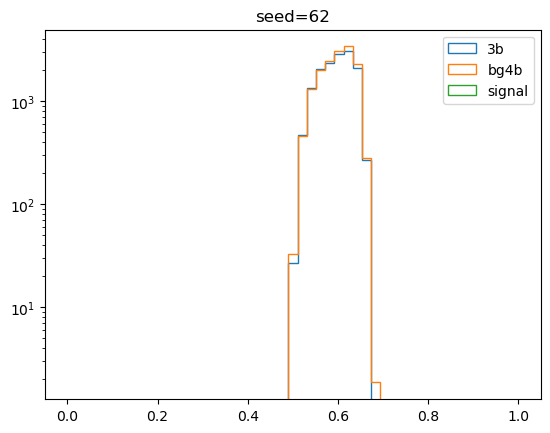

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


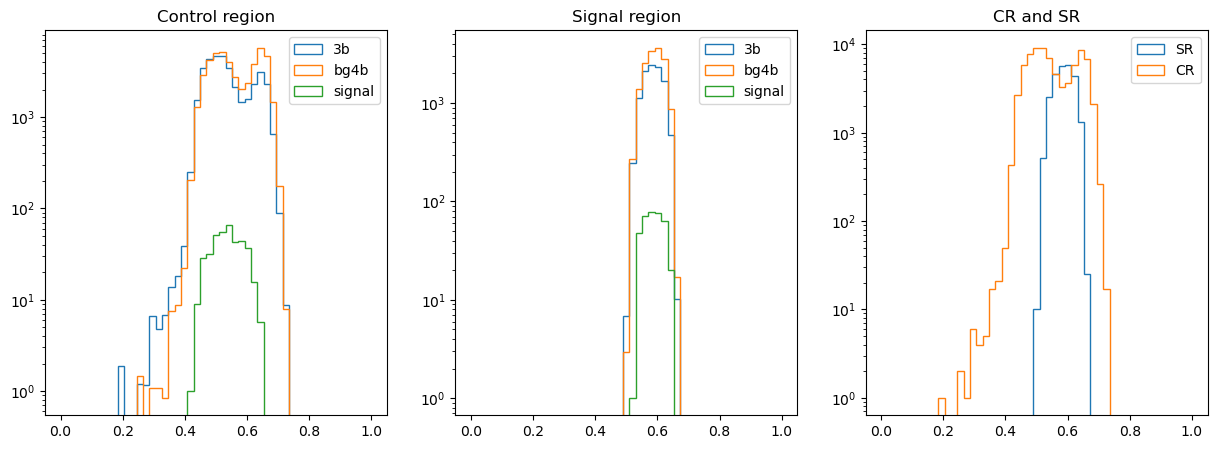

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.61it/s, v_num=8, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.80it/s, v_num=8, val_loss=0.678, train_loss=0.677]


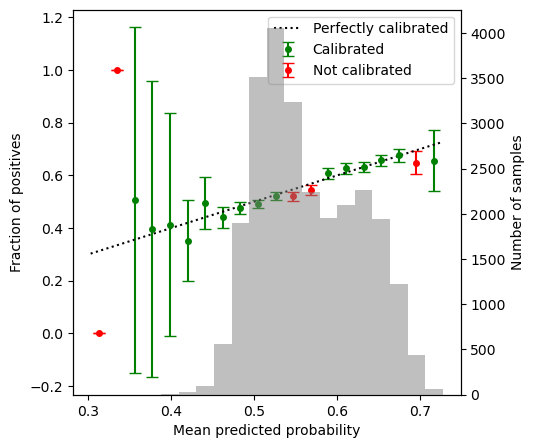

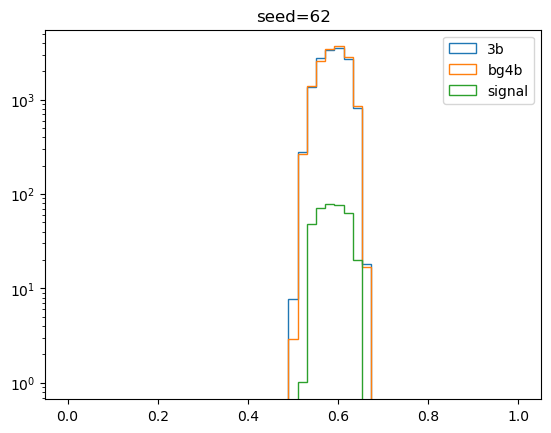

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


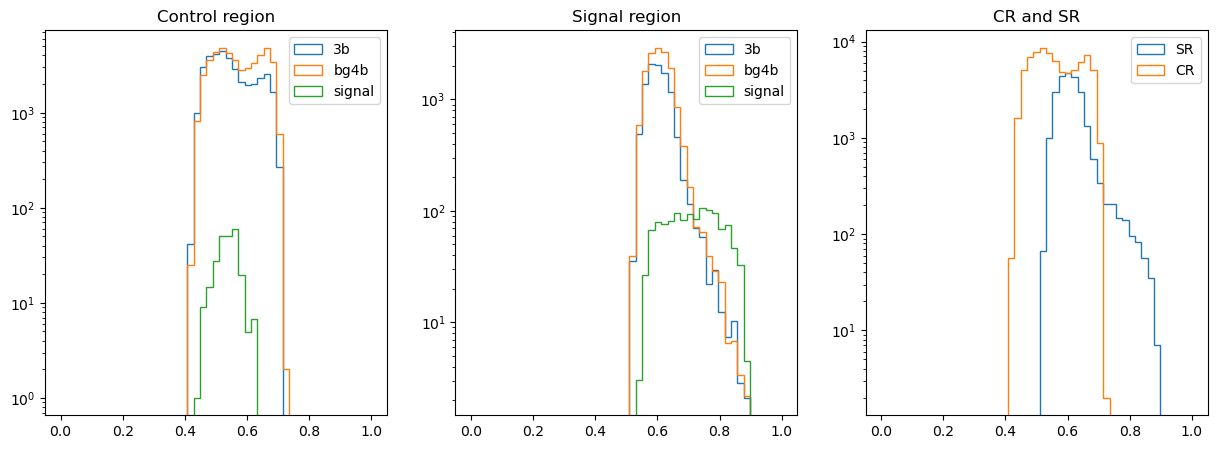

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 50/50 [00:01<00:00, 27.11it/s, v_num=9, val_loss=0.676, train_loss=0.676]


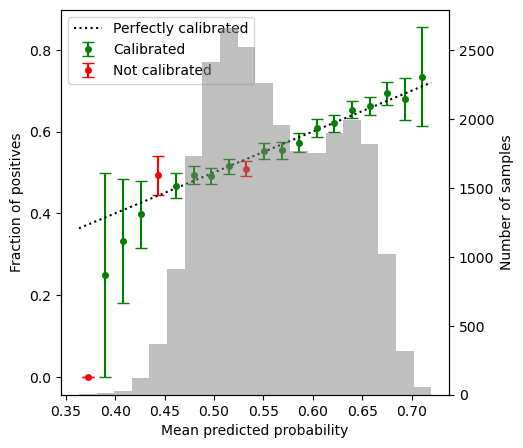

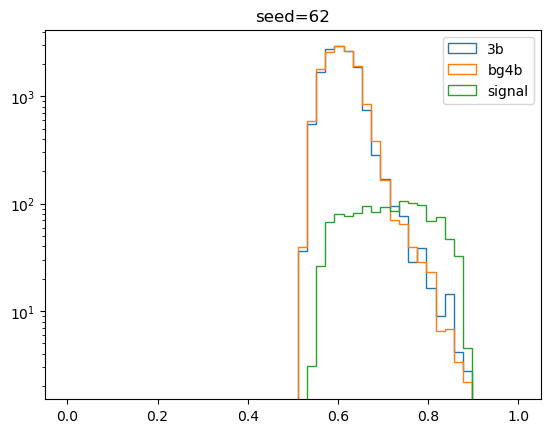

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


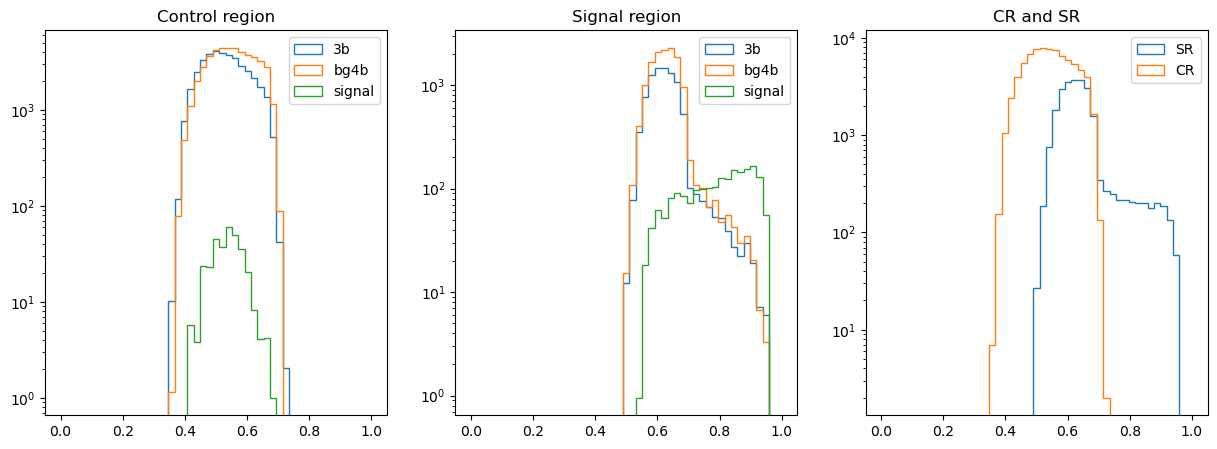

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.52it/s, v_num=10, val_loss=0.680, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.73it/s, v_num=10, val_loss=0.680, train_loss=0.680]


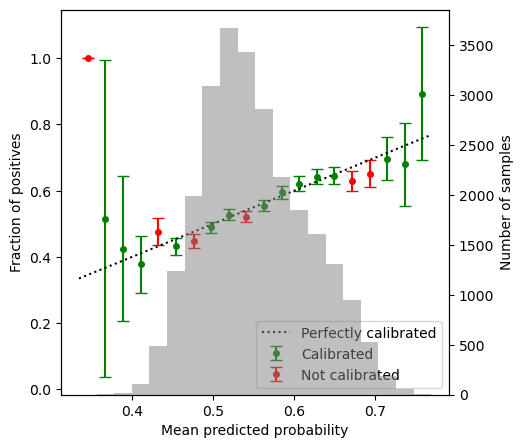

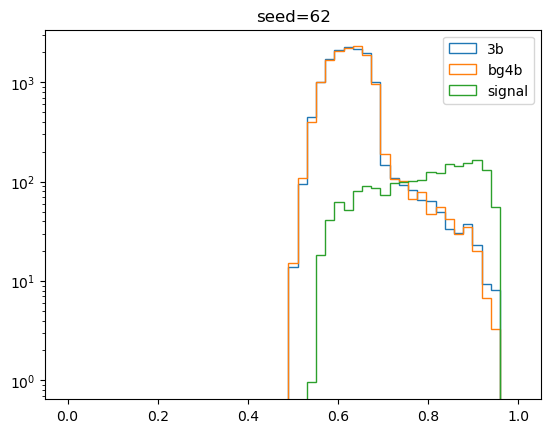

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


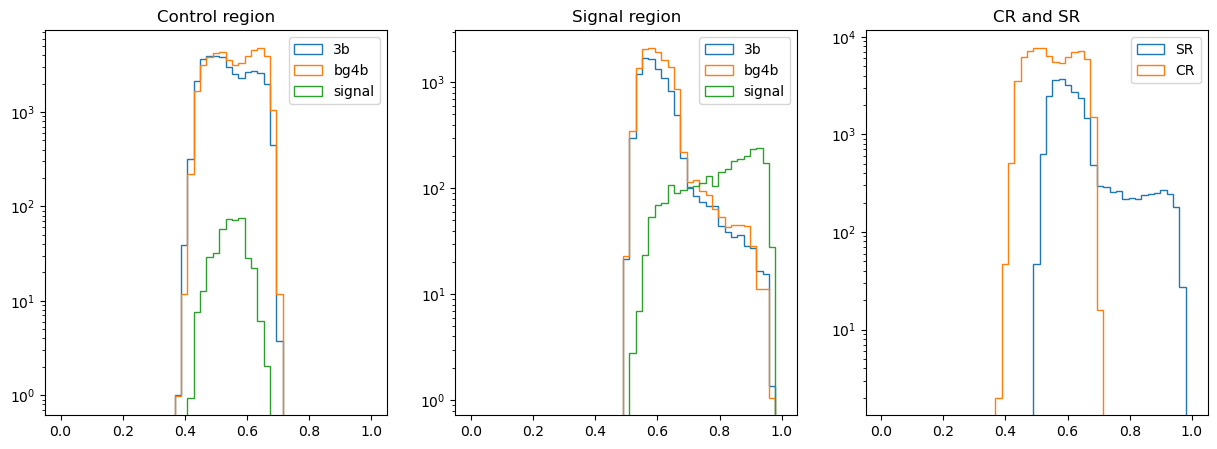

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.86it/s, v_num=11, val_loss=0.680, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.33it/s, v_num=11, val_loss=0.680, train_loss=0.677]


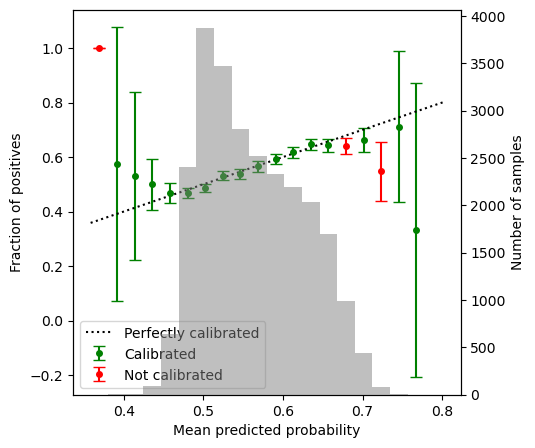

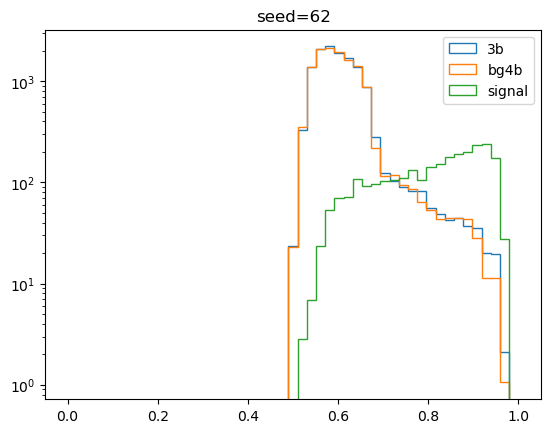

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


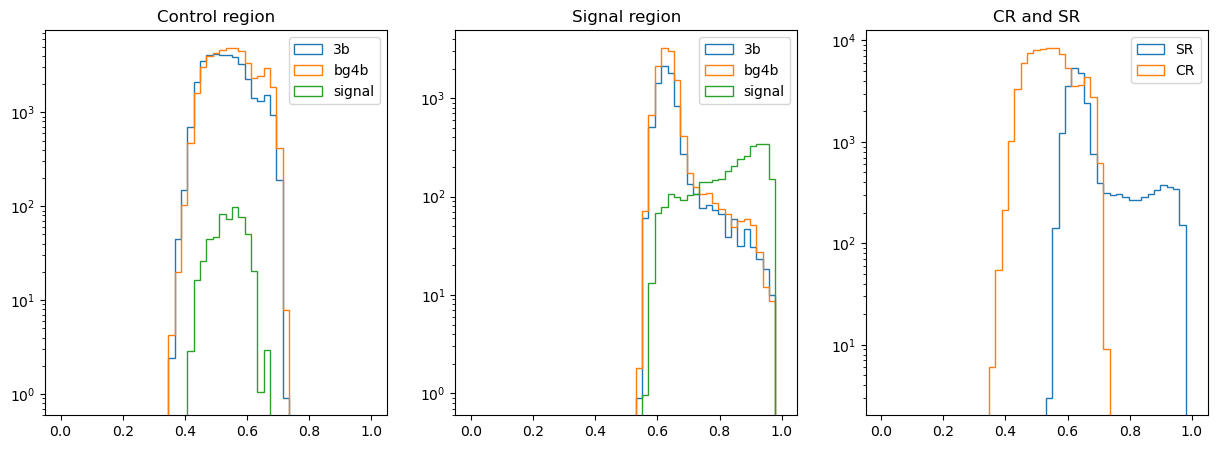

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.23it/s, v_num=12, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.14it/s, v_num=12, val_loss=0.681, train_loss=0.681]


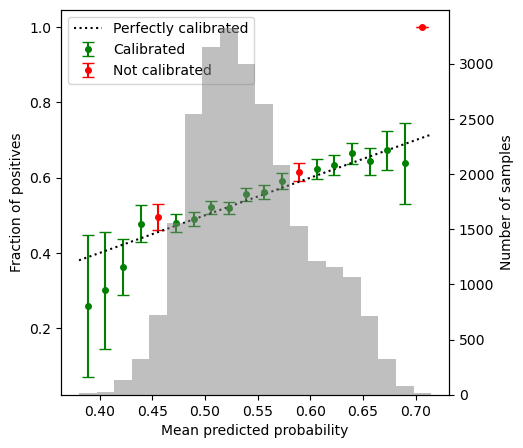

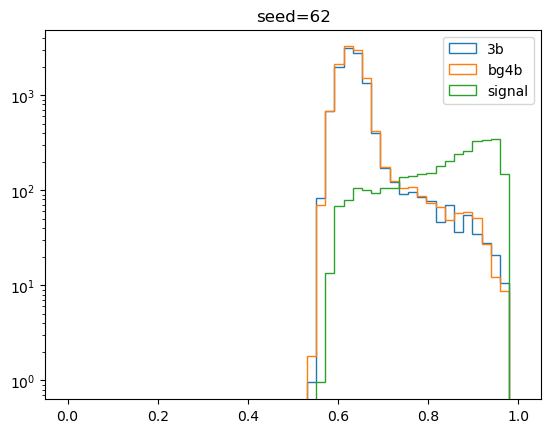

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


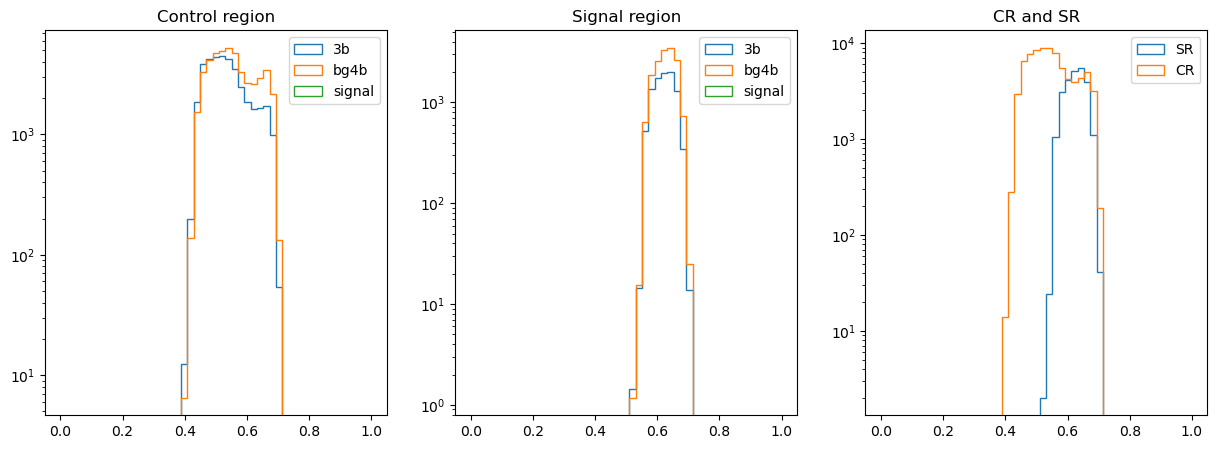

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.12it/s, v_num=10, val_loss=0.682, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.89it/s, v_num=10, val_loss=0.682, train_loss=0.679]


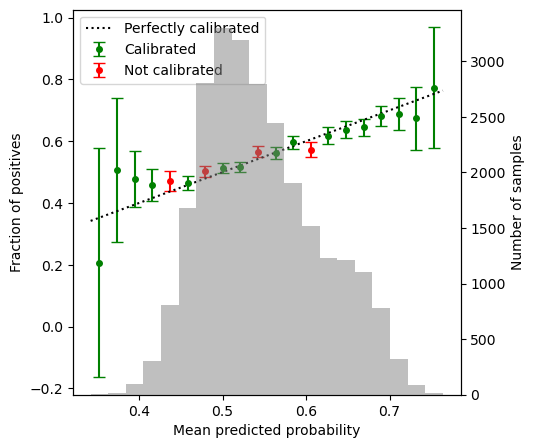

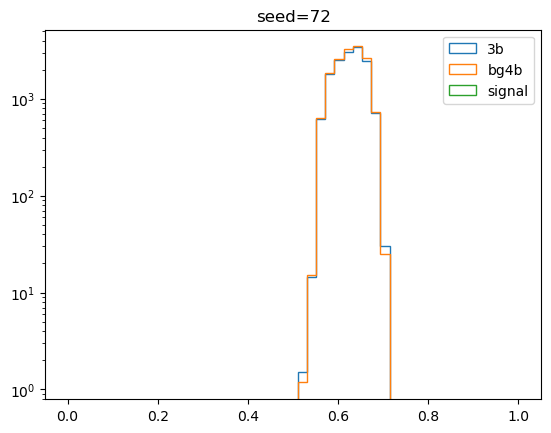

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


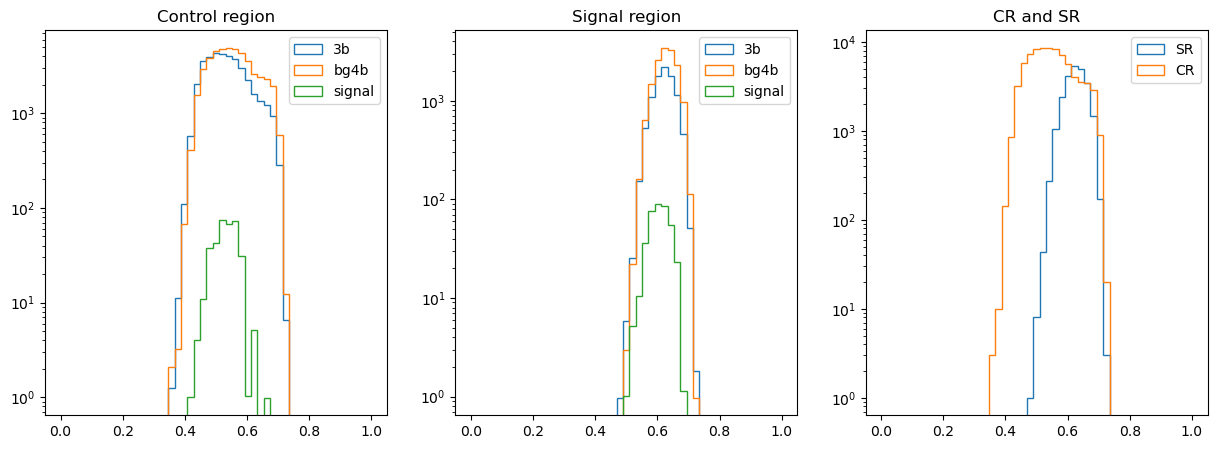

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.98it/s, v_num=11, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 24.45it/s, v_num=11, val_loss=0.681, train_loss=0.681]


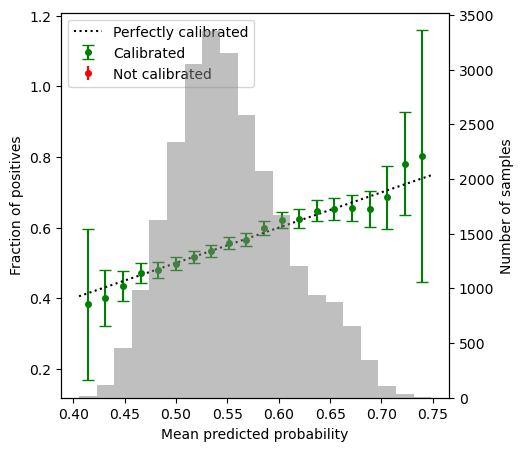

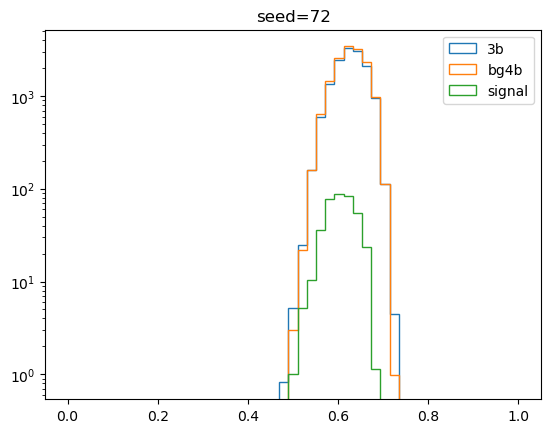

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


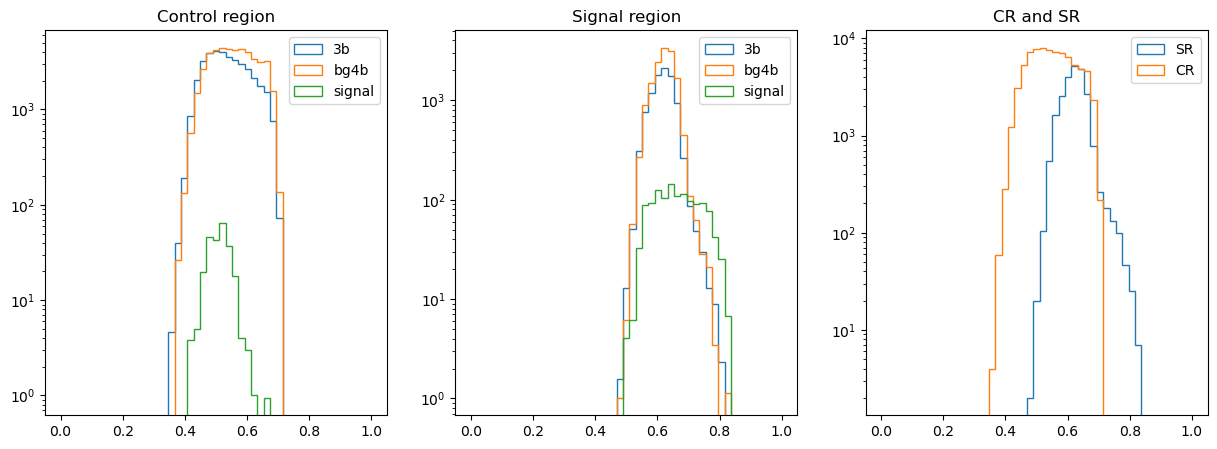

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.91it/s, v_num=12, val_loss=0.681, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.27it/s, v_num=12, val_loss=0.681, train_loss=0.678]


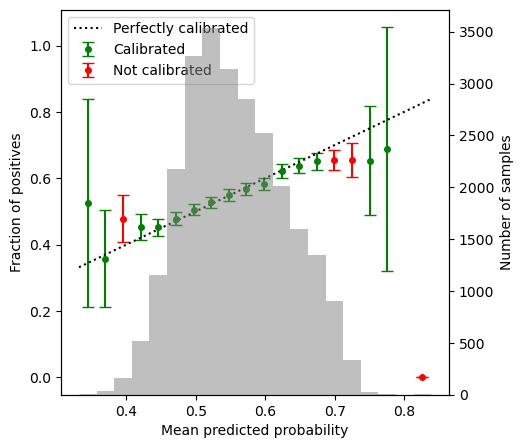

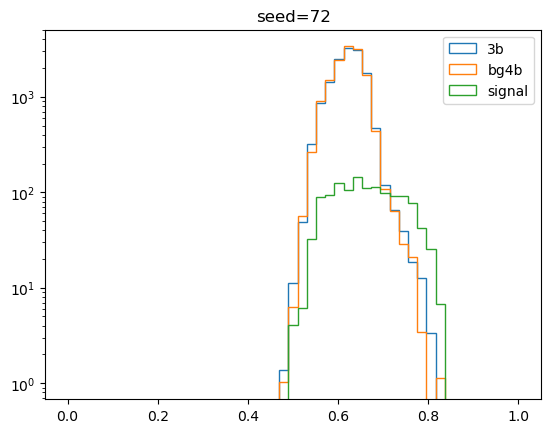

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


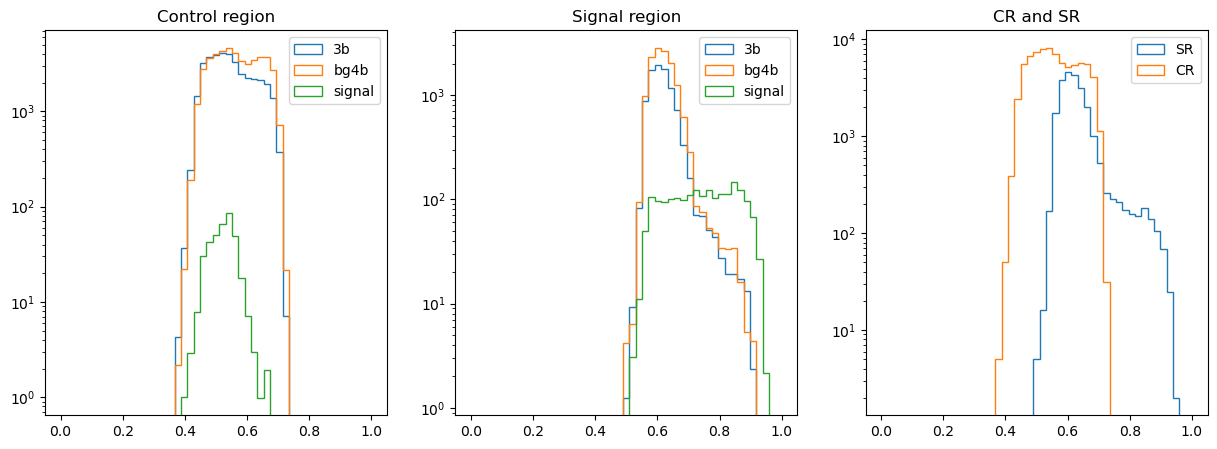

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 16: 100%|██████████| 51/51 [00:02<00:00, 24.58it/s, v_num=13, val_loss=0.679, train_loss=0.679]


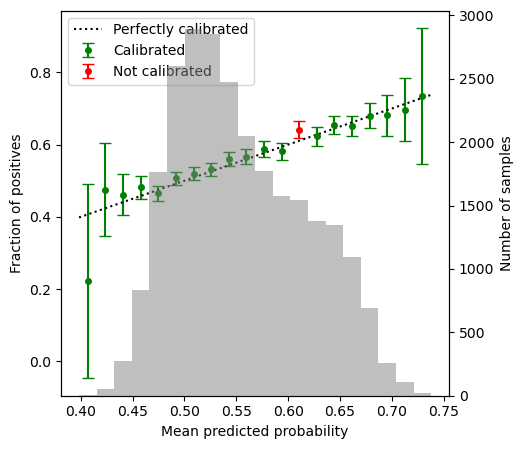

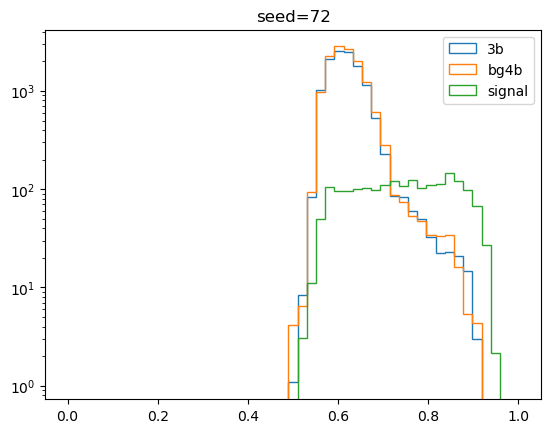

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


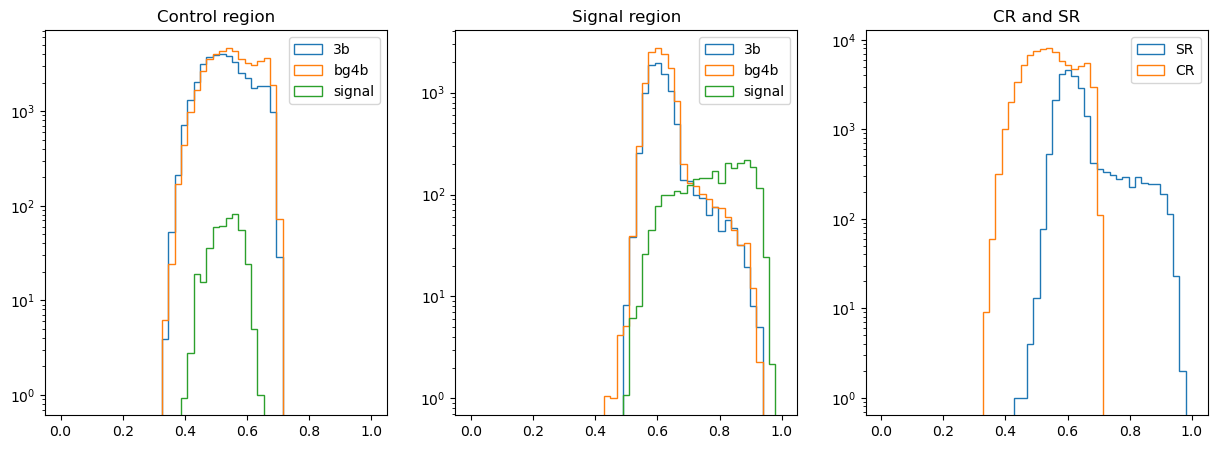

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 15: 100%|██████████| 51/51 [00:01<00:00, 27.27it/s, v_num=14, val_loss=0.678, train_loss=0.679]


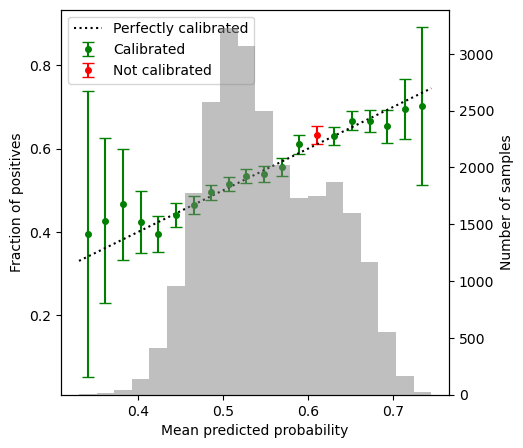

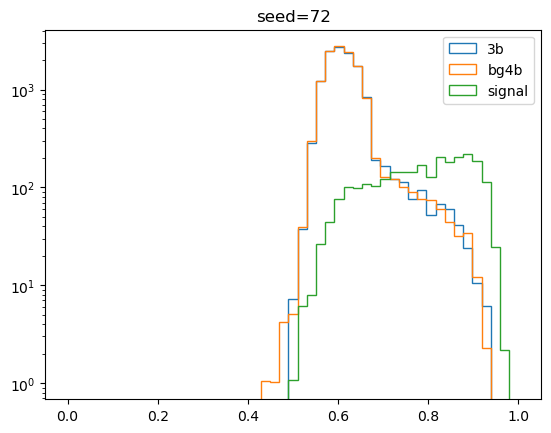

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


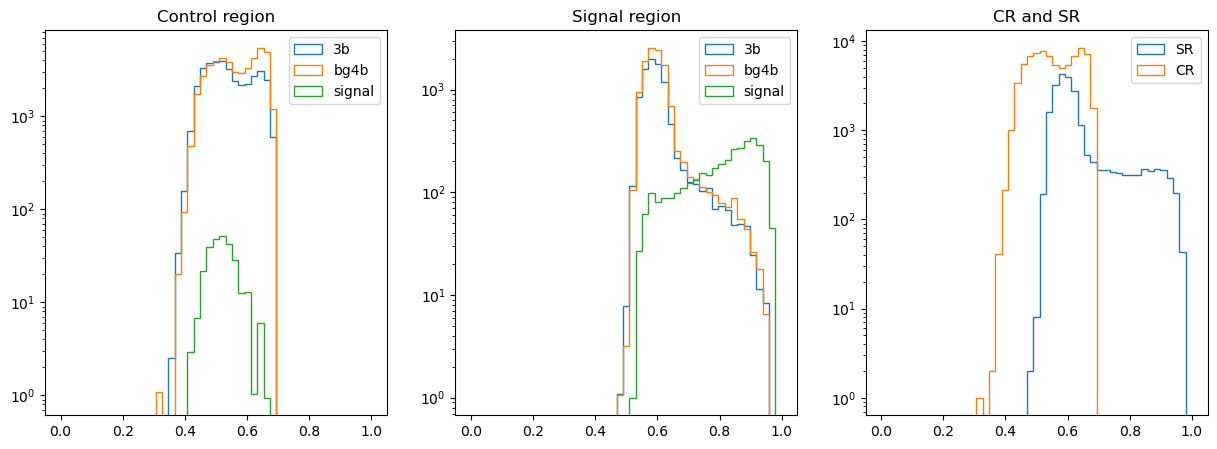

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 24.71it/s, v_num=15, val_loss=0.680, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 24.24it/s, v_num=15, val_loss=0.680, train_loss=0.677]


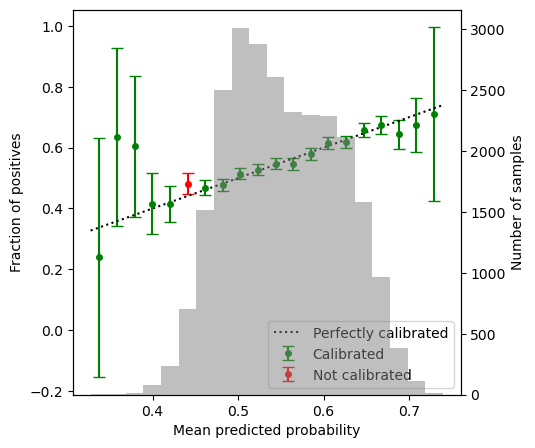

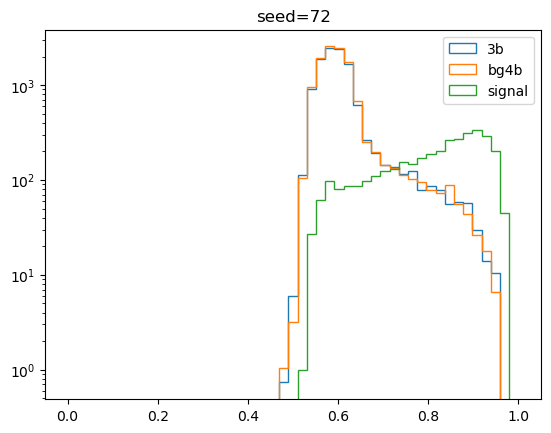

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


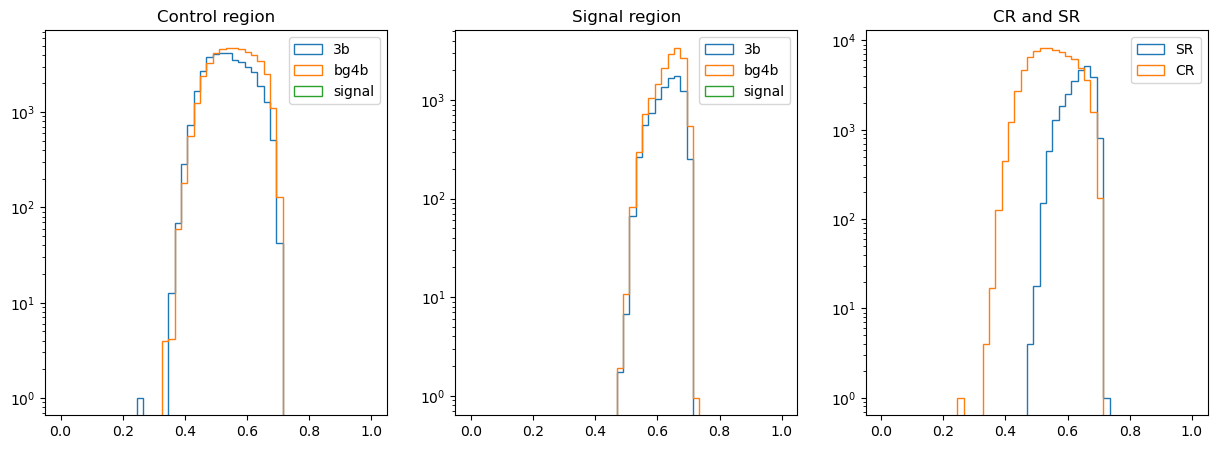

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.38it/s, v_num=9, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 24.85it/s, v_num=9, val_loss=0.681, train_loss=0.681]


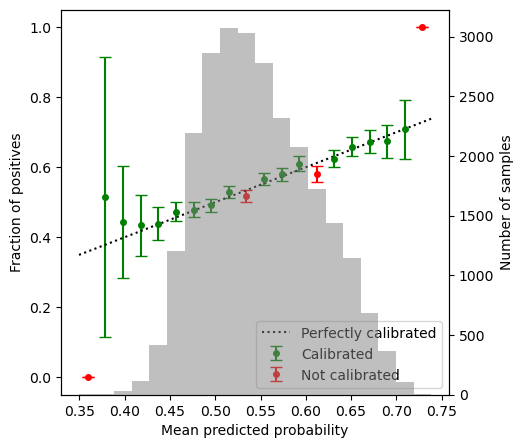

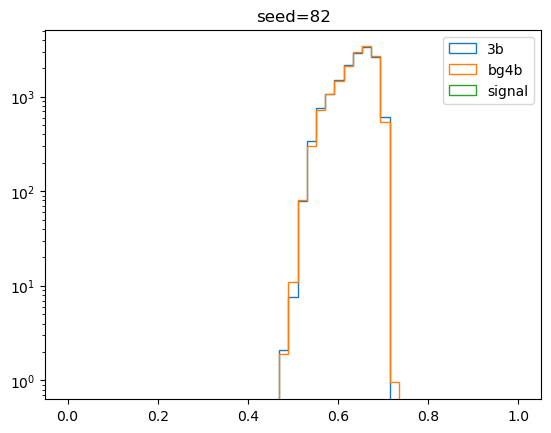

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


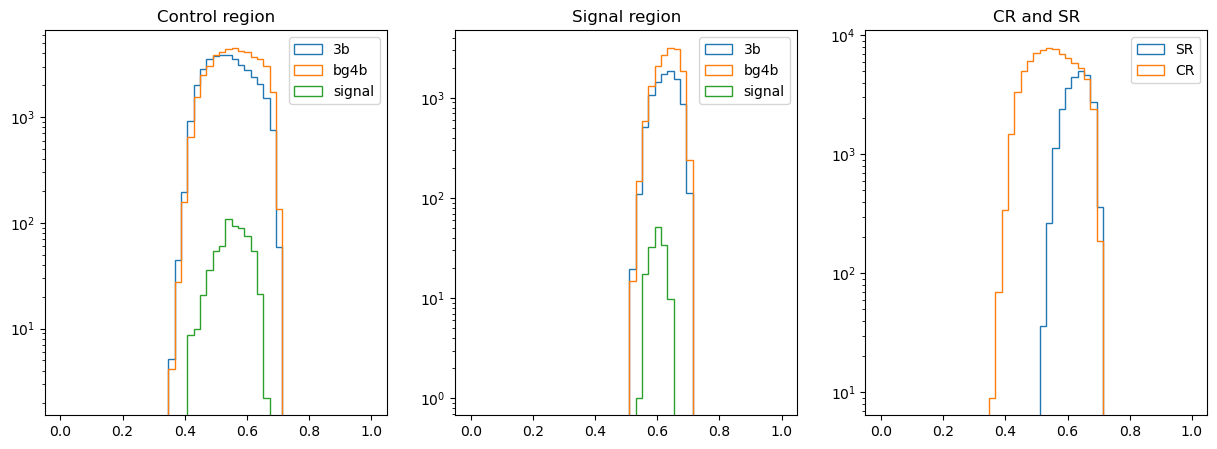

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 24.46it/s, v_num=10, val_loss=0.681, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 23.82it/s, v_num=10, val_loss=0.681, train_loss=0.679]


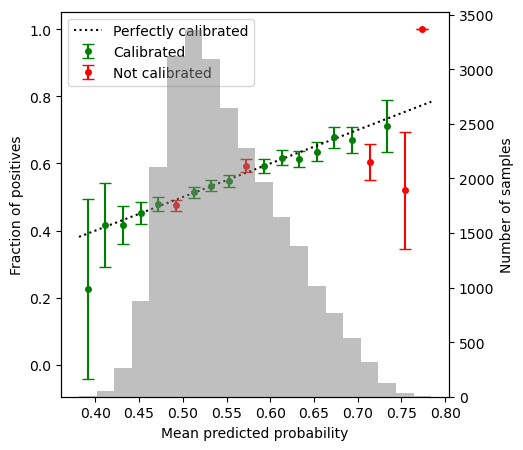

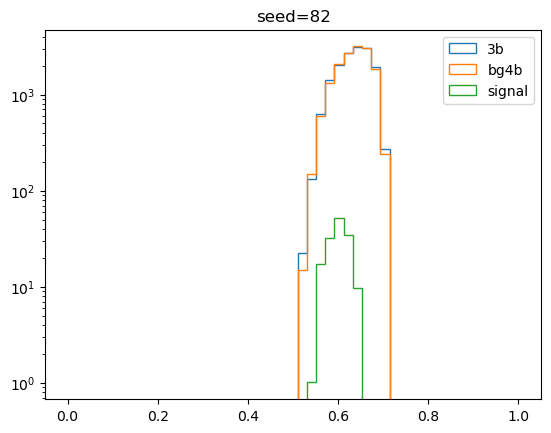

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


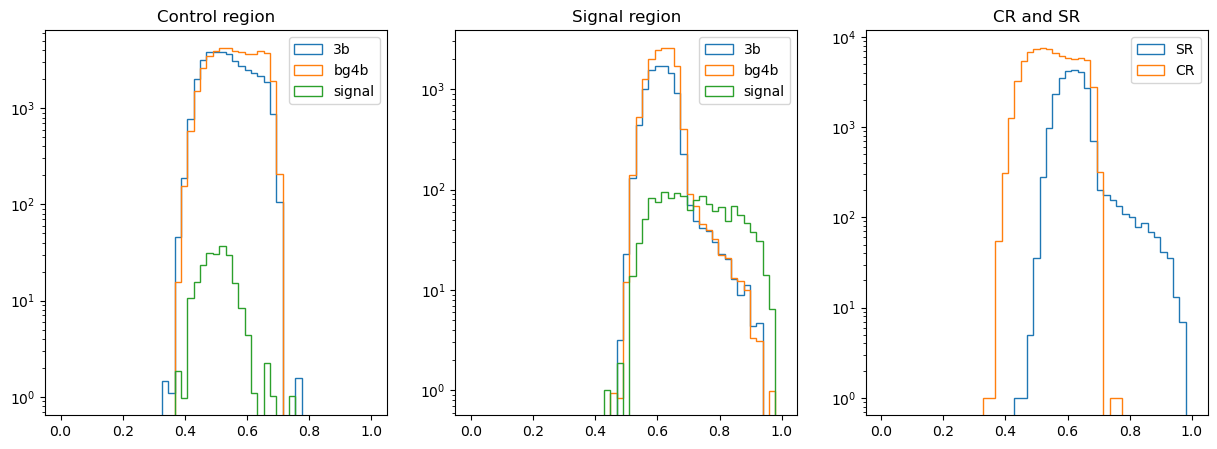

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.61it/s, v_num=11, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.81it/s, v_num=11, val_loss=0.679, train_loss=0.678]


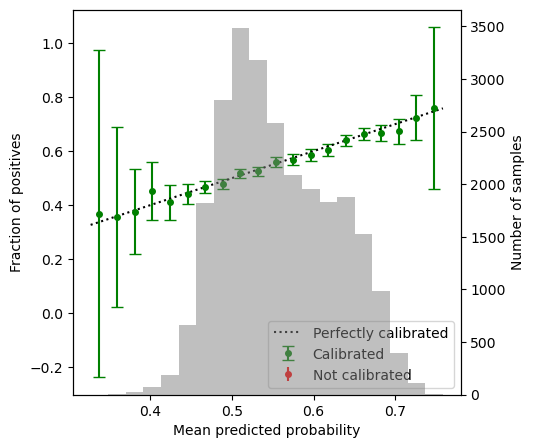

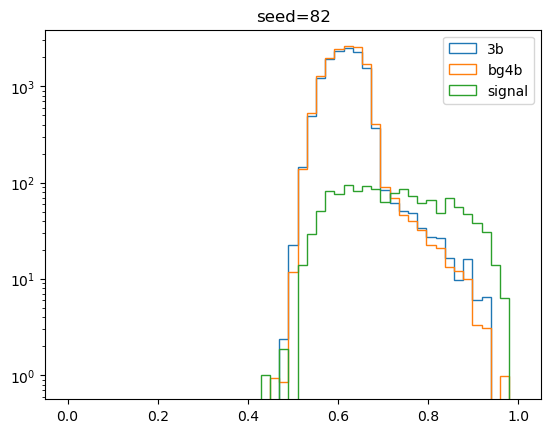

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


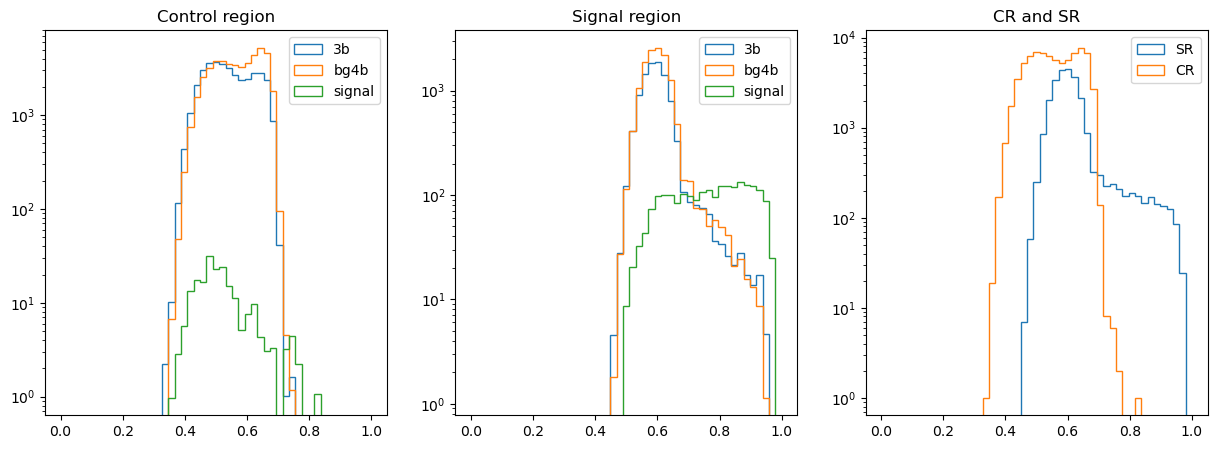

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 19.44it/s, v_num=12, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 18.60it/s, v_num=12, val_loss=0.678, train_loss=0.677]


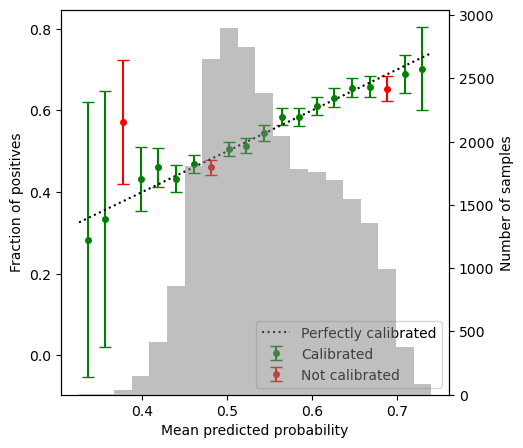

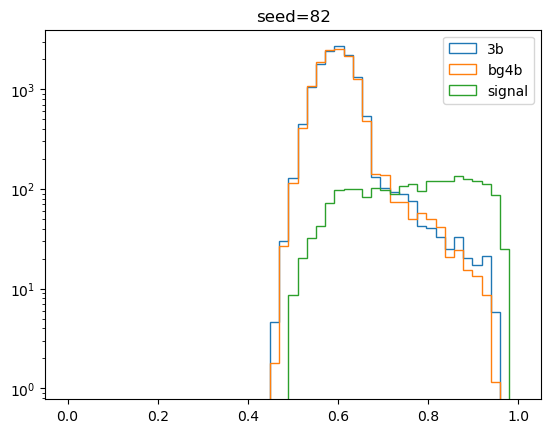

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


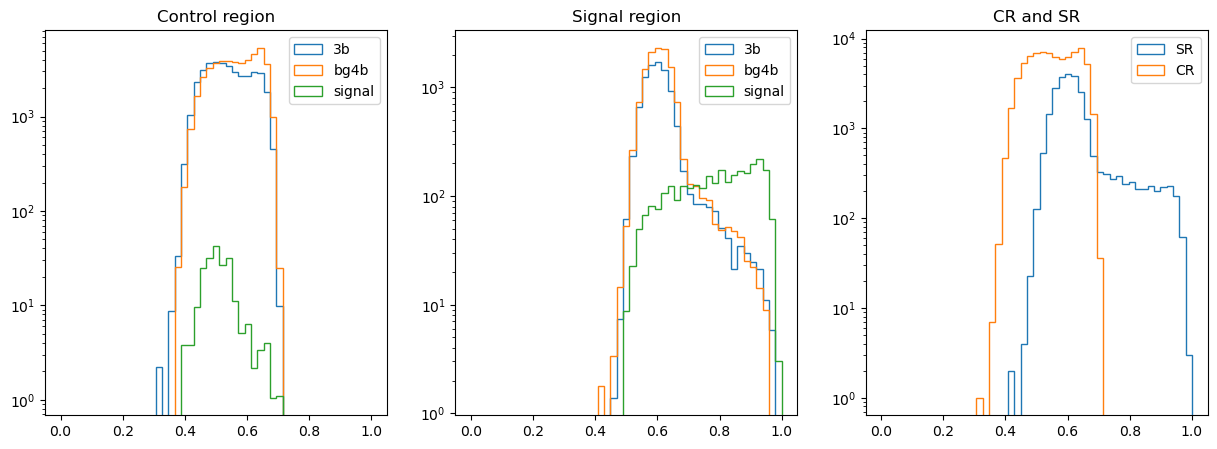

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 23.56it/s, v_num=13, val_loss=0.680, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 21.95it/s, v_num=13, val_loss=0.680, train_loss=0.679]


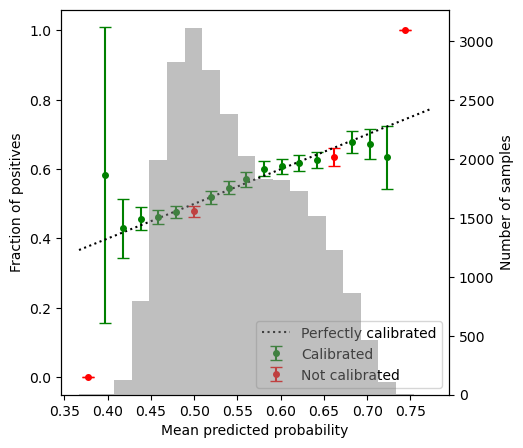

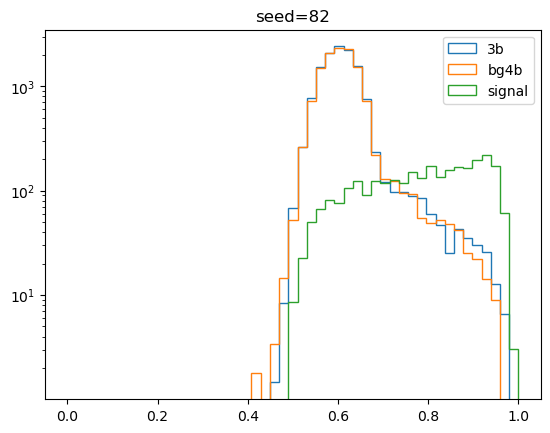

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


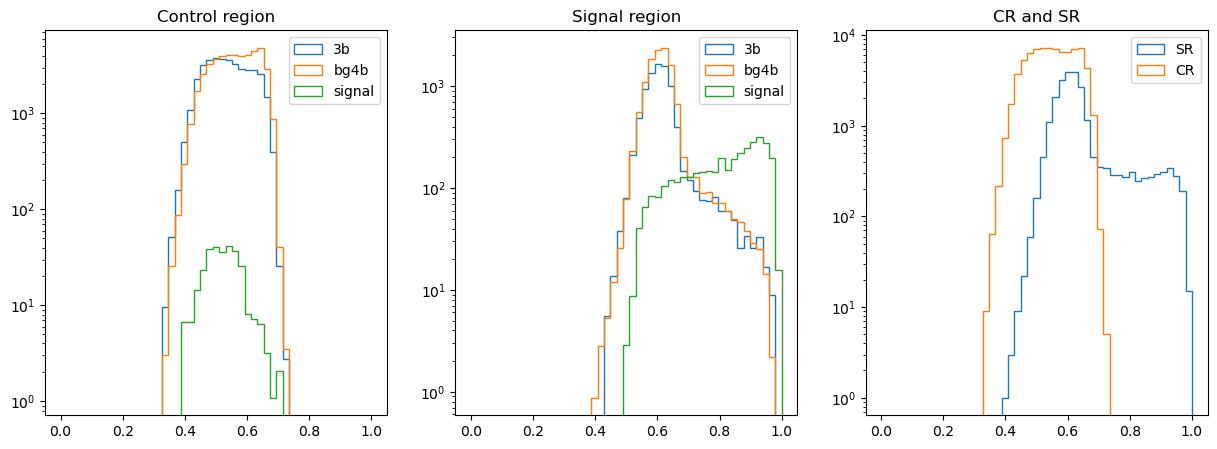

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.24it/s, v_num=14, val_loss=0.682, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.08it/s, v_num=14, val_loss=0.682, train_loss=0.678]


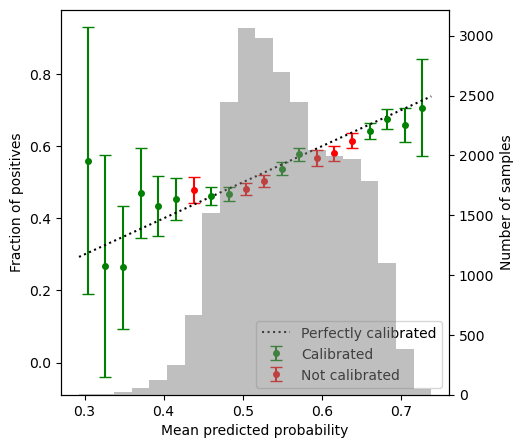

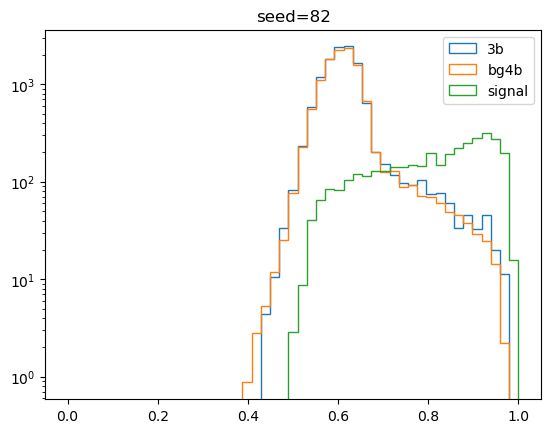

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


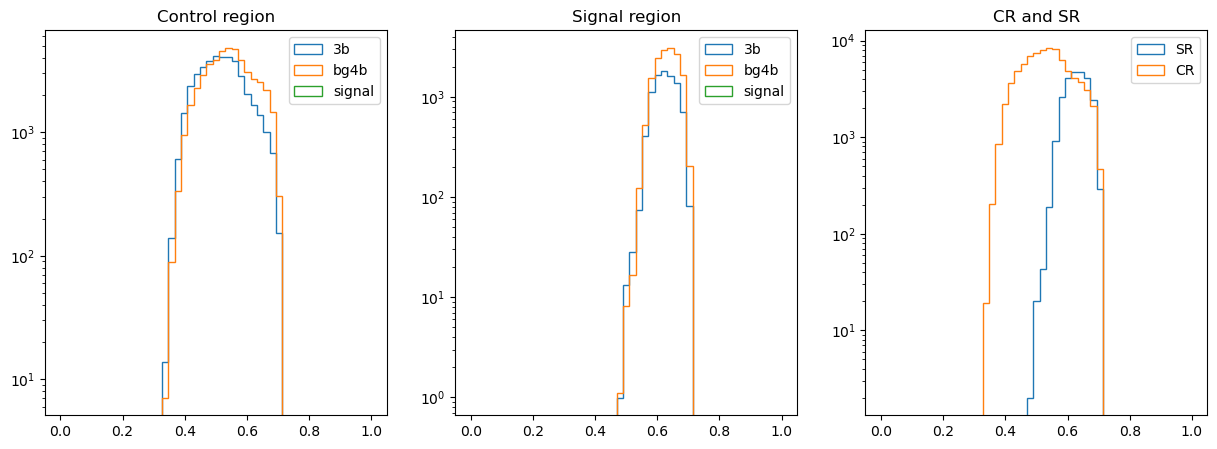

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 52/52 [00:01<00:00, 28.74it/s, v_num=9, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 52/52 [00:01<00:00, 27.06it/s, v_num=9, val_loss=0.681, train_loss=0.681]


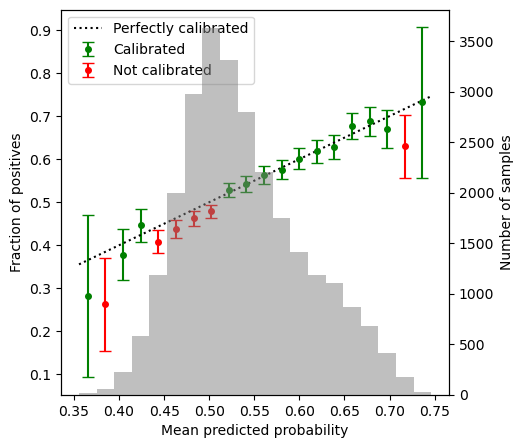

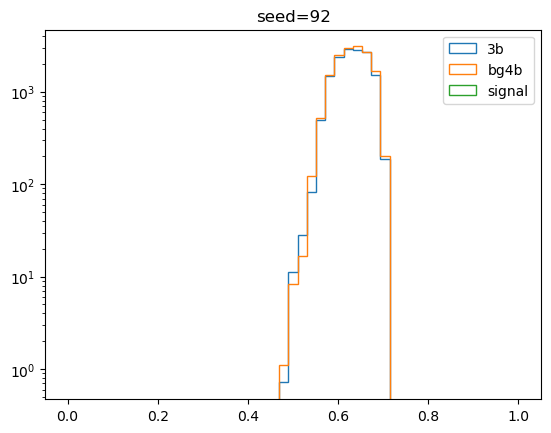

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


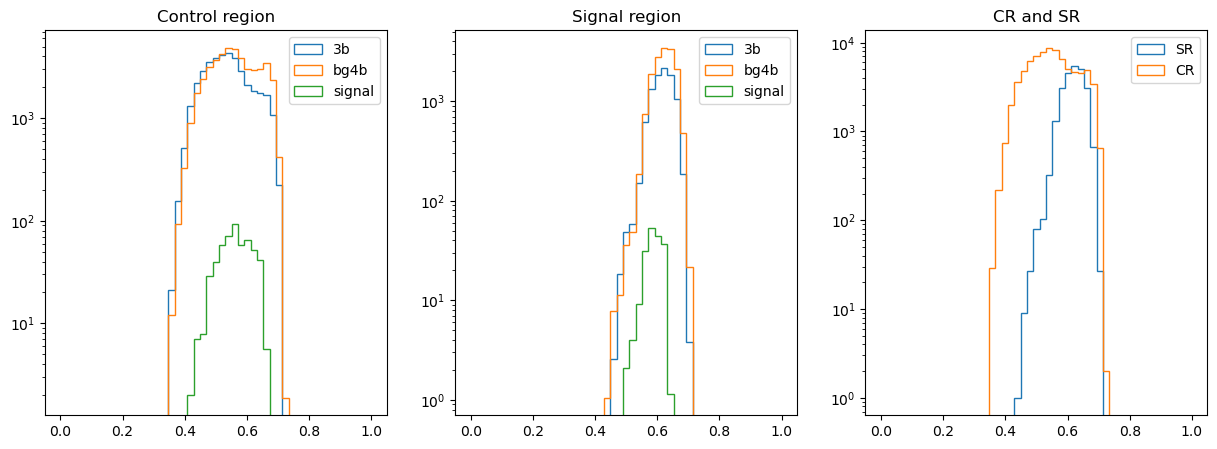

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.26it/s, v_num=10, val_loss=0.679, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.38it/s, v_num=10, val_loss=0.679, train_loss=0.679]


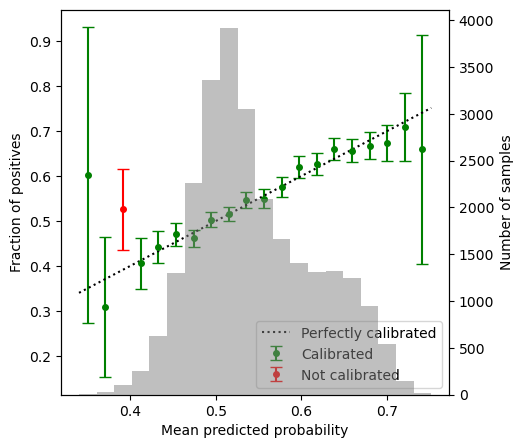

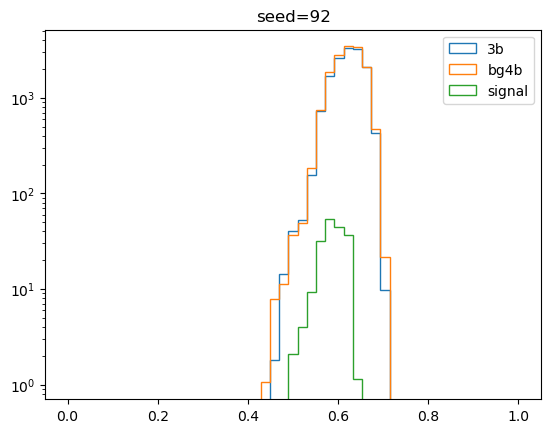

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


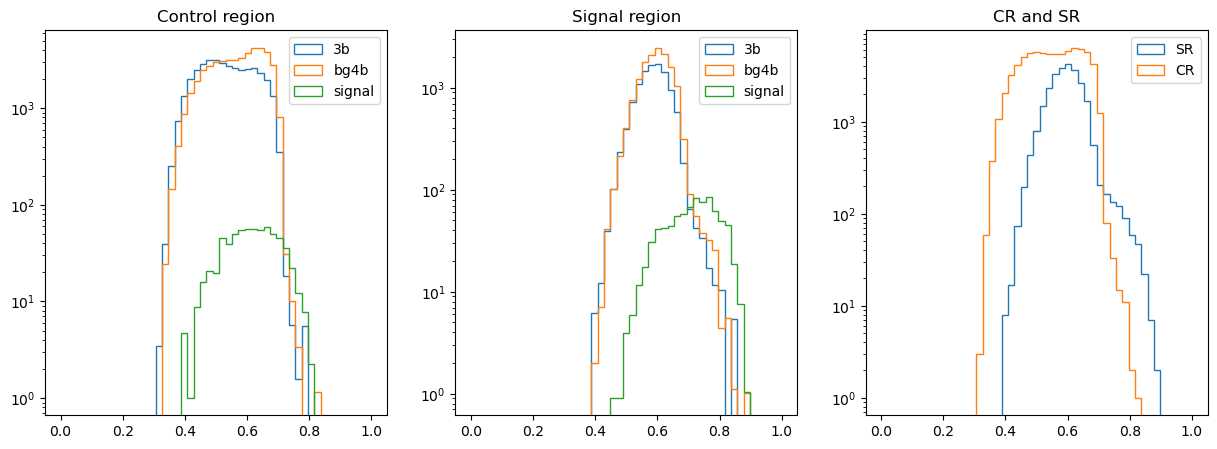

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.75it/s, v_num=11, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.62it/s, v_num=11, val_loss=0.675, train_loss=0.675]


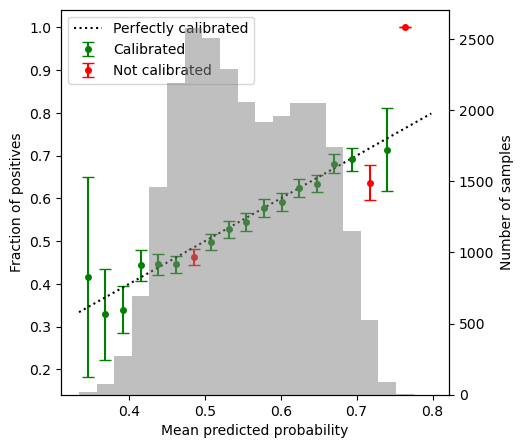

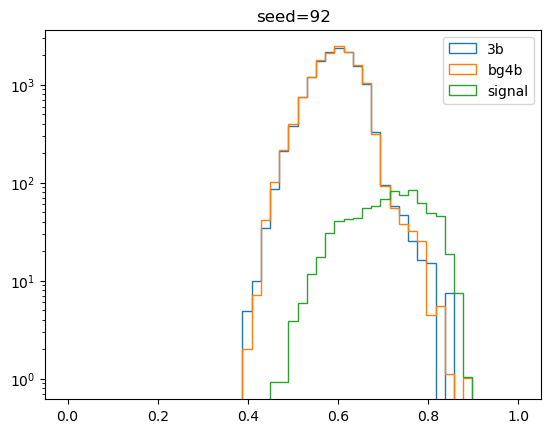

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


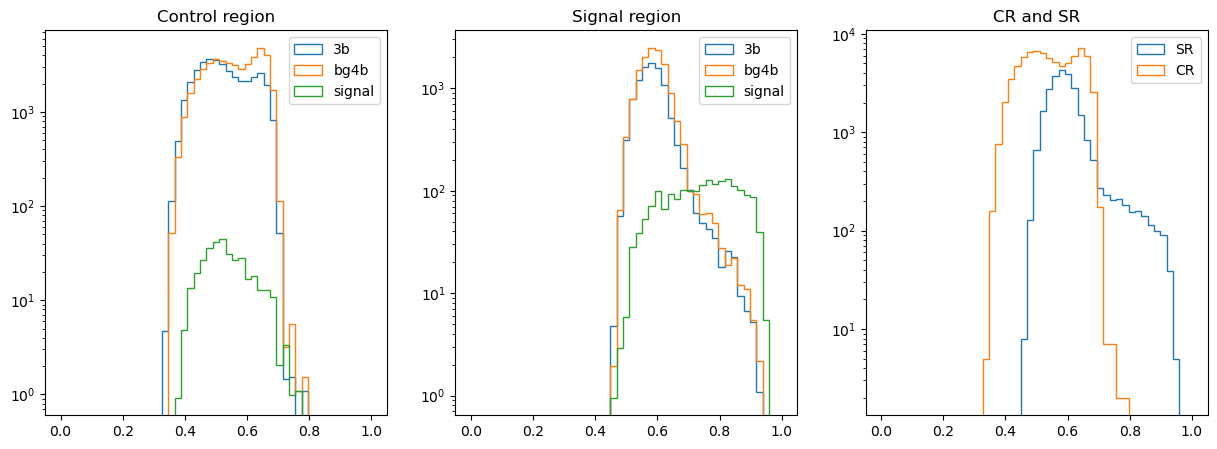

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.68it/s, v_num=12, val_loss=0.677, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.11it/s, v_num=12, val_loss=0.677, train_loss=0.676]


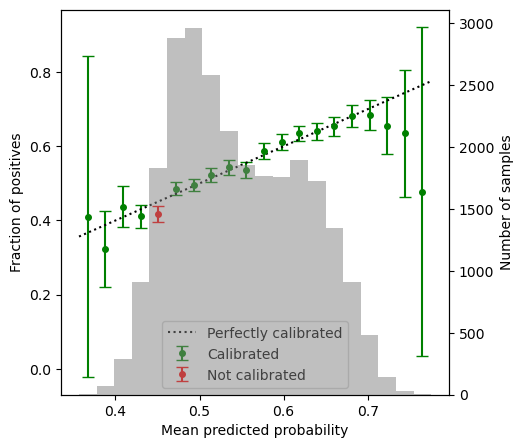

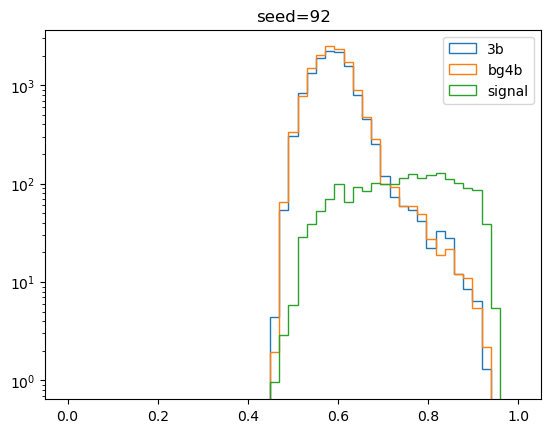

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


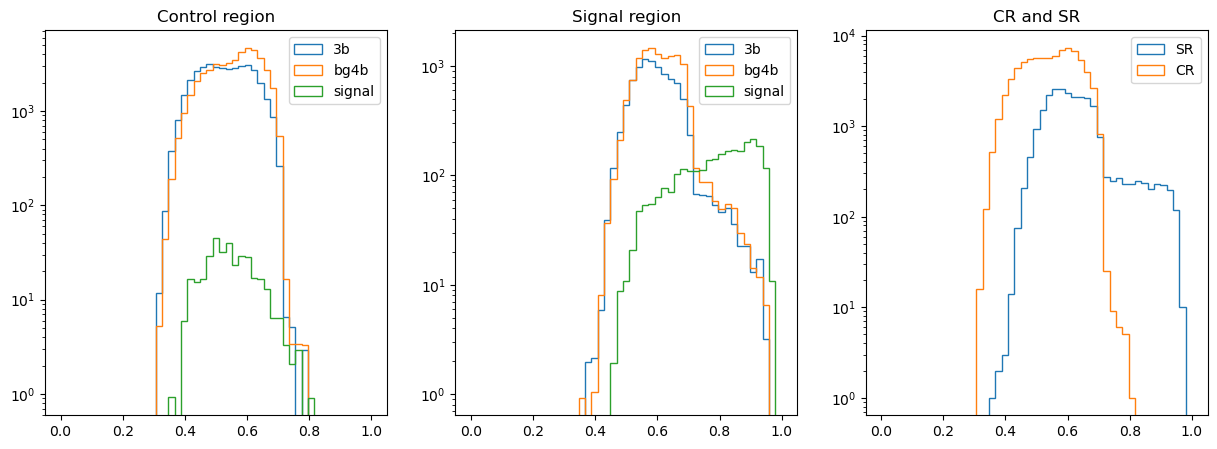

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.63it/s, v_num=13, val_loss=0.679, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.73it/s, v_num=13, val_loss=0.679, train_loss=0.676]


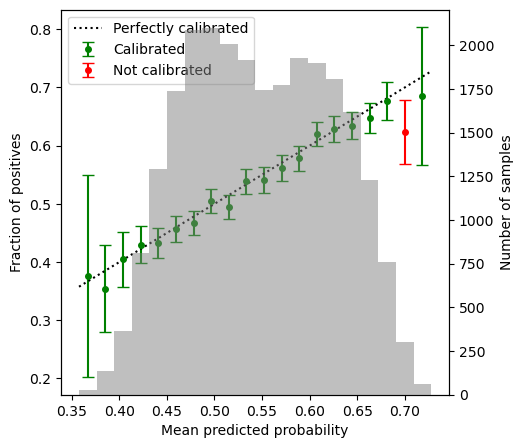

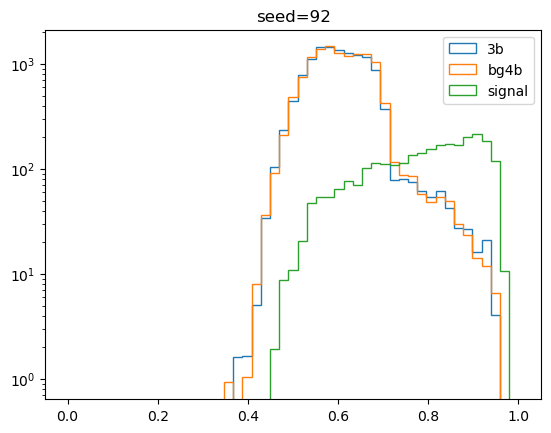

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


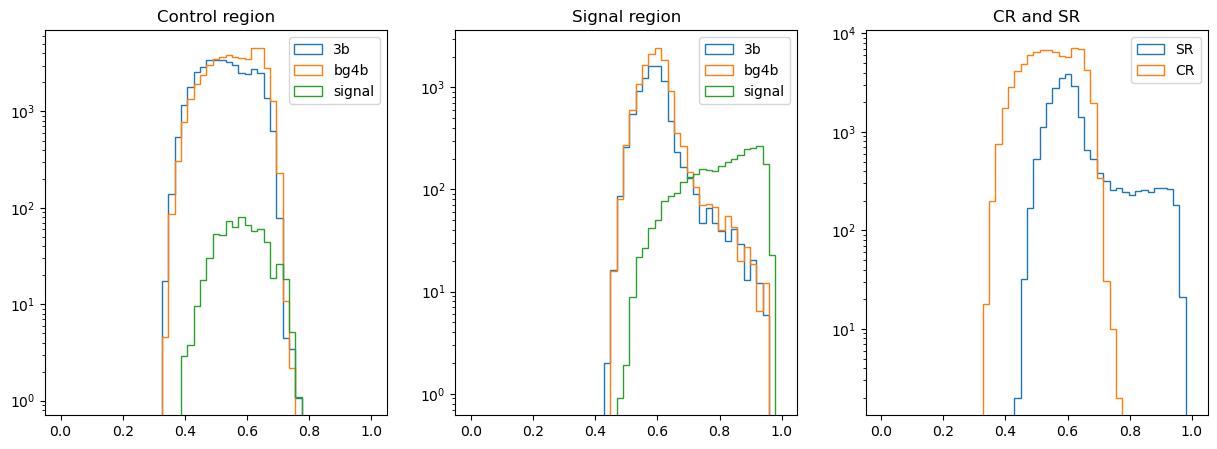

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.67it/s, v_num=14, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.33it/s, v_num=14, val_loss=0.678, train_loss=0.677]


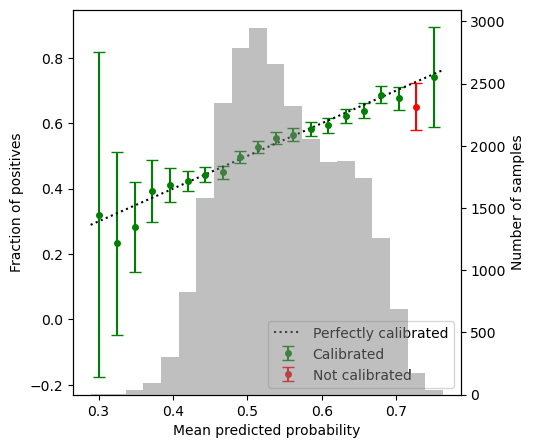

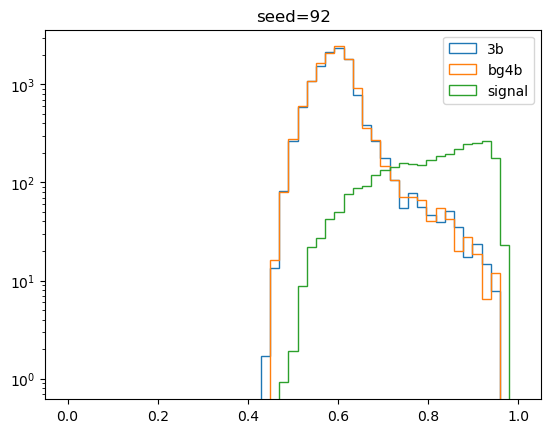

In [18]:
from signal_region import get_regions_stats
from fvt_classifier import FvTClassifier
from plots import calibration_plot

batch_size = 2**10
sr_w4b_ratio = 0.2
cr_w4b_ratio = 0.6
n_sample_ratio = 1.0

noise_scales = [0.1, 0.05]

signal_region_stats_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_sr_reweighted_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_cr_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_sr_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_test_dict = {seed: {} for seed in seeds}
svc_model_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}

for noise_scale in noise_scales:
    for seed in seeds:
        for signal_ratio in signal_ratios:
            hparam_filter = {"experiment_name": experiment_name, 
                            "seed": seed, 
                            "n_sample_ratio": n_sample_ratio, 
                            "signal_ratio": signal_ratio}
            hashes = TrainingInfo.find(hparam_filter)
            assert len(hashes) == 1
            print("successfully loaded", hparam_filter)
            fvt_hash = hashes[0]

            _, dinfo_test = generate_tt_dataset(
                seed,
                n_3b,
                n_all4b,
                signal_ratio,
                test_ratio,
            )
            events_test = EventsData.from_dataframe(dinfo_test.fetch_data(), features)
            events_test_dict[seed][signal_ratio] = events_test.clone()
            events_sr_train, events_sr_eval = events_test.split(1/3, seed=seed)

            signal_region_stats = get_regions_stats(
                events_sr_eval, fvt_hash, method="smearing", 
                events_sr_train=events_sr_train, noise_scale=noise_scale)    

            signal_region_stats_dict[seed][signal_ratio][noise_scale] = signal_region_stats
            events_sr_eval.update_npd("smear_diff", signal_region_stats)

            signal_region_stats_argsort = np.argsort(signal_region_stats)[::-1]
            signal_region_stats_sorted = signal_region_stats[signal_region_stats_argsort]

            weights = events_sr_eval.weights[signal_region_stats_argsort]
            is_signal = events_sr_eval.is_signal[signal_region_stats_argsort]
            is_4b = events_sr_eval.is_4b[signal_region_stats_argsort]

            cumul_4b_ratio = np.cumsum(weights * is_4b) / np.sum(weights * is_4b)
            sr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio)]
            cr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio + cr_w4b_ratio)]

            events_svc_cr = events_sr_eval[(events_sr_eval.npd["smear_diff"] > cr_cut)
                                            & (events_sr_eval.npd["smear_diff"] < sr_cut)]
            

            events_svc_cr_train, events_svc_cr_val = events_svc_cr.split(2/3, seed=seed)
            events_svc_cr_train.fit_batch_size(batch_size)
            events_svc_cr_val.fit_batch_size(batch_size)

            events_svc_sr = events_sr_eval[events_sr_eval.npd["smear_diff"] >= sr_cut]
            
            events_svc_cr_dict[seed][signal_ratio][noise_scale] = events_svc_cr.clone()
            events_svc_sr_dict[seed][signal_ratio][noise_scale] = events_svc_sr.clone()

            fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

            bins_range = np.linspace(0, 1, 50)

            hist_events_by_labels(events_svc_cr, bins_range, ax[0])
            ax[0].set_title("Control region")
            ax[0].legend()
            ax[0].set_yscale("log")

            hist_events_by_labels(events_svc_sr, bins_range, ax[1])
            ax[1].set_title("Signal region")
            ax[1].legend()
            ax[1].set_yscale("log")

            ax[2].set_title("CR and SR")
            ax[2].hist(events_svc_sr.fvt_score, bins=bins_range, histtype="step", label="SR")
            ax[2].hist(events_svc_cr.fvt_score, bins=bins_range, histtype="step", label="CR")
            ax[2].legend()
            ax[2].set_yscale("log")

            plt.show()
            plt.close()
            
            svc_model = FvTClassifier(
                num_classes=2,
                dim_input_jet_features=4,
                dim_dijet_features=6,
                dim_quadjet_features=6,
                run_name=f"svc_tmp_{seed}",
                device=torch.device("cuda:0"),
                lr=1e-3
            )

            svc_model.fit(
                events_svc_cr_train.to_tensor_dataset(),
                events_svc_cr_val.to_tensor_dataset(),
                batch_size=batch_size,
                max_epochs=20,
            )

            svc_model.eval()
            svc_model.to(device)

            svc_model_dict[seed][signal_ratio][noise_scale] = svc_model

            probs_4b = svc_model.predict(events_svc_cr_val.X_torch)[:, 1].cpu().numpy()
            calibration_plot(probs_4b, events_svc_cr_val.is_4b, sample_weights=events_svc_cr_val.weights)
            plt.show()

            # cr_w_4b_over_3b = events_svc_cr.total_weight_4b / (events_svc_cr.total_weight - events_svc_cr.total_weight_4b)
            # sr_w_4b_over_3b = events_svc_sr.total_weight_4b / (events_svc_sr.total_weight - events_svc_sr.total_weight_4b)
            w_4b_over_3b = events_test.total_weight_4b / (events_test.total_weight - events_test.total_weight_4b)
            probs_4b = svc_model.predict(events_svc_sr.X_torch)[:, 1].cpu().numpy()

            

            # print(f"CR w_4b / w_3b = {cr_w_4b_over_3b}")
            # print(f"SR w_4b / w_3b = {sr_w_4b_over_3b}")

            events_svc_sr_reweighted = events_svc_sr.clone()
            reweights = w_4b_over_3b * (probs_4b / (1 - probs_4b))
            events_svc_sr_reweighted.reweight(
                np.where(
                events_svc_sr_reweighted.is_4b, 
                events_svc_sr_reweighted.weights,
                events_svc_sr_reweighted.weights * reweights,
            ))

            is_3b = events_svc_sr_reweighted.is_3b
            is_bg4b = events_svc_sr_reweighted.is_bg4b
            is_signal = events_svc_sr_reweighted.is_signal

            events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale] = events_svc_sr_reweighted.clone()

            bins_range = np.linspace(0, 1, 50)

            plt.title(f"seed={seed}")
            ax = plt.gca()
            hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax)
            plt.yscale("log")
            plt.legend()
            plt.show()
            plt.close()

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:266: RuntimeWarning: divide by zero encountered in scalar divide
/home/soheuny/HH4bsim/playground/dataset.py:265: RuntimeWarning: invalid value encountered in multiply
/home/soheuny/HH4bsim/playground/dataset.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


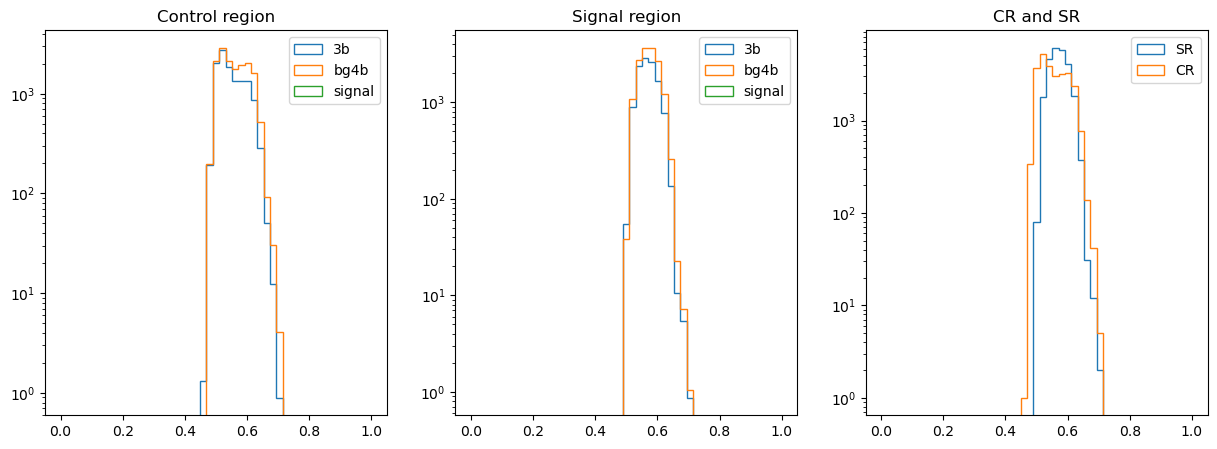

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 16/16 [00:01<00:00, 10.19it/s, v_num=15, val_loss=0.686, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 16/16 [00:01<00:00,  9.95it/s, v_num=15, val_loss=0.686, train_loss=0.683]


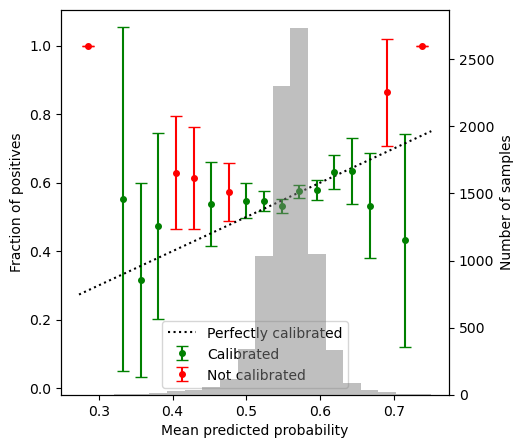

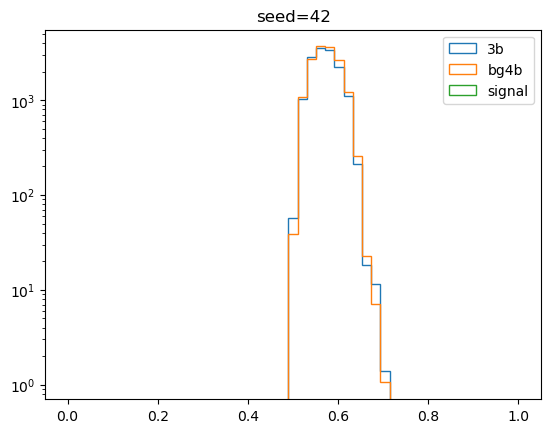

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


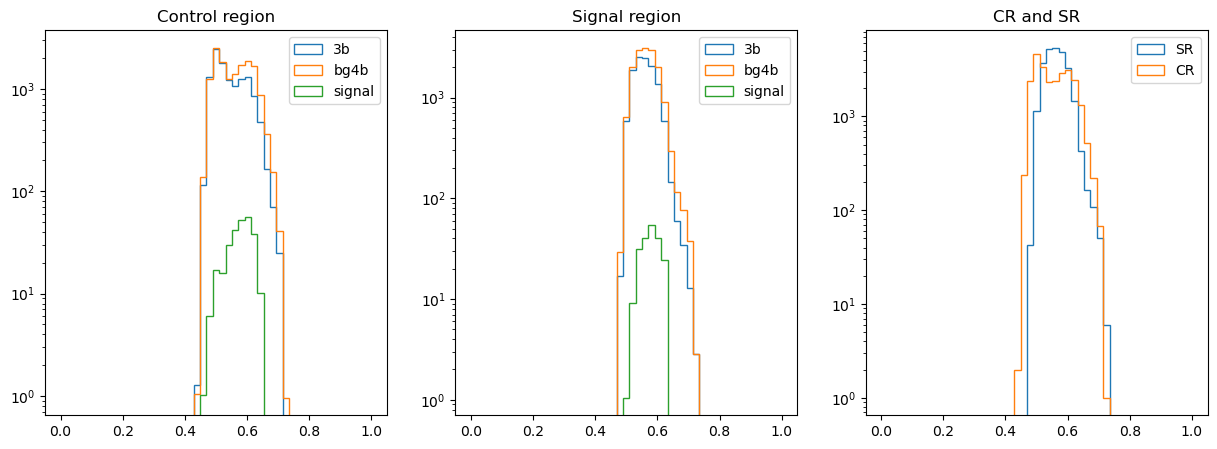

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 16/16 [00:01<00:00, 10.19it/s, v_num=16, val_loss=0.683, train_loss=0.682]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 16/16 [00:01<00:00,  9.21it/s, v_num=16, val_loss=0.683, train_loss=0.682]


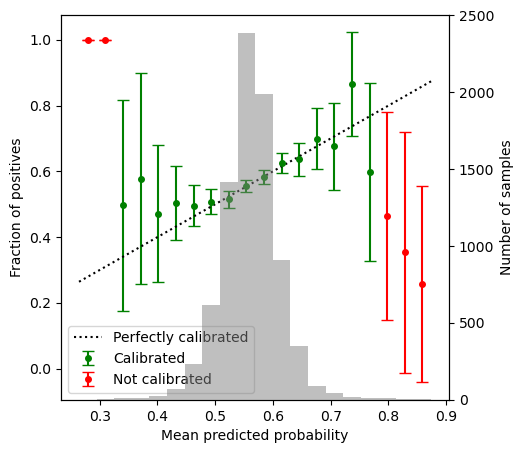

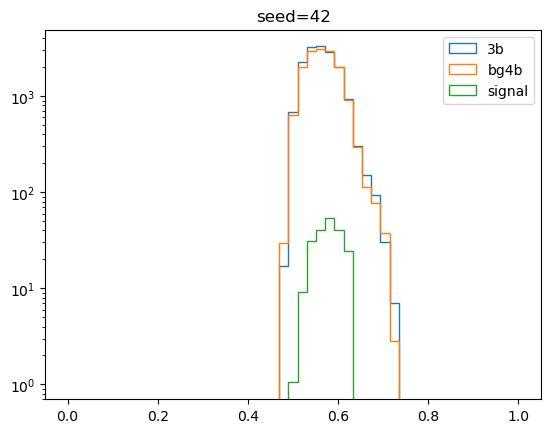

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


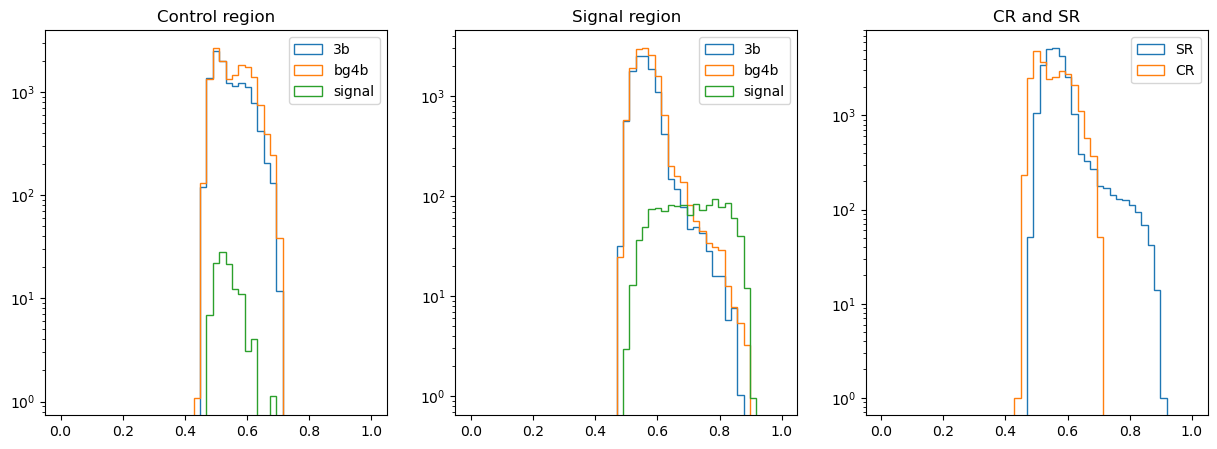

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 17/17 [00:01<00:00, 10.77it/s, v_num=17, val_loss=0.682, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 17/17 [00:01<00:00, 10.66it/s, v_num=17, val_loss=0.682, train_loss=0.683]


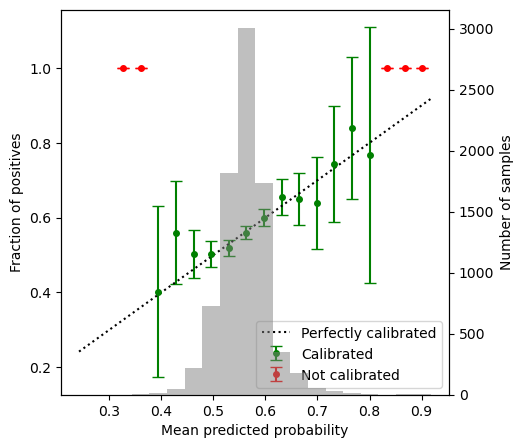

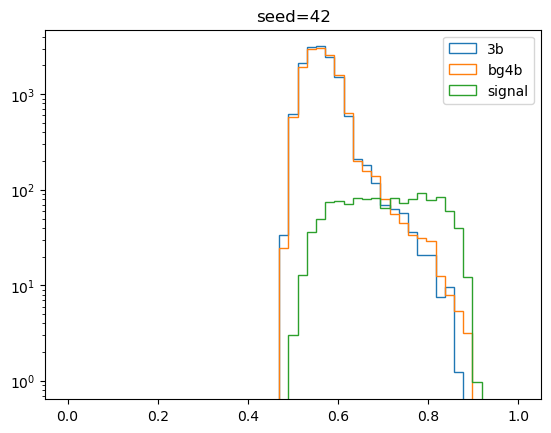

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


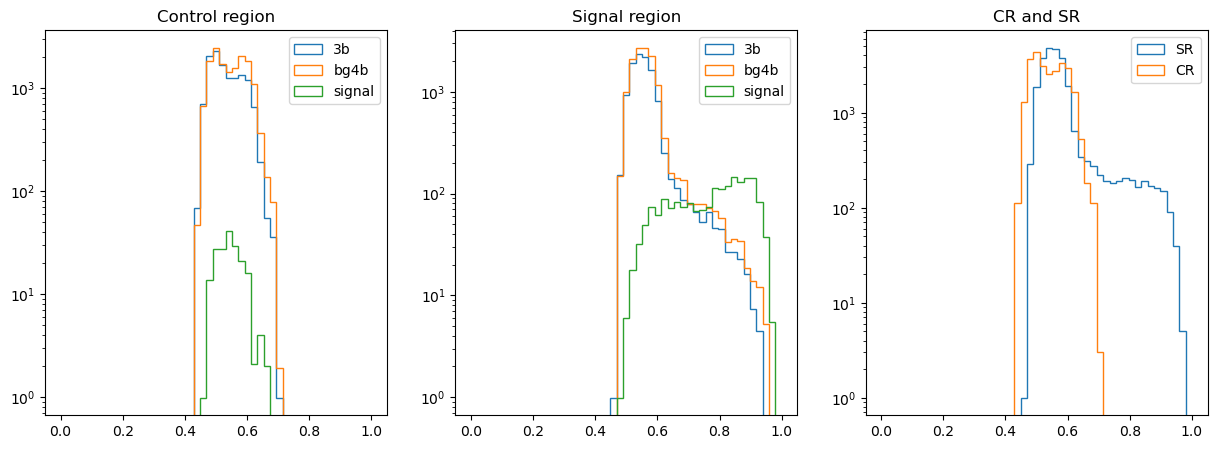

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 17/17 [00:02<00:00,  6.43it/s, v_num=18, val_loss=0.685, train_loss=0.684]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 17/17 [00:02<00:00,  6.37it/s, v_num=18, val_loss=0.685, train_loss=0.684]


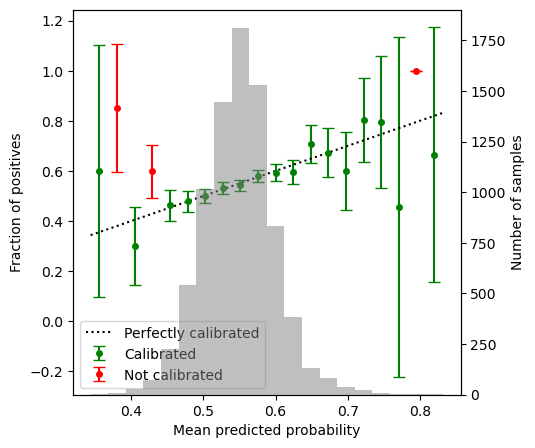

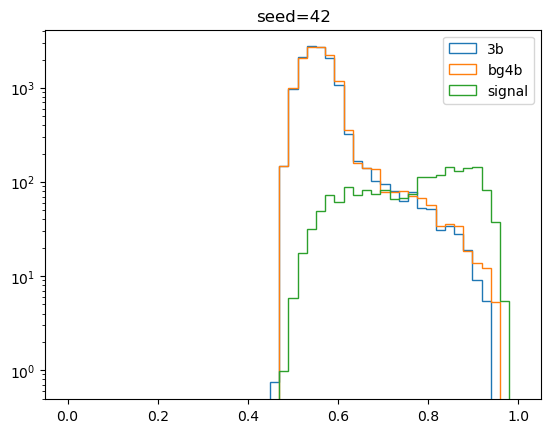

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


KeyboardInterrupt: 

In [24]:
from signal_region import get_regions_stats
from fvt_classifier import FvTClassifier
from plots import calibration_plot

batch_size = 2**10
sr_w4b_ratio = 0.2
cr_w4b_ratio = 0.2
n_sample_ratio = 1.0

noise_scales = [0.1, 0.05]

signal_region_stats_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_sr_reweighted_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_cr_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_sr_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_test_dict = {seed: {} for seed in seeds}
svc_model_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}

for noise_scale in noise_scales:
    for seed in seeds:
        for signal_ratio in signal_ratios:
            hparam_filter = {"experiment_name": experiment_name, 
                            "seed": seed, 
                            "n_sample_ratio": n_sample_ratio, 
                            "signal_ratio": signal_ratio}
            hashes = TrainingInfo.find(hparam_filter)
            assert len(hashes) == 1
            print("successfully loaded", hparam_filter)
            fvt_hash = hashes[0]

            _, dinfo_test = generate_tt_dataset(
                seed,
                n_3b,
                n_all4b,
                signal_ratio,
                test_ratio,
            )
            events_test = EventsData.from_dataframe(dinfo_test.fetch_data(), features)
            events_test_dict[seed][signal_ratio] = events_test.clone()
            events_sr_train, events_sr_eval = events_test.split(1/3, seed=seed)

            signal_region_stats = get_regions_stats(
                events_sr_eval, fvt_hash, method="smearing", 
                events_sr_train=events_sr_train, noise_scale=noise_scale)    

            signal_region_stats_dict[seed][signal_ratio][noise_scale] = signal_region_stats
            events_sr_eval.update_npd("smear_diff", signal_region_stats)

            signal_region_stats_argsort = np.argsort(signal_region_stats)[::-1]
            signal_region_stats_sorted = signal_region_stats[signal_region_stats_argsort]

            weights = events_sr_eval.weights[signal_region_stats_argsort]
            is_signal = events_sr_eval.is_signal[signal_region_stats_argsort]
            is_4b = events_sr_eval.is_4b[signal_region_stats_argsort]

            cumul_4b_ratio = np.cumsum(weights * is_4b) / np.sum(weights * is_4b)
            sr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio)]
            cr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio + cr_w4b_ratio)]

            events_svc_cr = events_sr_eval[(events_sr_eval.npd["smear_diff"] > cr_cut)
                                            & (events_sr_eval.npd["smear_diff"] < sr_cut)]
            

            events_svc_cr_train, events_svc_cr_val = events_svc_cr.split(2/3, seed=seed)
            events_svc_cr_train.fit_batch_size(batch_size)
            events_svc_cr_val.fit_batch_size(batch_size)

            events_svc_sr = events_sr_eval[events_sr_eval.npd["smear_diff"] >= sr_cut]
            
            events_svc_cr_dict[seed][signal_ratio][noise_scale] = events_svc_cr.clone()
            events_svc_sr_dict[seed][signal_ratio][noise_scale] = events_svc_sr.clone()

            fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

            bins_range = np.linspace(0, 1, 50)

            hist_events_by_labels(events_svc_cr, bins_range, ax[0])
            ax[0].set_title("Control region")
            ax[0].legend()
            ax[0].set_yscale("log")

            hist_events_by_labels(events_svc_sr, bins_range, ax[1])
            ax[1].set_title("Signal region")
            ax[1].legend()
            ax[1].set_yscale("log")

            ax[2].set_title("CR and SR")
            ax[2].hist(events_svc_sr.fvt_score, bins=bins_range, histtype="step", label="SR")
            ax[2].hist(events_svc_cr.fvt_score, bins=bins_range, histtype="step", label="CR")
            ax[2].legend()
            ax[2].set_yscale("log")

            plt.show()
            plt.close()
            
            svc_model = FvTClassifier(
                num_classes=2,
                dim_input_jet_features=4,
                dim_dijet_features=6,
                dim_quadjet_features=6,
                run_name=f"svc_tmp_{seed}",
                device=torch.device("cuda:0"),
                lr=1e-3
            )

            svc_model.fit(
                events_svc_cr_train.to_tensor_dataset(),
                events_svc_cr_val.to_tensor_dataset(),
                batch_size=batch_size,
                max_epochs=20,
            )

            svc_model.eval()
            svc_model.to(device)

            svc_model_dict[seed][signal_ratio][noise_scale] = svc_model

            probs_4b = svc_model.predict(events_svc_cr_val.X_torch)[:, 1].cpu().numpy()
            calibration_plot(probs_4b, events_svc_cr_val.is_4b, sample_weights=events_svc_cr_val.weights)
            plt.show()

            # cr_w_4b_over_3b = events_svc_cr.total_weight_4b / (events_svc_cr.total_weight - events_svc_cr.total_weight_4b)
            # sr_w_4b_over_3b = events_svc_sr.total_weight_4b / (events_svc_sr.total_weight - events_svc_sr.total_weight_4b)
            w_4b_over_3b = events_test.total_weight_4b / (events_test.total_weight - events_test.total_weight_4b)
            probs_4b = svc_model.predict(events_svc_sr.X_torch)[:, 1].cpu().numpy()

            

            # print(f"CR w_4b / w_3b = {cr_w_4b_over_3b}")
            # print(f"SR w_4b / w_3b = {sr_w_4b_over_3b}")

            events_svc_sr_reweighted = events_svc_sr.clone()
            reweights = w_4b_over_3b * (probs_4b / (1 - probs_4b))
            events_svc_sr_reweighted.reweight(
                np.where(
                events_svc_sr_reweighted.is_4b, 
                events_svc_sr_reweighted.weights,
                events_svc_sr_reweighted.weights * reweights,
            ))

            is_3b = events_svc_sr_reweighted.is_3b
            is_bg4b = events_svc_sr_reweighted.is_bg4b
            is_signal = events_svc_sr_reweighted.is_signal

            events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale] = events_svc_sr_reweighted.clone()

            bins_range = np.linspace(0, 1, 50)

            plt.title(f"seed={seed}")
            ax = plt.gca()
            hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax)
            plt.yscale("log")
            plt.legend()
            plt.show()
            plt.close()

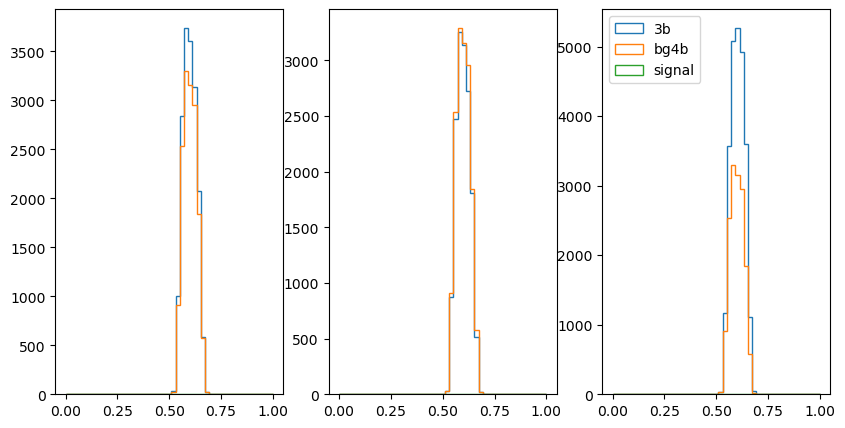

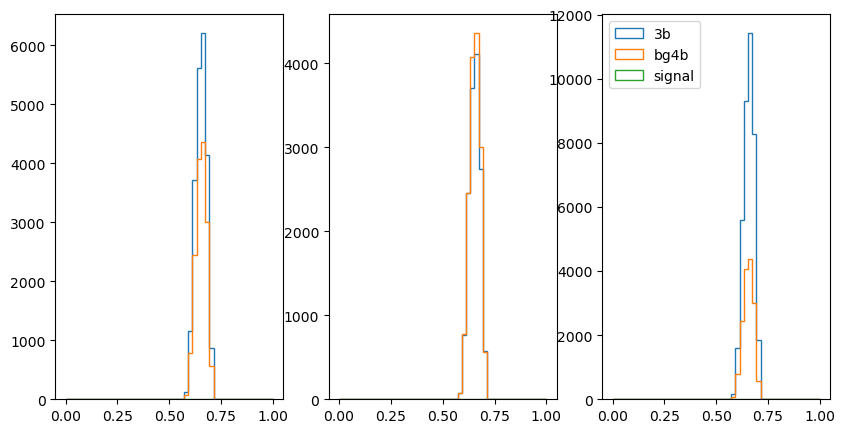

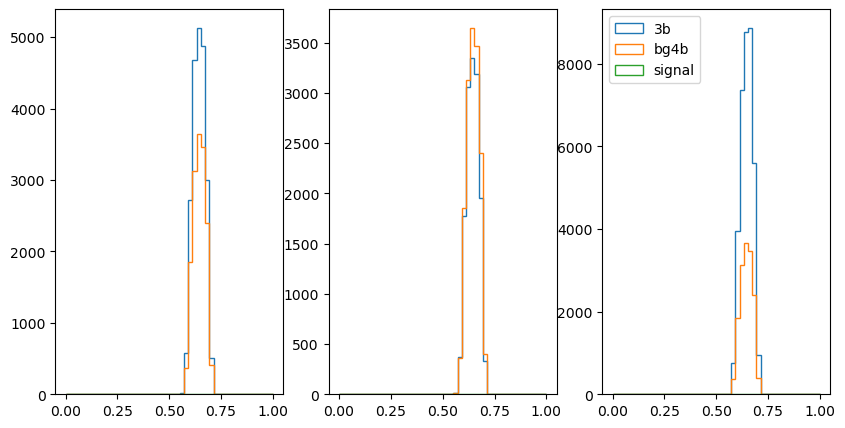

In [16]:
noise_scale = 0.1
signal_ratio = 0.0
# seed = 92

for seed in [72, 82, 92]:

    events_svc_cr = events_svc_cr_dict[seed][signal_ratio][noise_scale]
    events_svc_sr = events_svc_sr_dict[seed][signal_ratio][noise_scale]
    events_svc_sr_reweighted = events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale]
    events_test = events_test_dict[seed][signal_ratio]
    svc_model = svc_model_dict[seed][signal_ratio][noise_scale]

    svc_model.eval()
    svc_model.to(device)

    # print(events_svc_cr.total_weight_4b / events_svc_cr.total_weight)
    # print(np.mean(svc_model.predict(events_svc_cr.X_torch)[:, 1].cpu().numpy()))
    # print(events_svc_sr.total_weight_4b / events_svc_sr.total_weight)
    # print(np.mean(svc_model.predict(events_svc_sr.X_torch)[:, 1].cpu().numpy()))

    events_svc_sr_reweighted_2 = events_svc_sr.clone()
    probs_4b = svc_model.predict(events_svc_sr.X_torch)[:, 1].cpu().numpy()
    w_4b_over_3b = events_test.total_weight_4b / (events_test.total_weight - events_test.total_weight_4b)
    reweights = w_4b_over_3b * (probs_4b / (1 - probs_4b))
    events_svc_sr_reweighted_2.reweight(
        np.where(
            events_svc_sr_reweighted_2.is_4b, 
            events_svc_sr_reweighted_2.weights,
            events_svc_sr_reweighted_2.weights * reweights,
        ))
    
    reweights = probs_4b / (1 - probs_4b)
    events_svc_sr_reweighted_3 = events_svc_sr_reweighted.clone()
    events_svc_sr_reweighted_3.reweight(
        np.where(
            events_svc_sr_reweighted_3.is_4b, 
            events_svc_sr_reweighted_3.weights,
            events_svc_sr_reweighted_3.weights * reweights,
        ))

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax[0])
    hist_events_by_labels(events_svc_sr_reweighted_2, bins_range, ax[1])
    hist_events_by_labels(events_svc_sr_reweighted_3, bins_range, ax[2])
    # plt.yscale("log")
    plt.legend()
    plt.show()
    plt.close()